In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import util 
import requests
import json

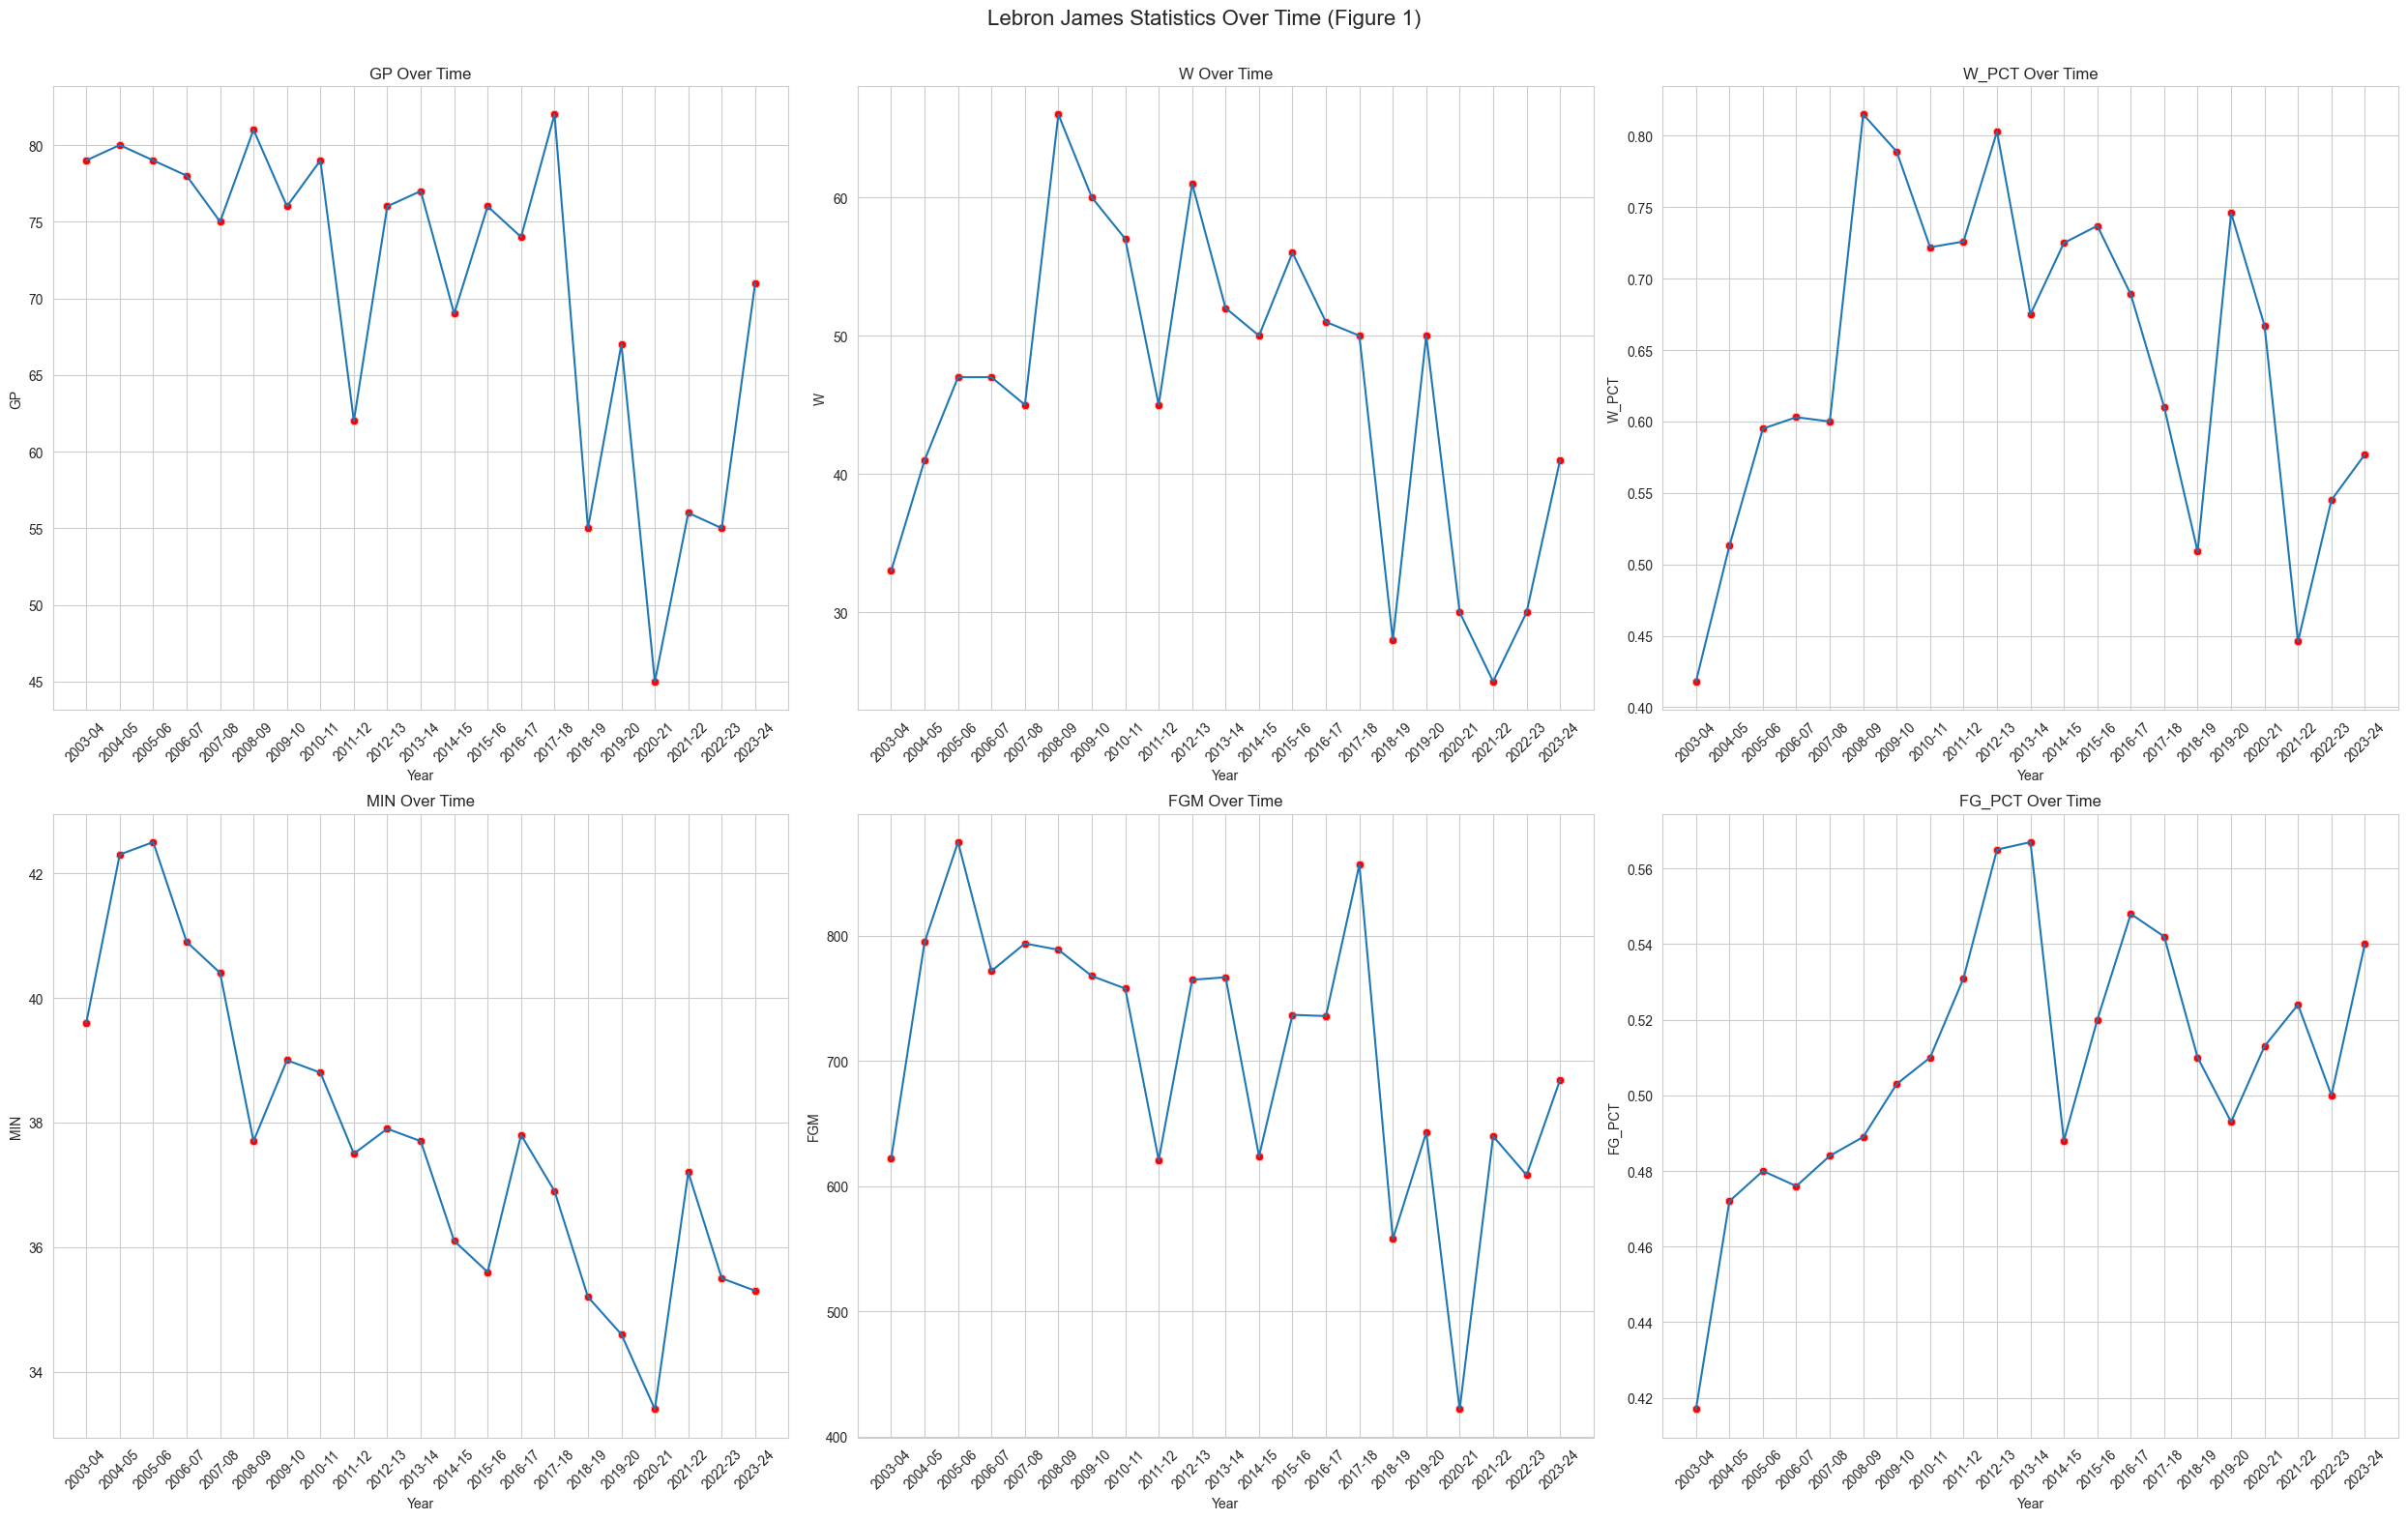

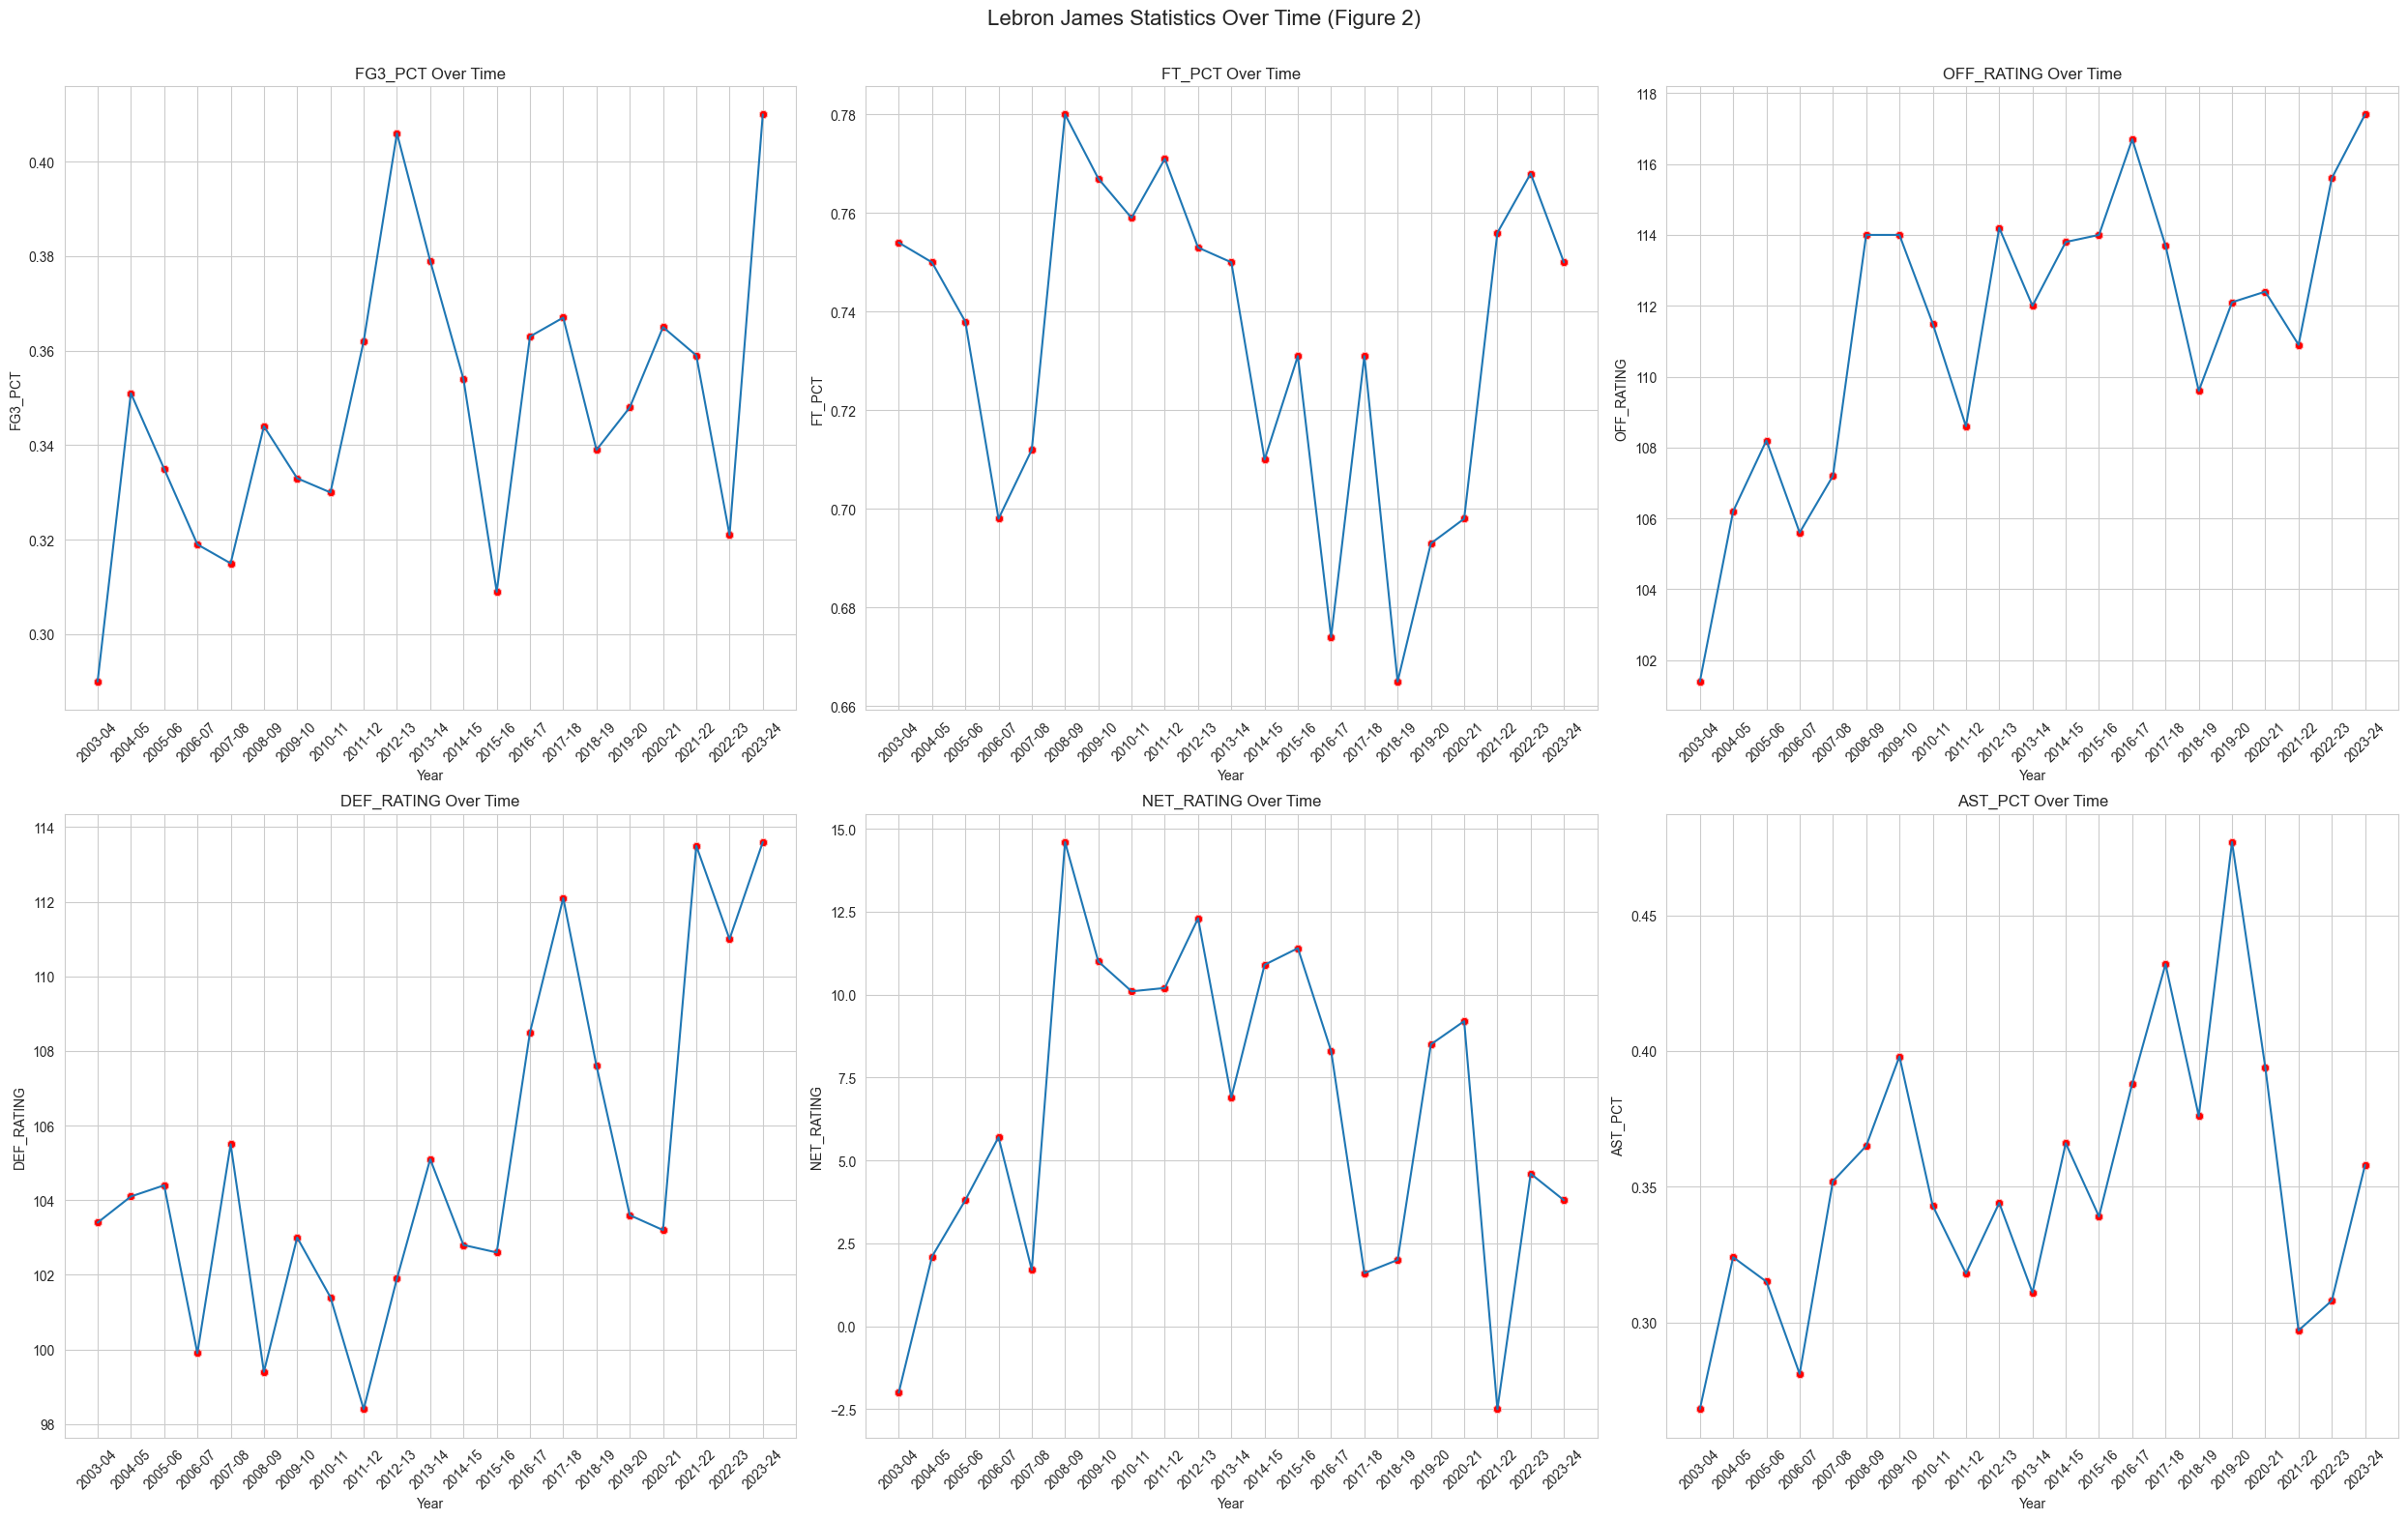

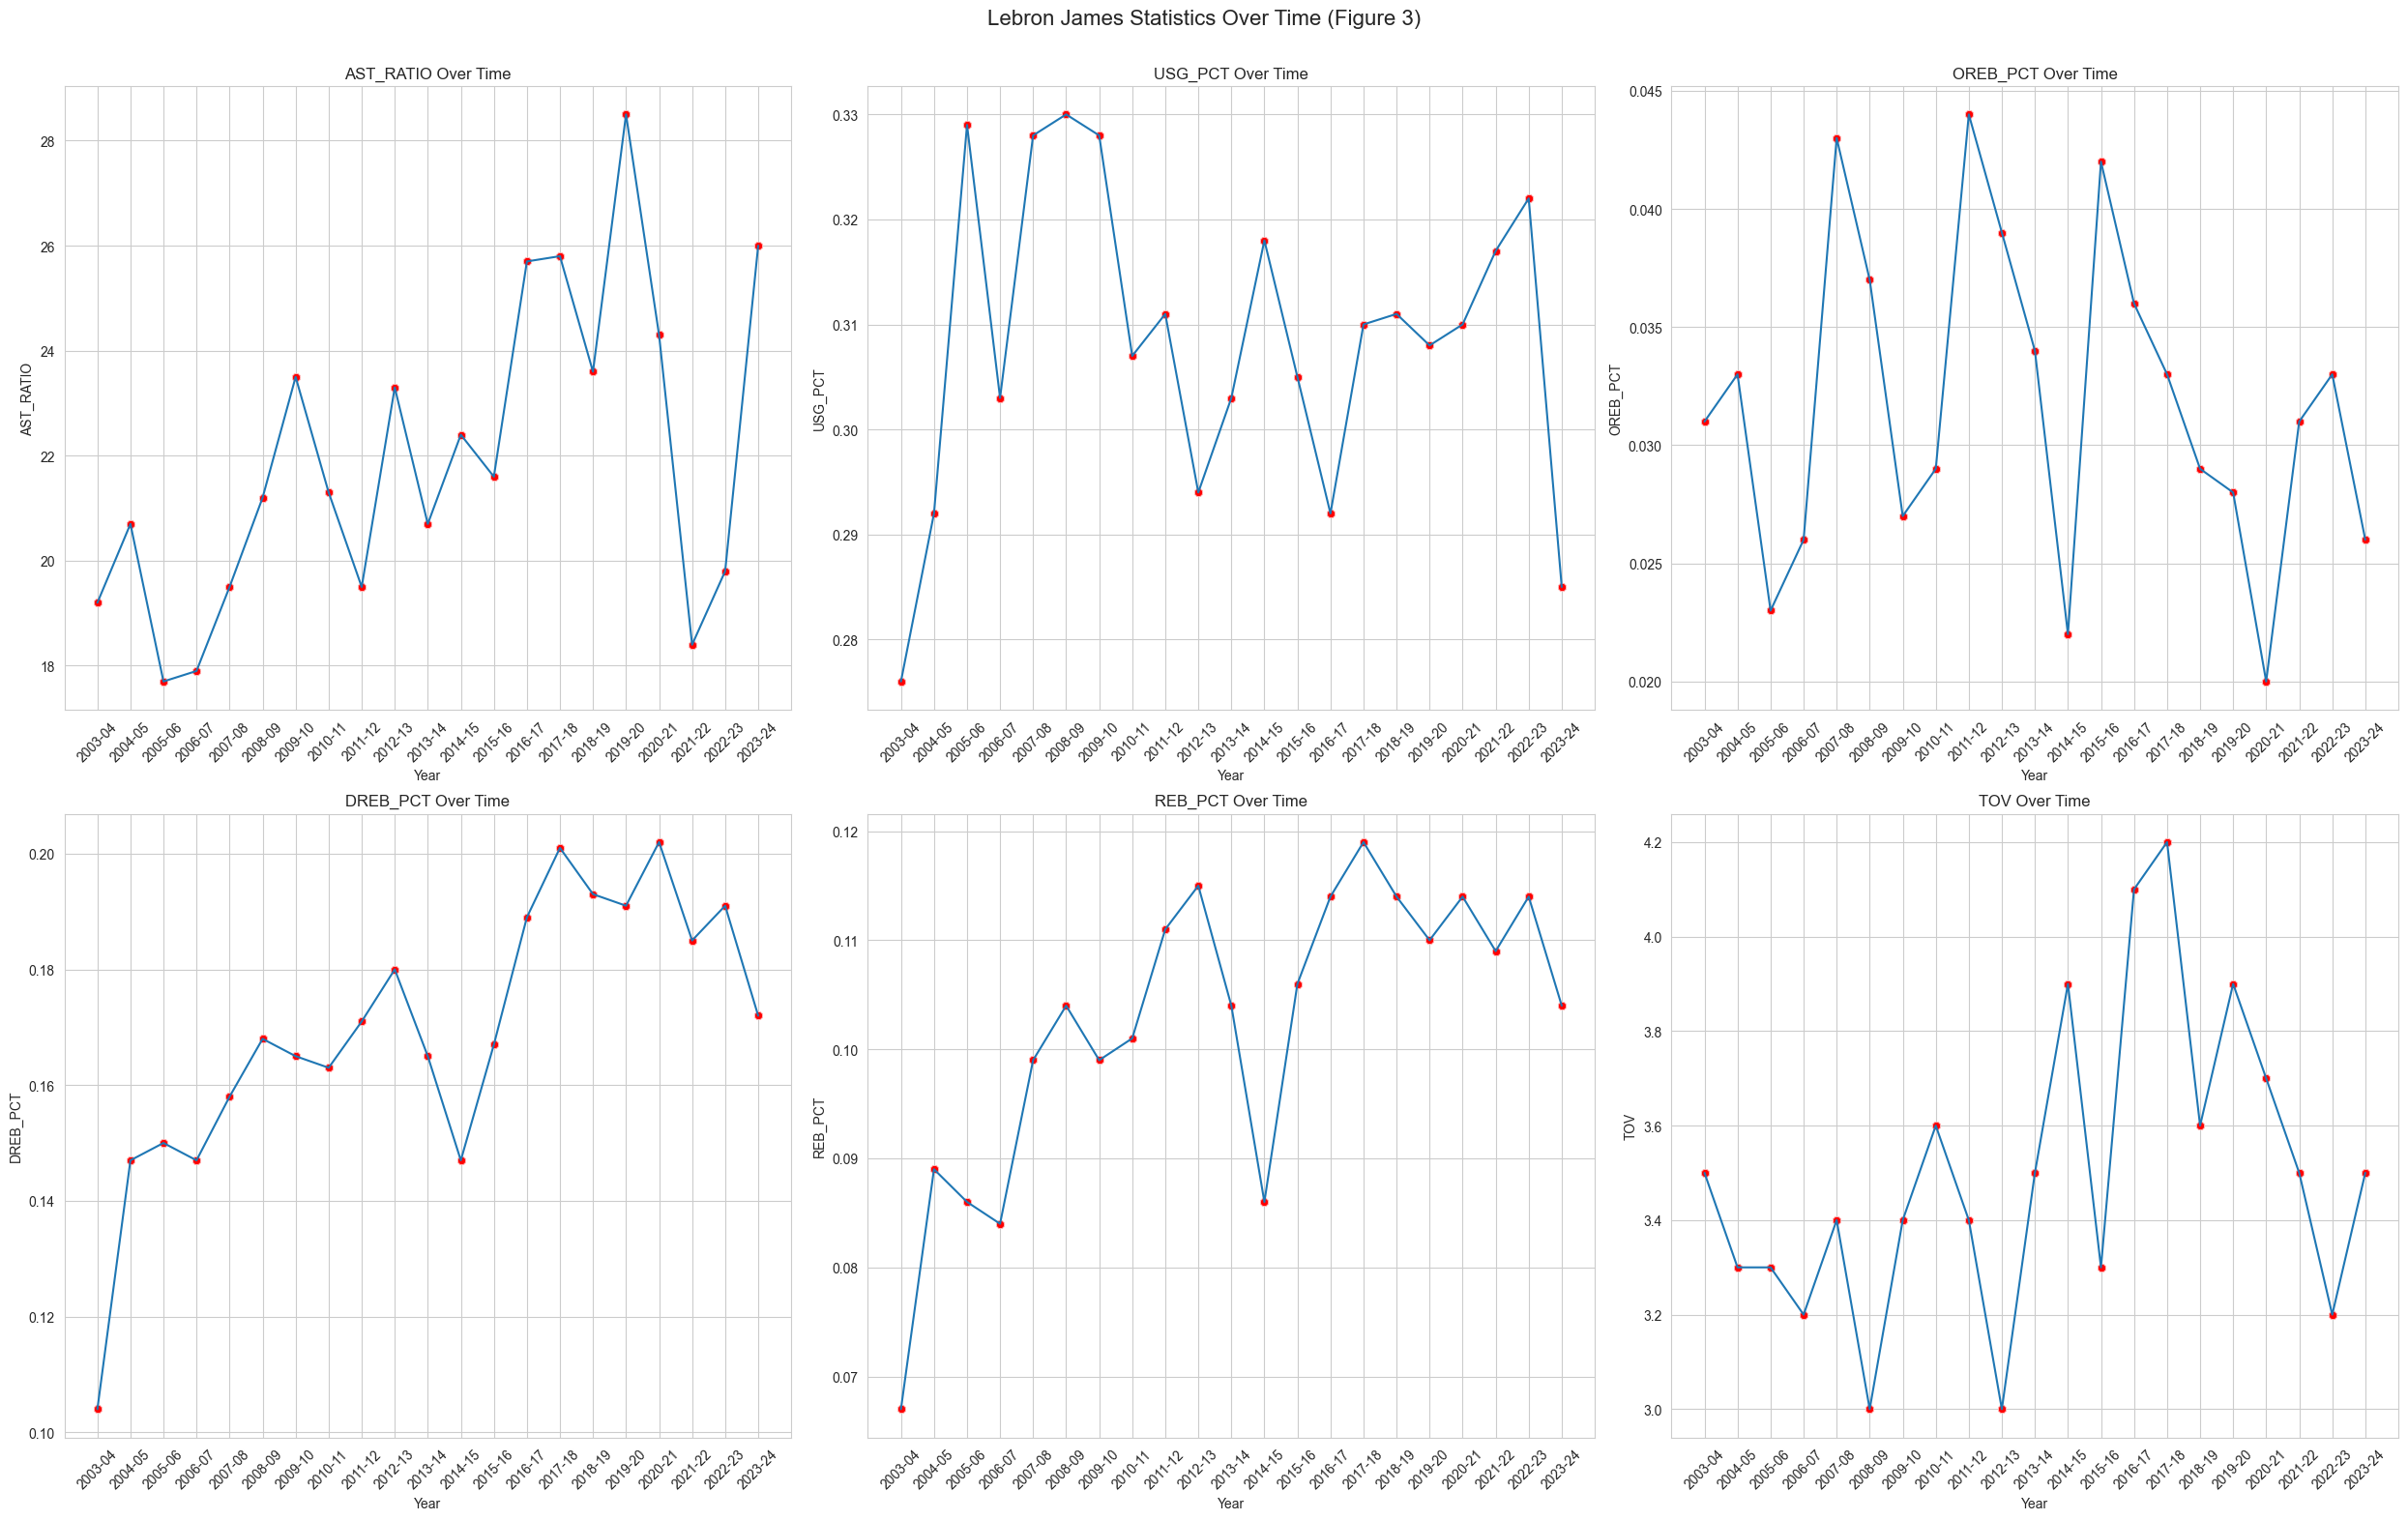

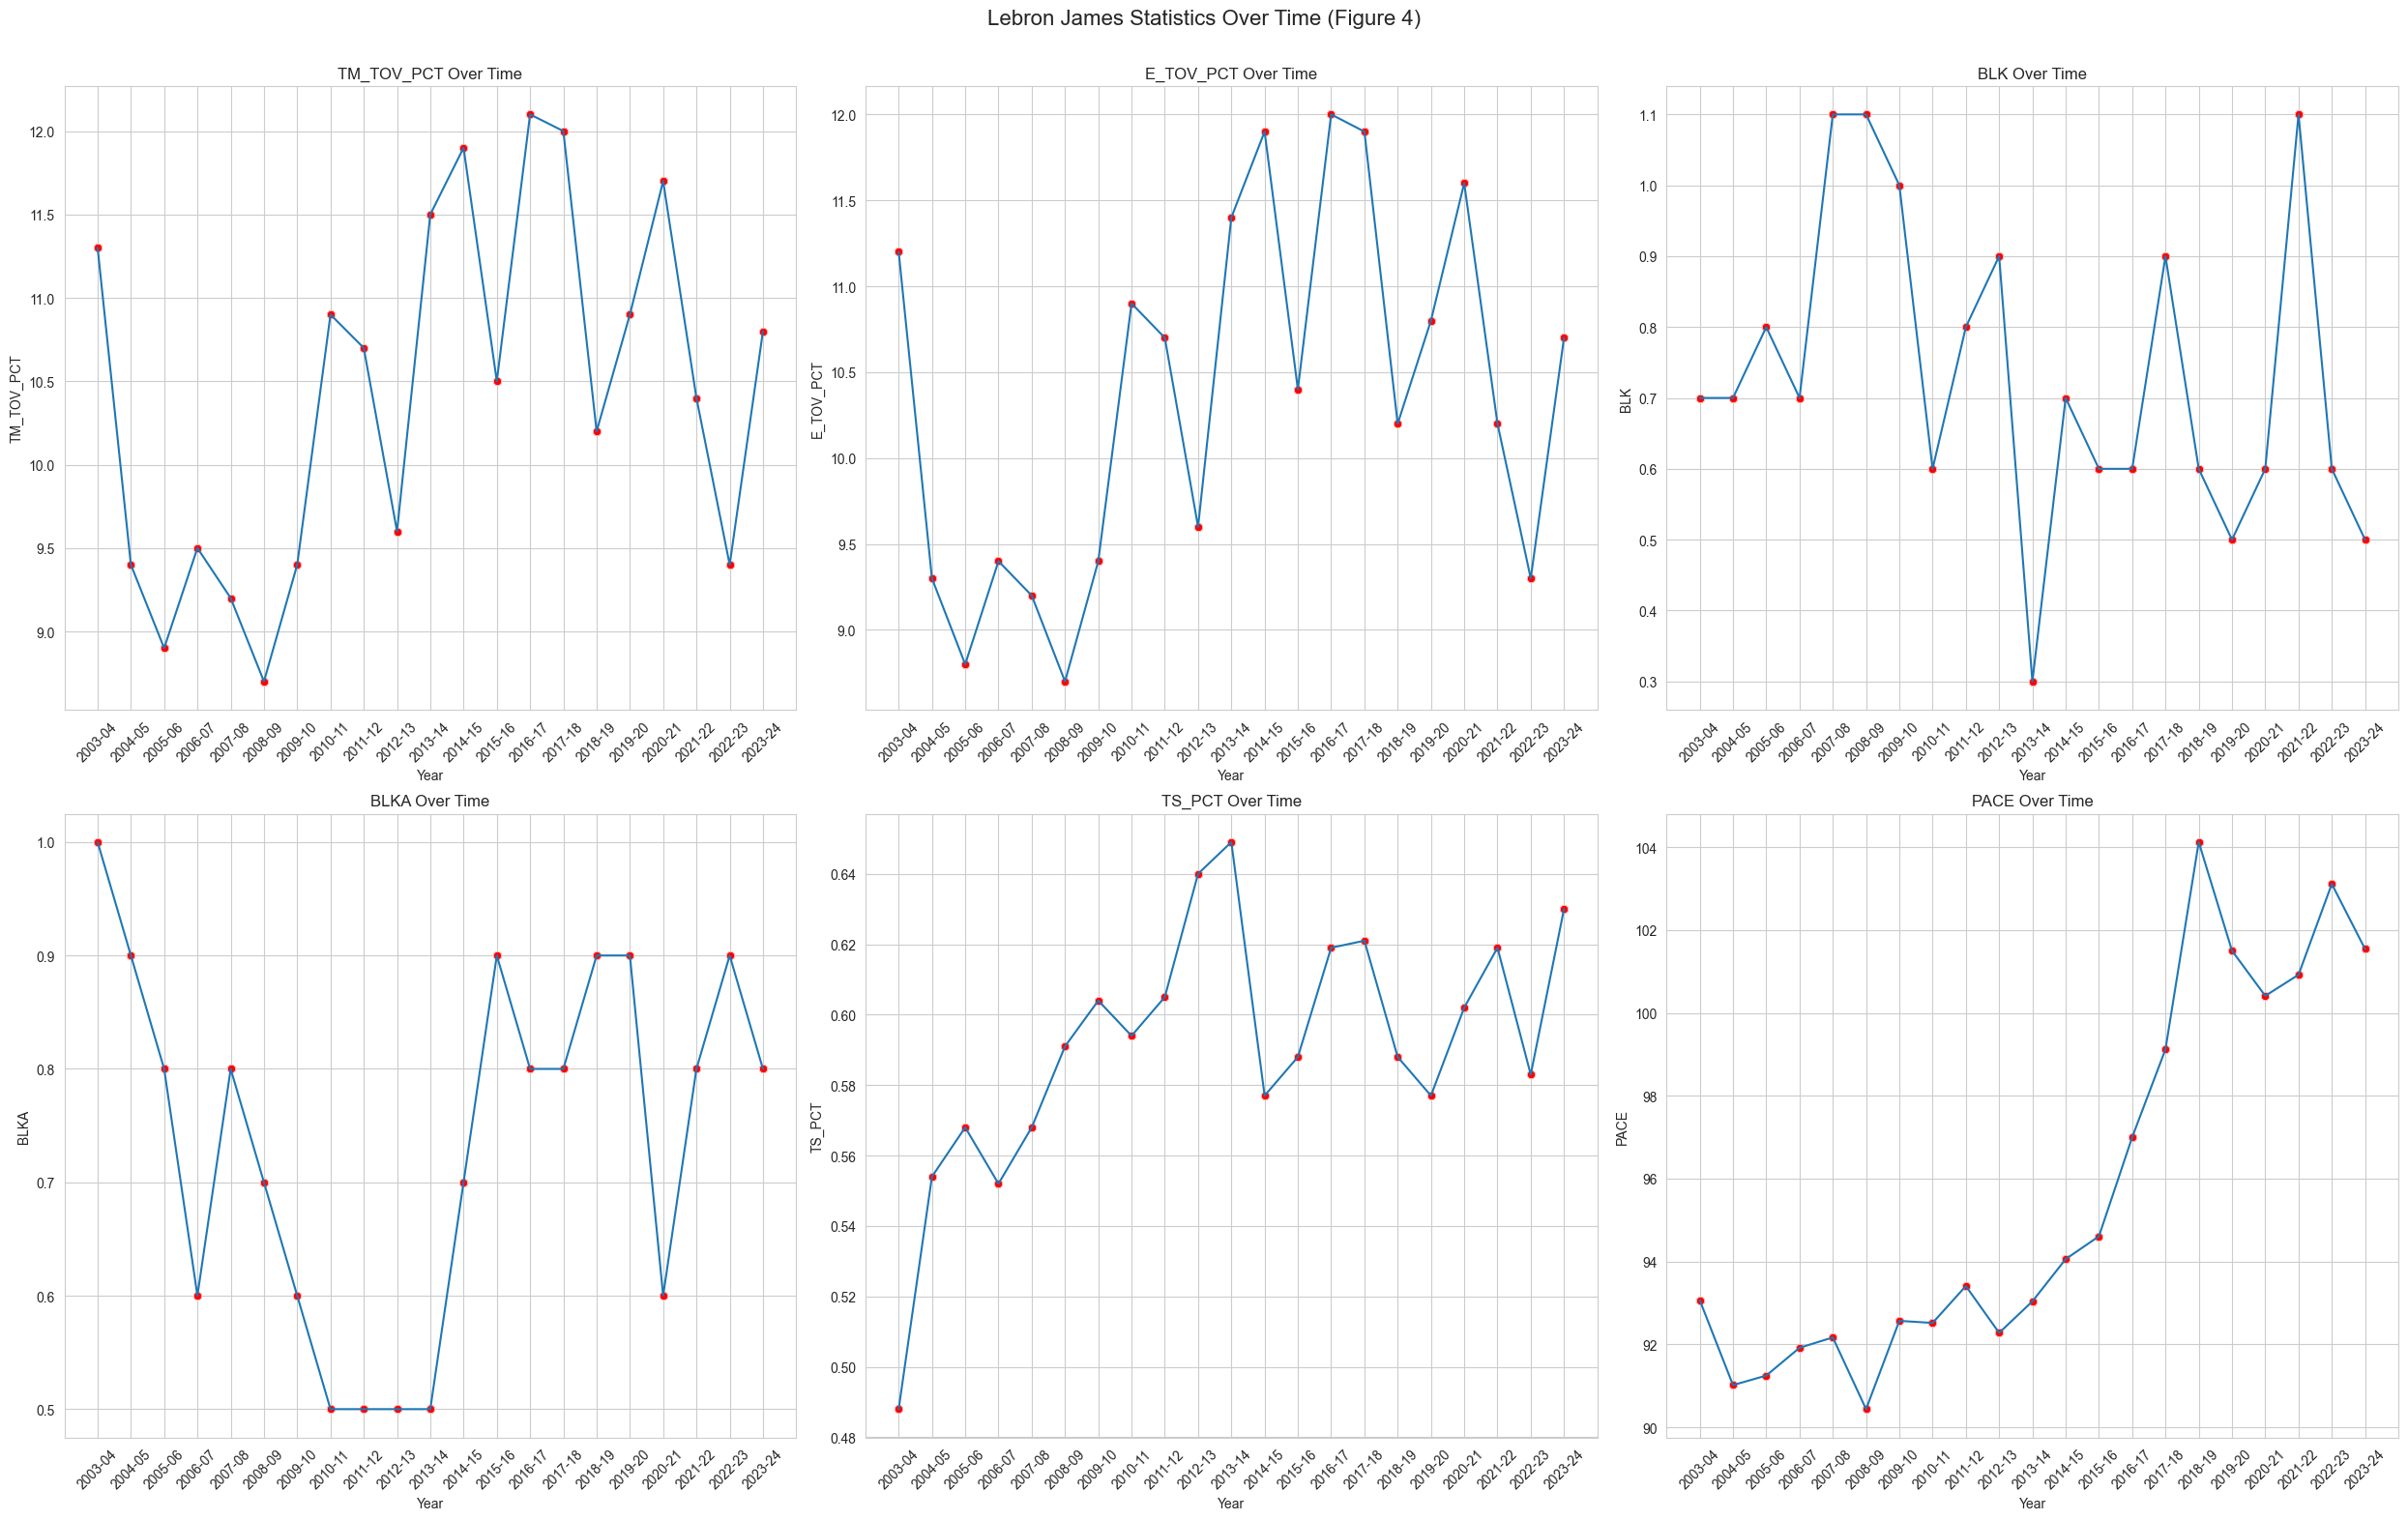

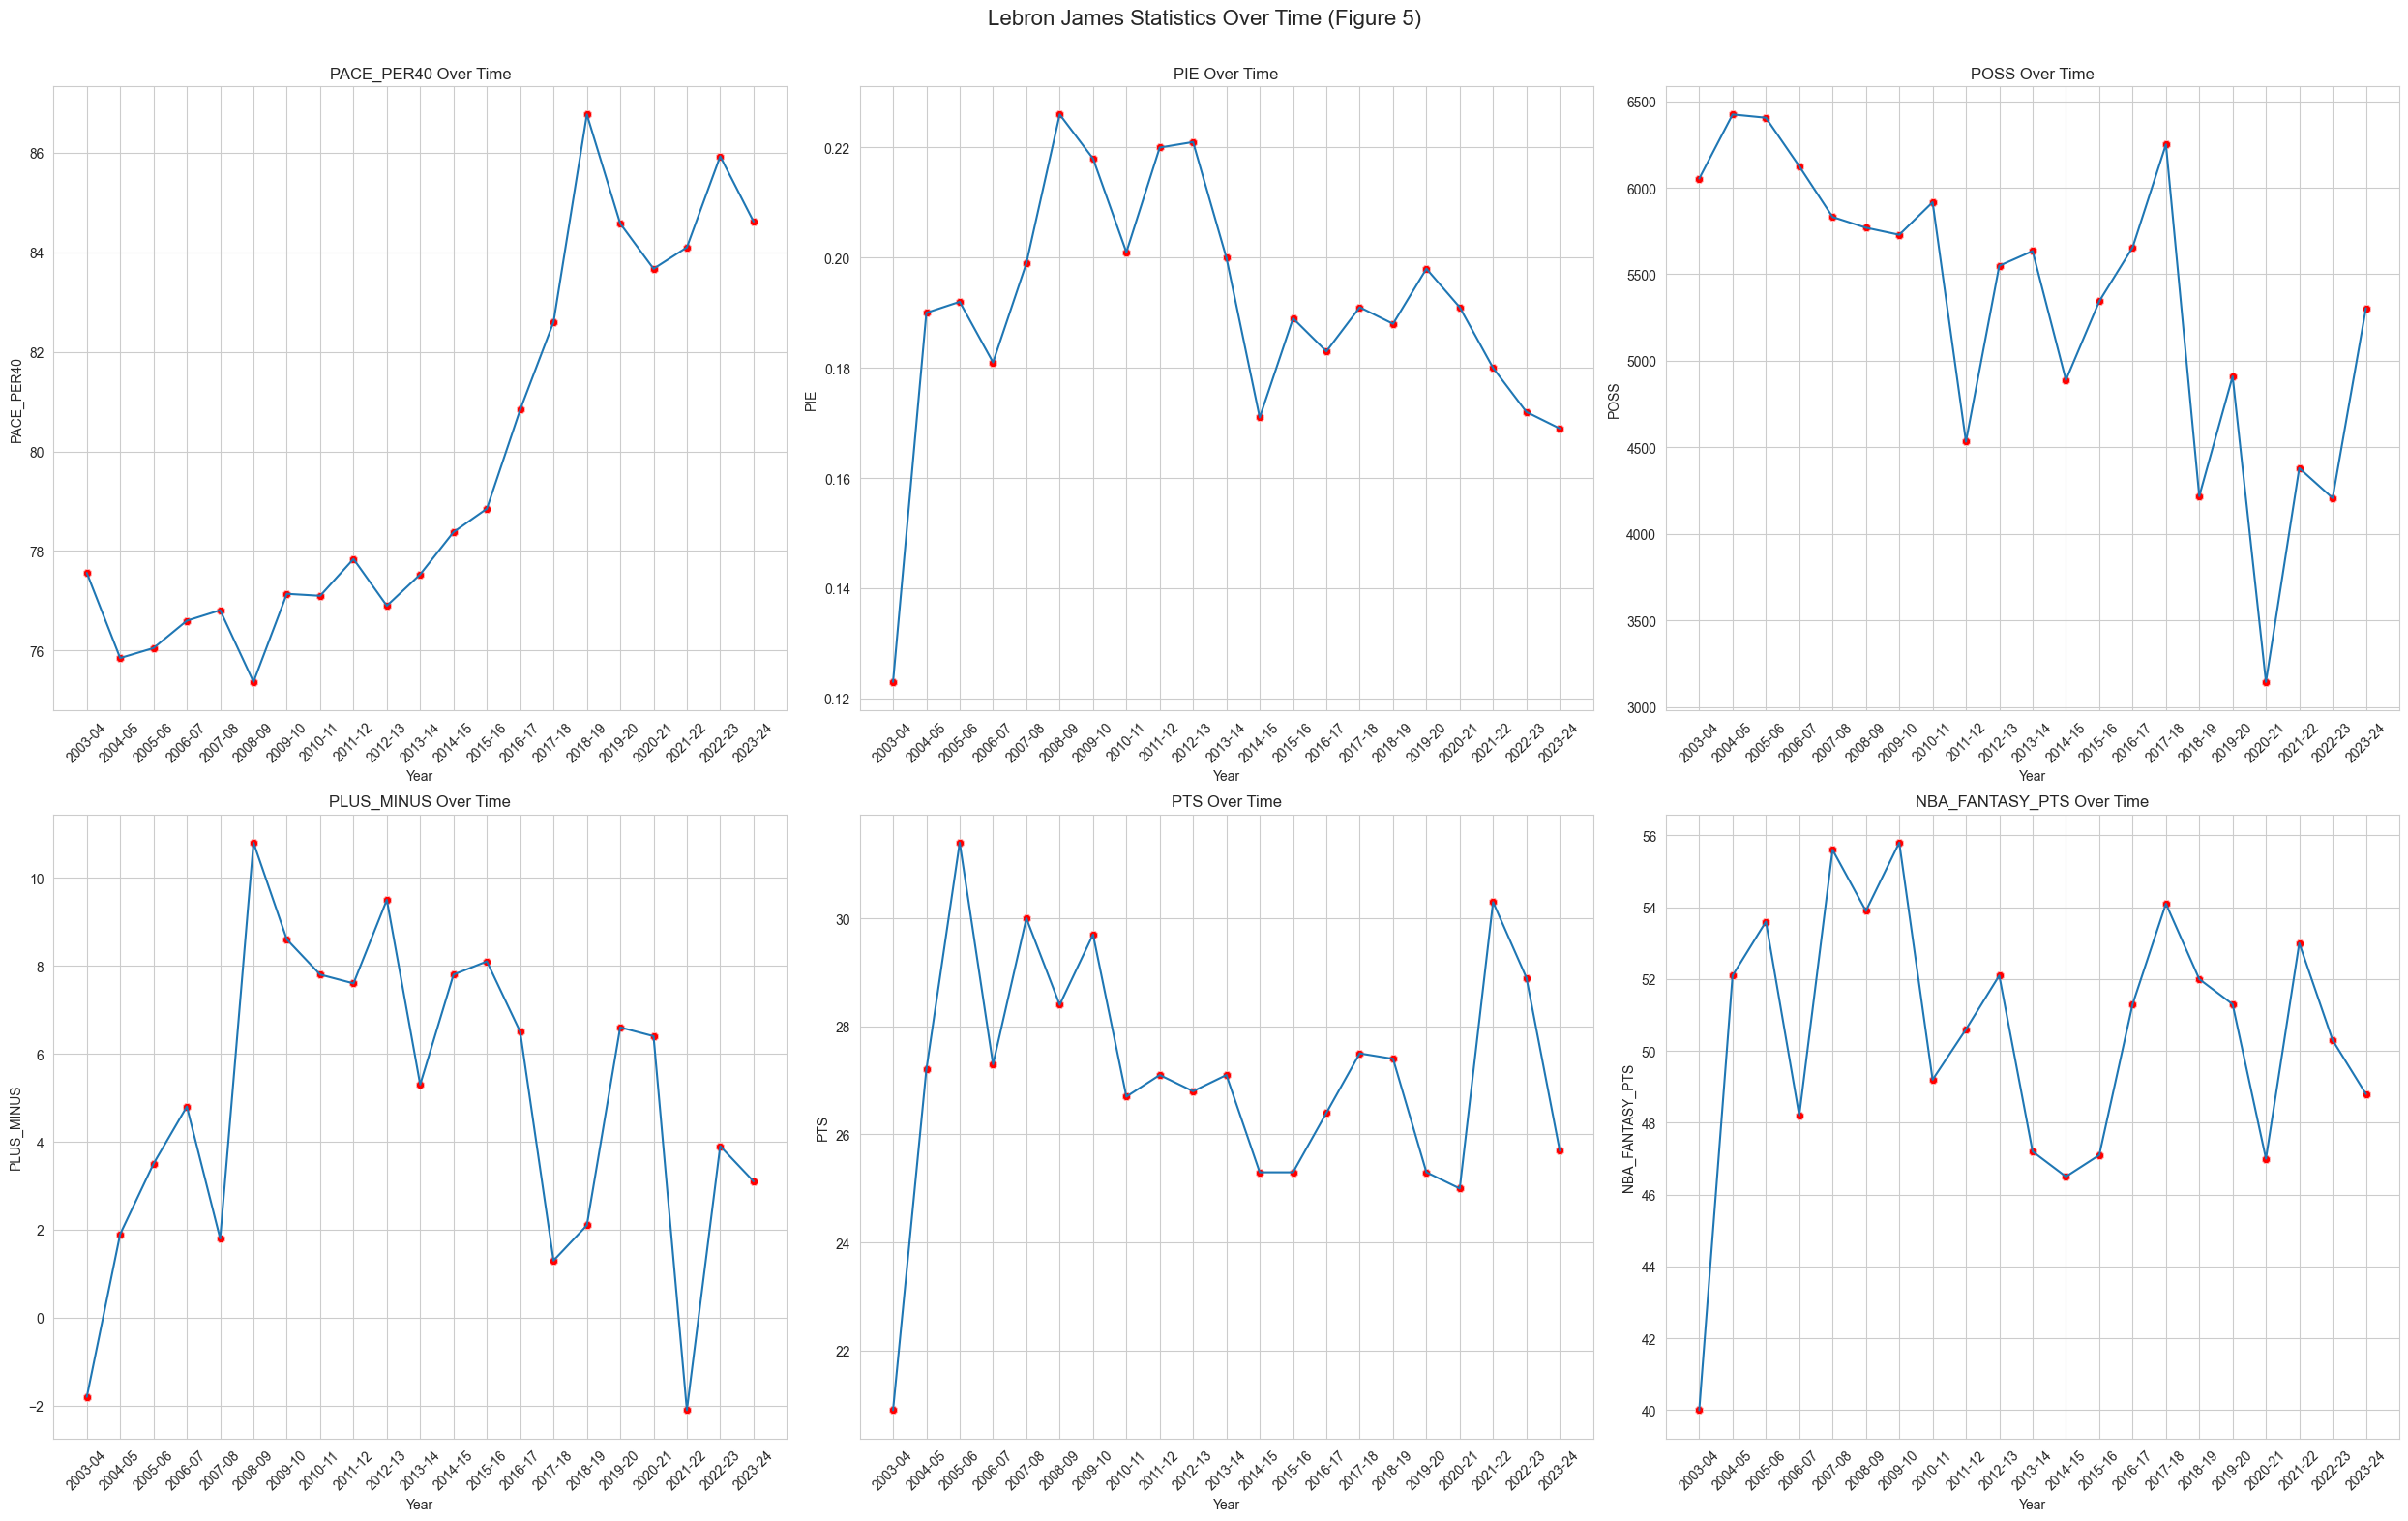

In [2]:
# Yearly data analysis 
name = "Lebron James"
dashboards = util.get_dashboard(util.get_player_id(name))
basic_dash = dashboards[0]
adv_dash = dashboards[1]
full_dash = dashboards[2]

# What I think the useful categories are
full_categories = ["GP", "W", "W_PCT", "MIN", "FGM", "FG_PCT", "FG3_PCT", "FT_PCT", "OFF_RATING", "DEF_RATING", "NET_RATING", "AST_PCT", "AST_RATIO", "USG_PCT", "OREB_PCT", "DREB_PCT", "REB_PCT", "TOV", "TM_TOV_PCT", "E_TOV_PCT", "BLK", "BLKA", "TS_PCT", "PACE", "PACE_PER40", "PIE", "POSS", "PLUS_MINUS", "PTS", "NBA_FANTASY_PTS"]

# Summary data of athlete's statistics
summary = full_dash[full_categories].describe()

# Career averages
average = full_dash[full_categories].mean()

# Plot metrics as a line plot over time. 
util.plot_metrics(name, full_categories, full_dash, yoy=False)


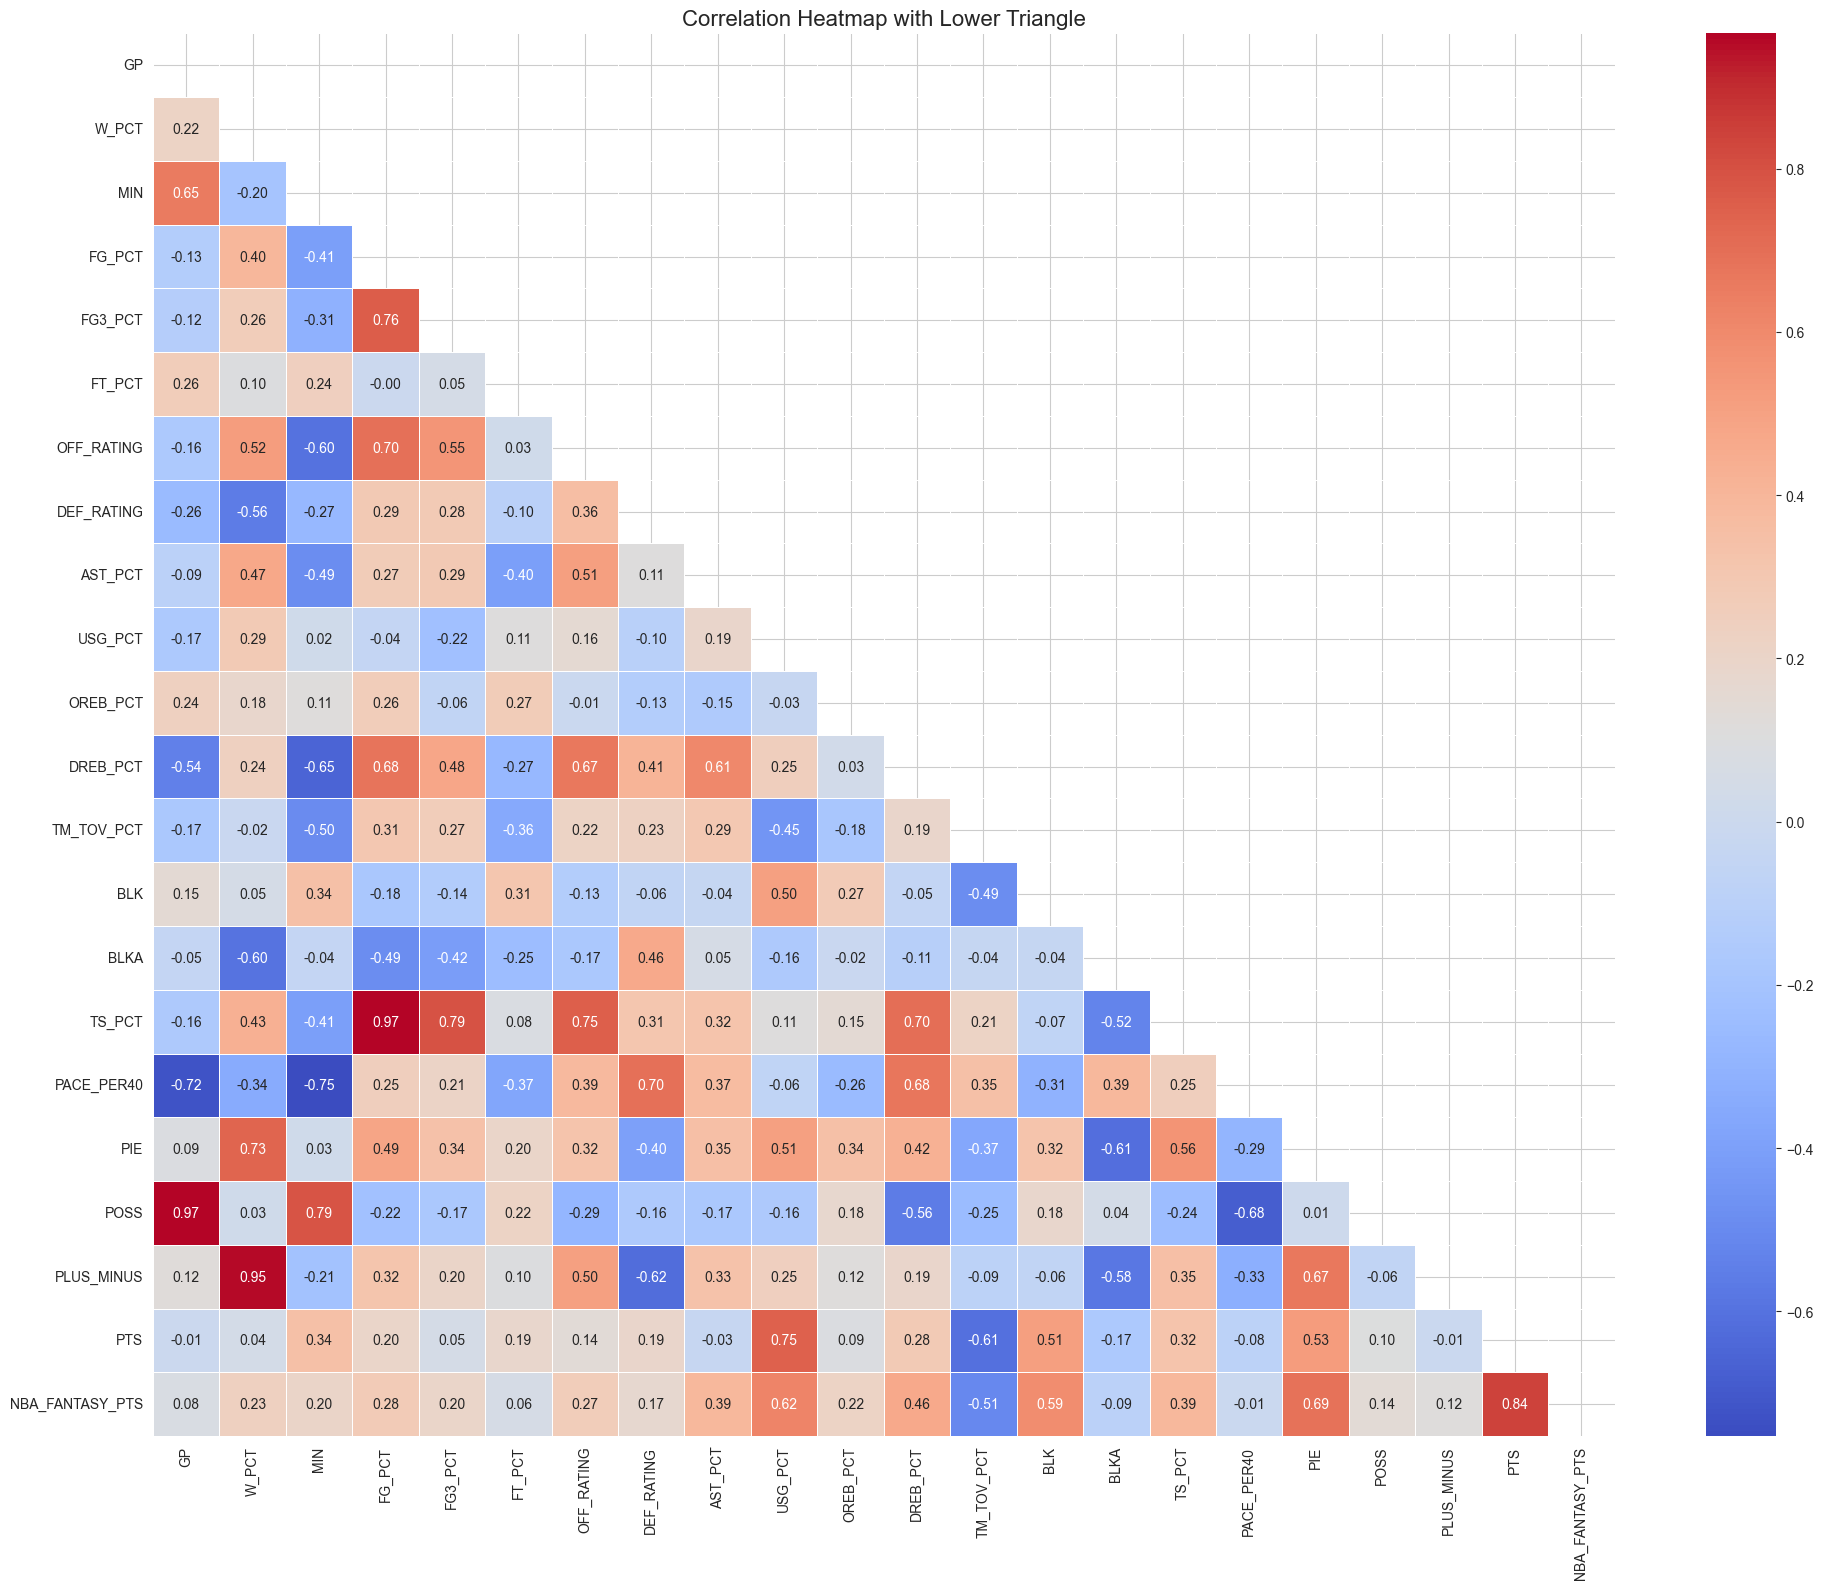

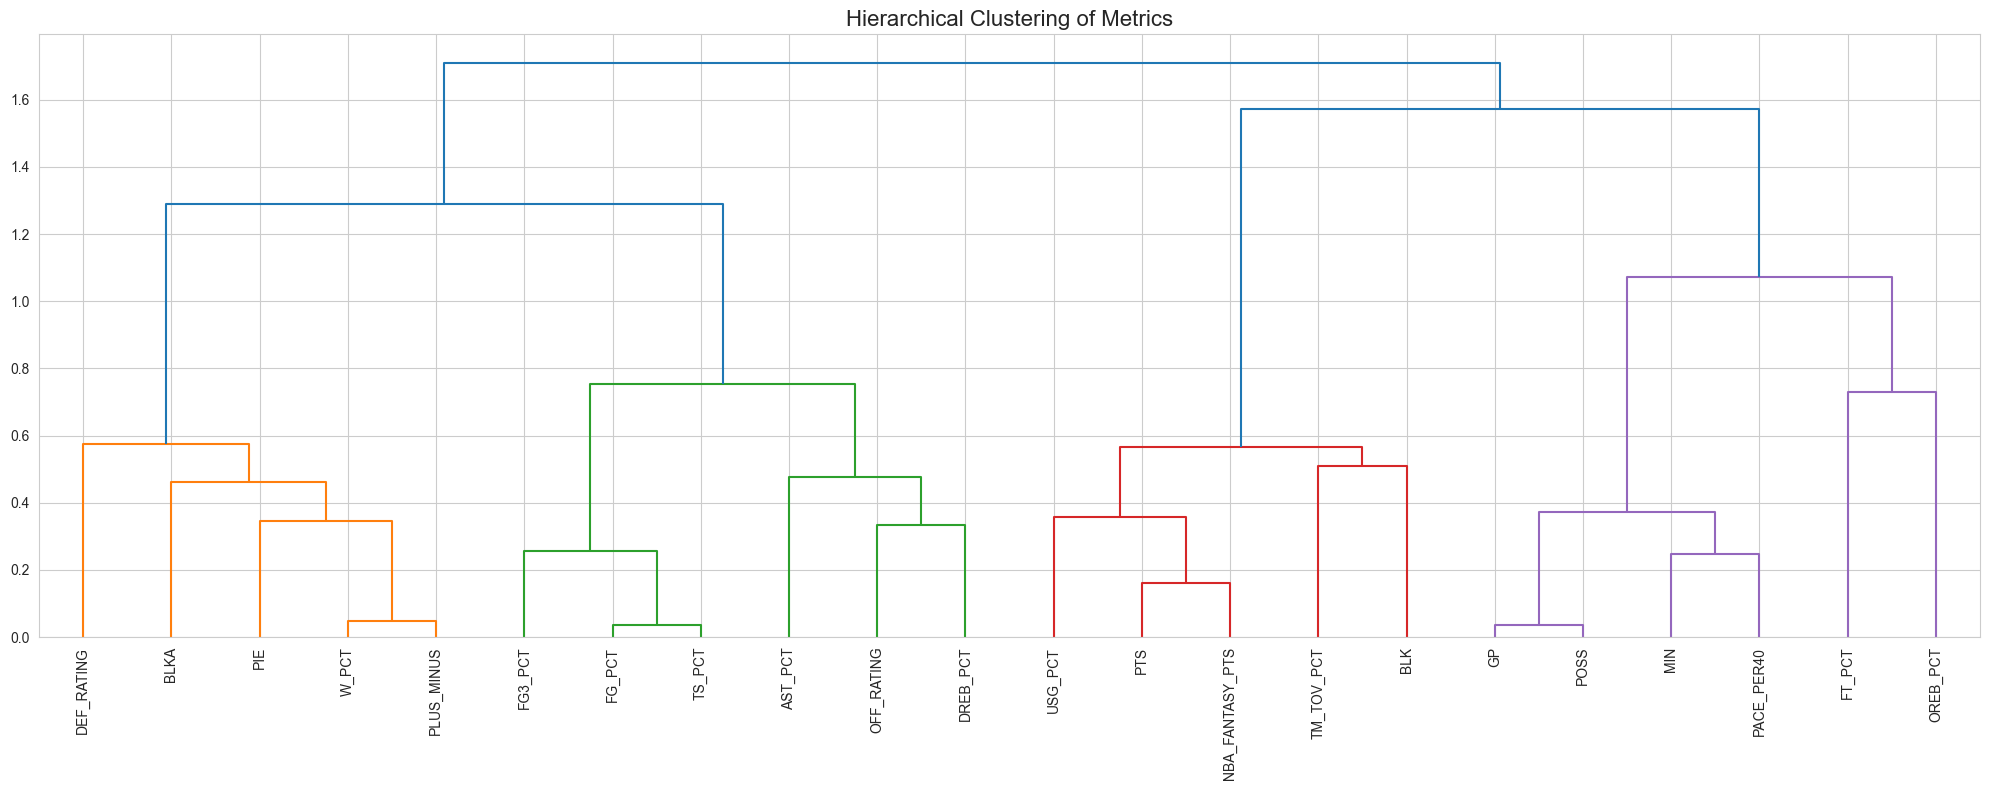

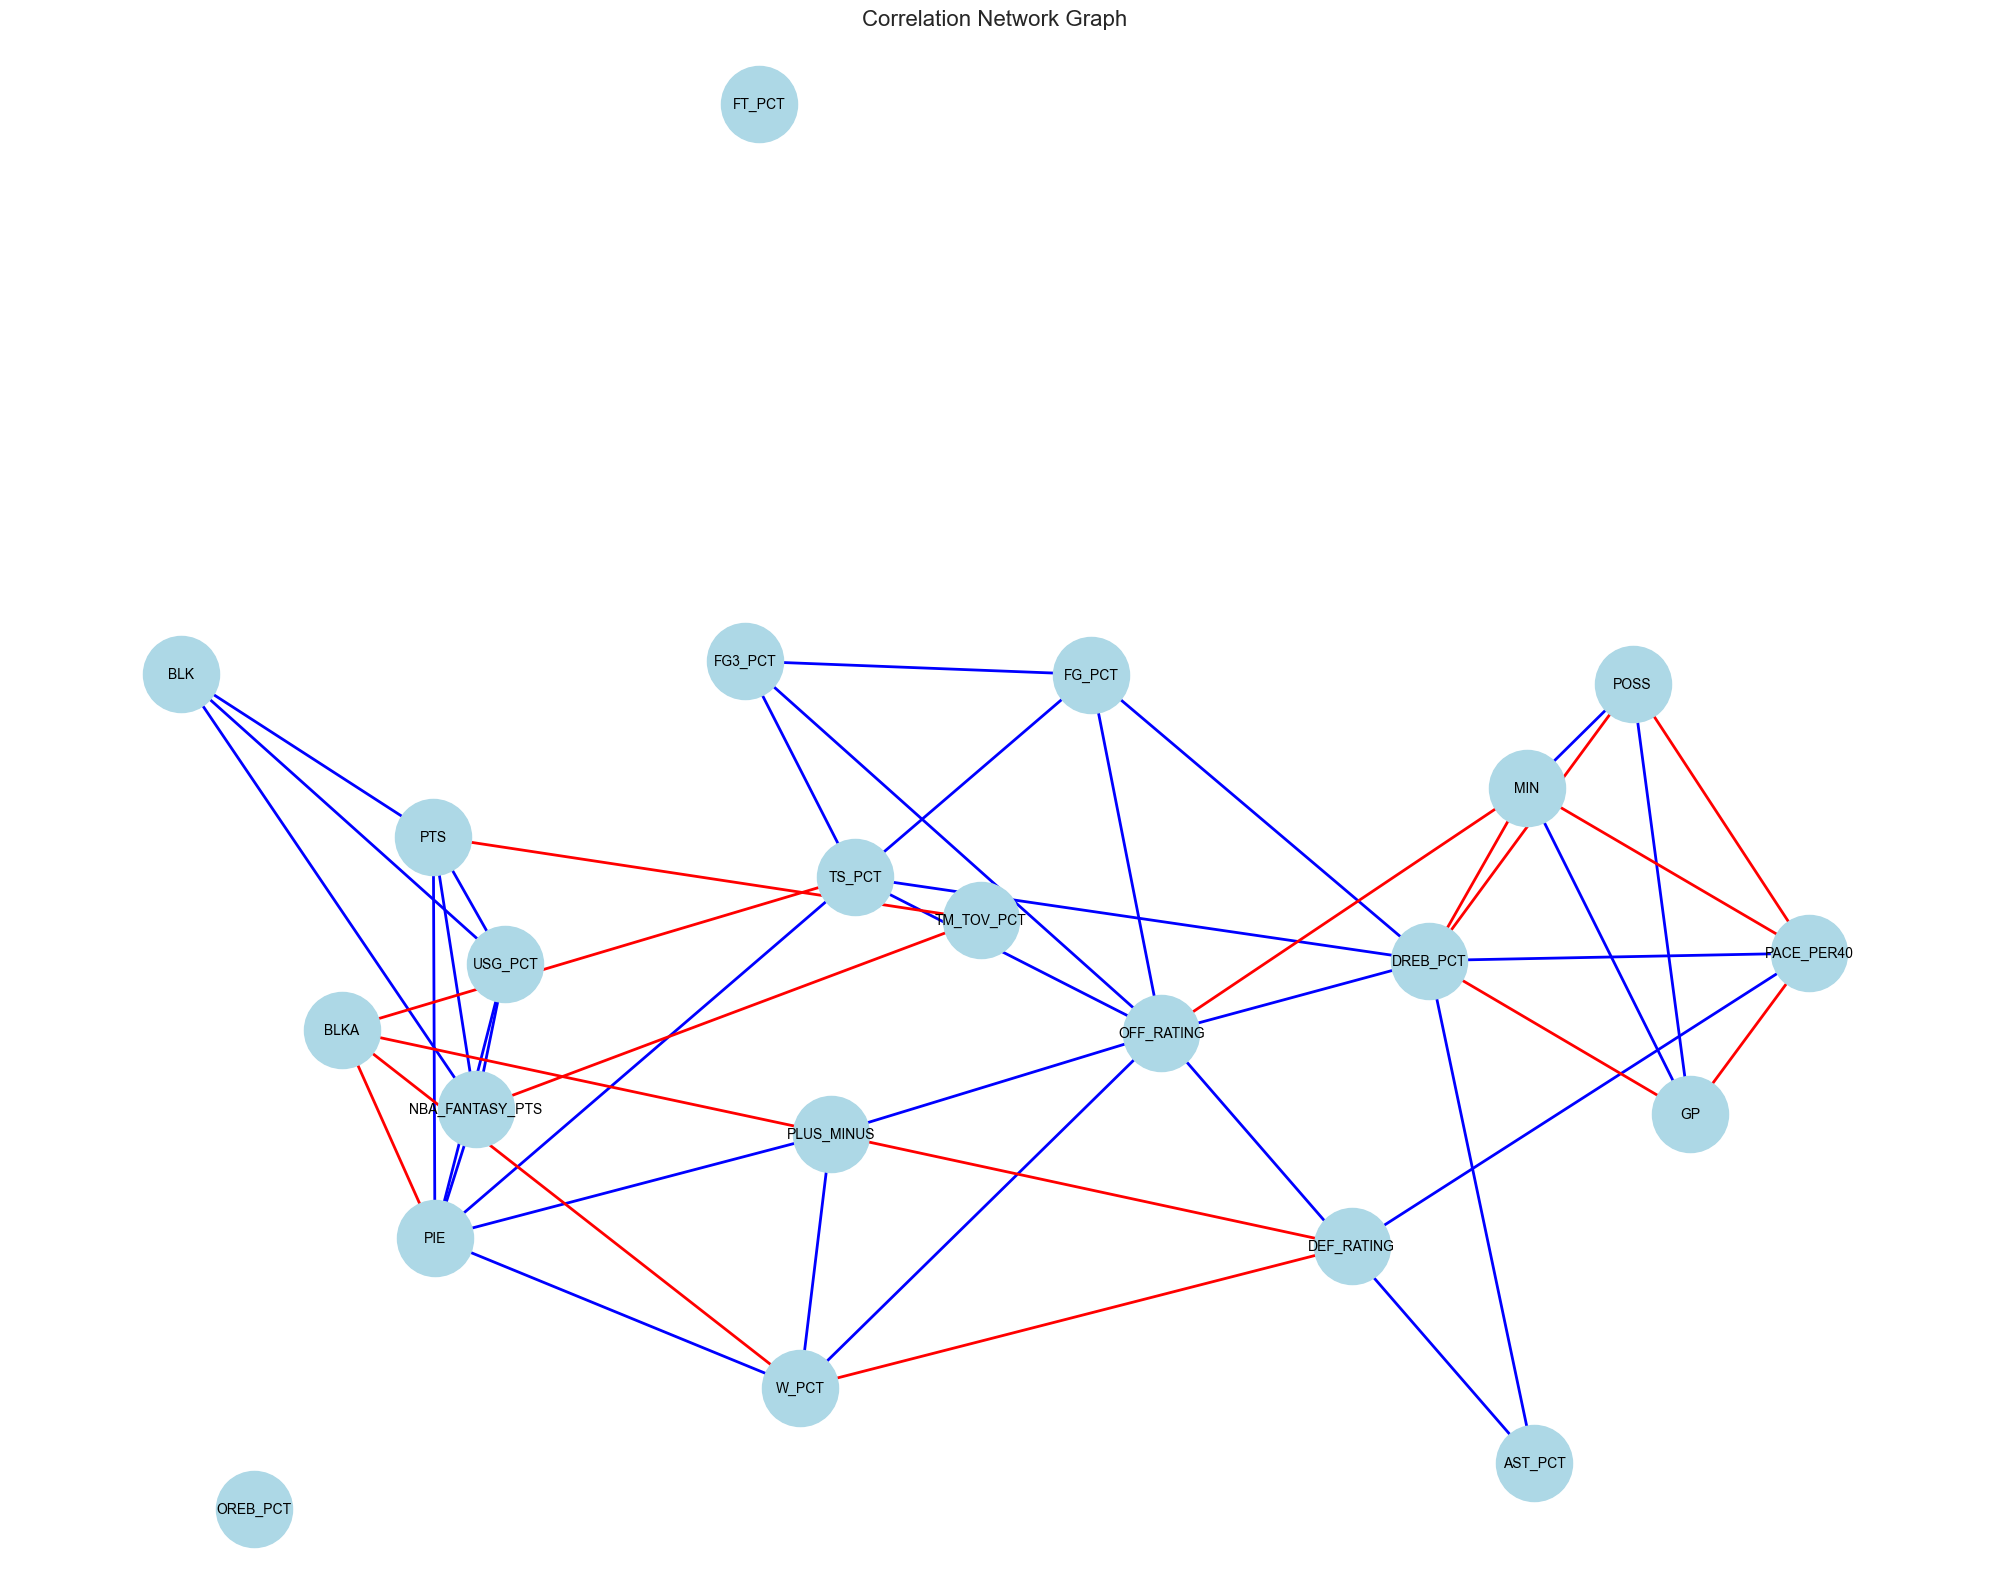

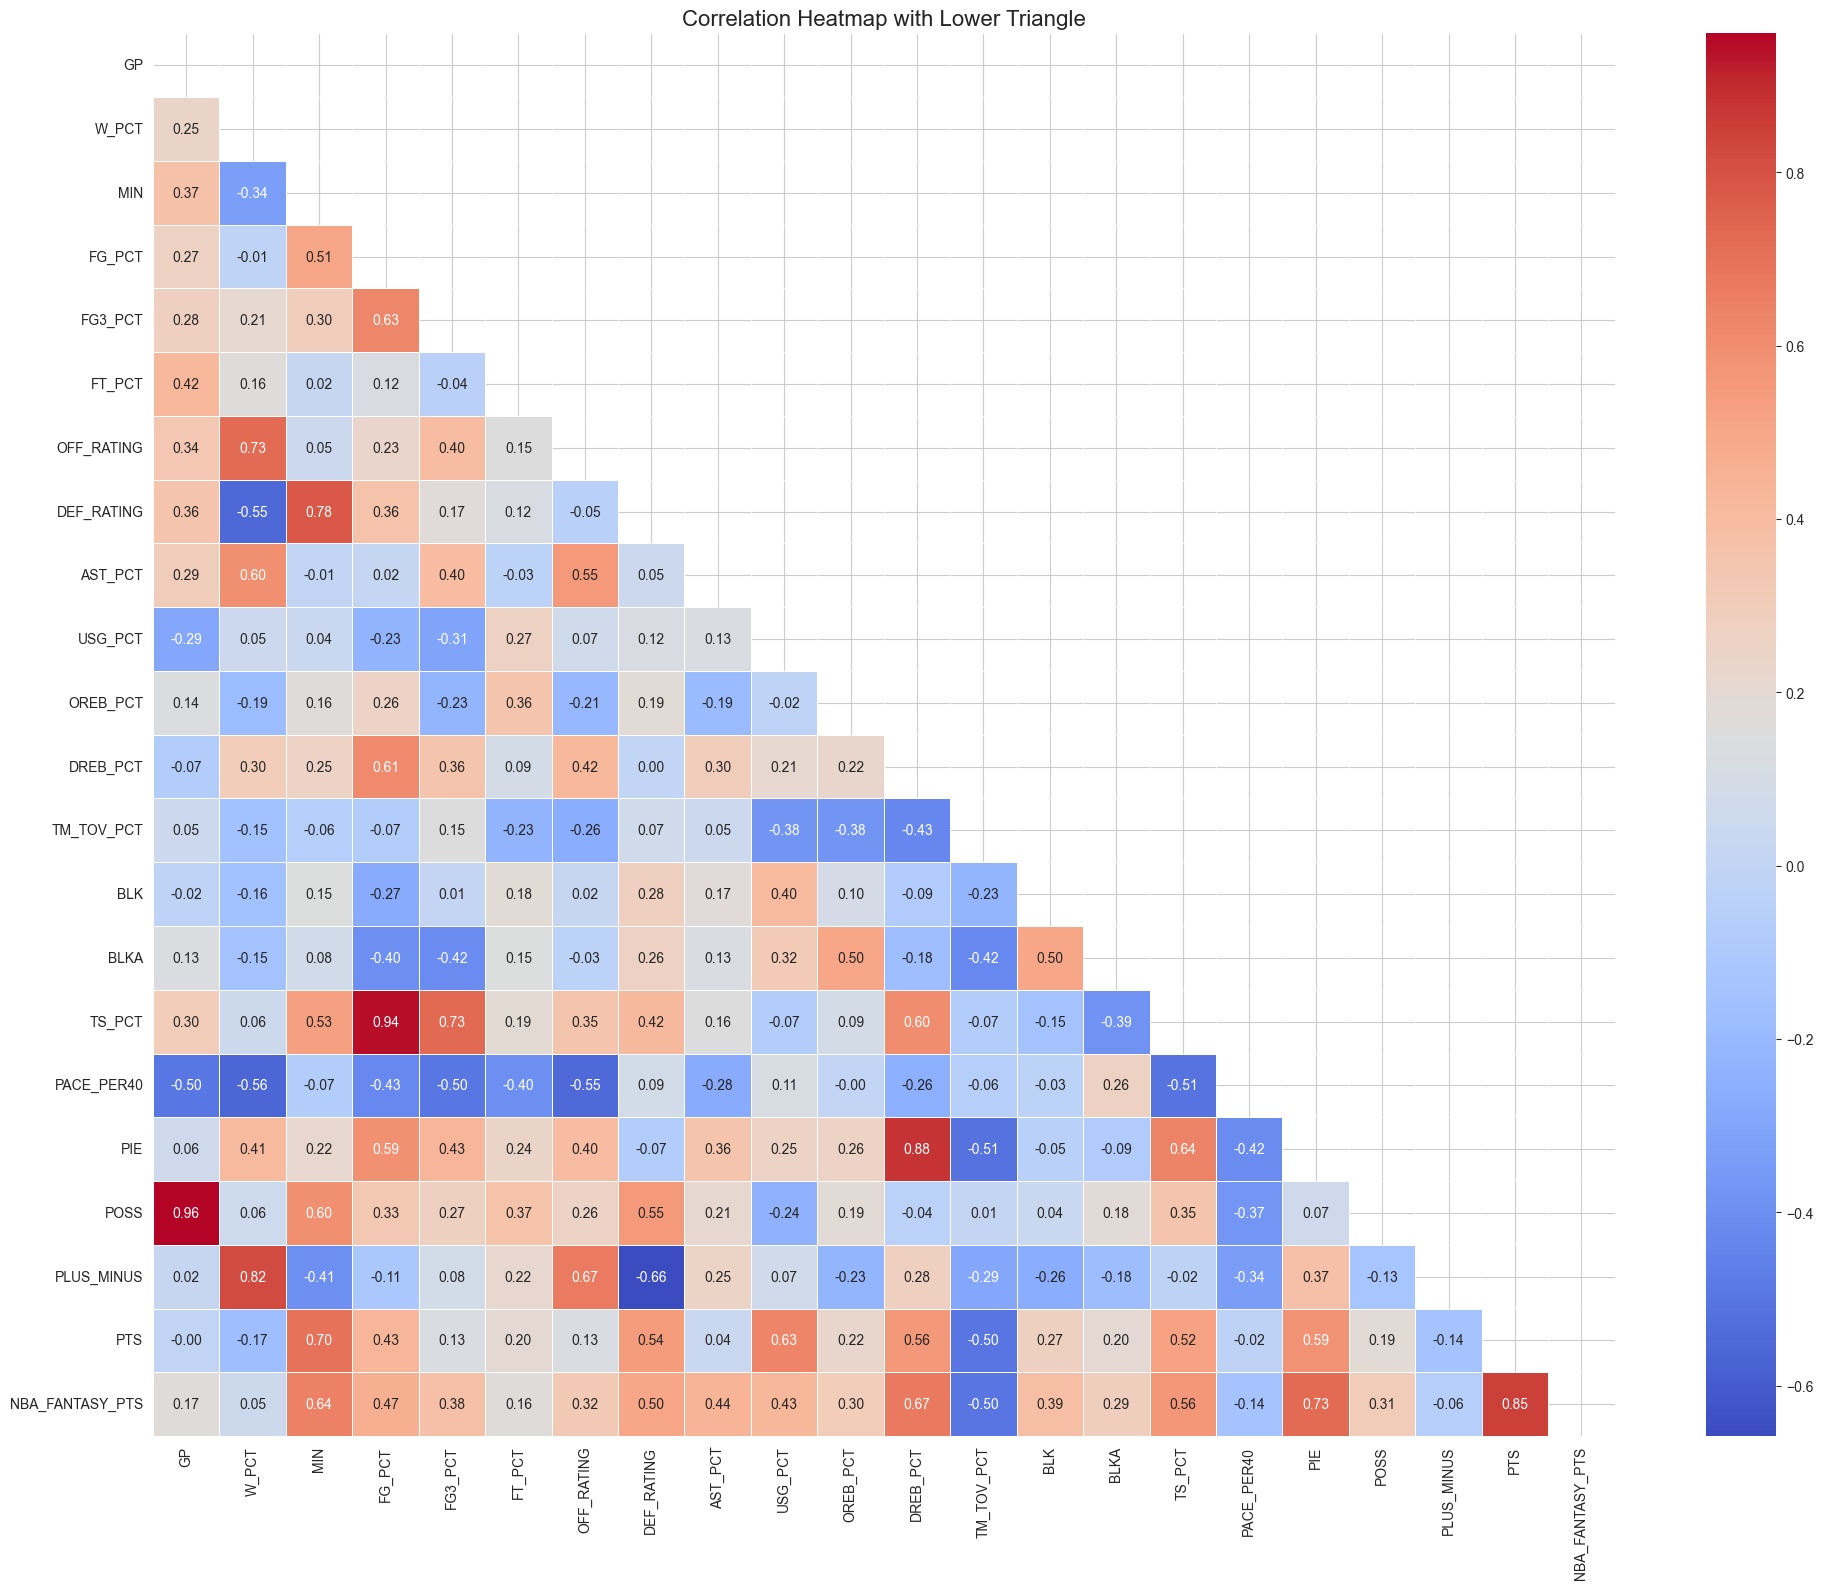

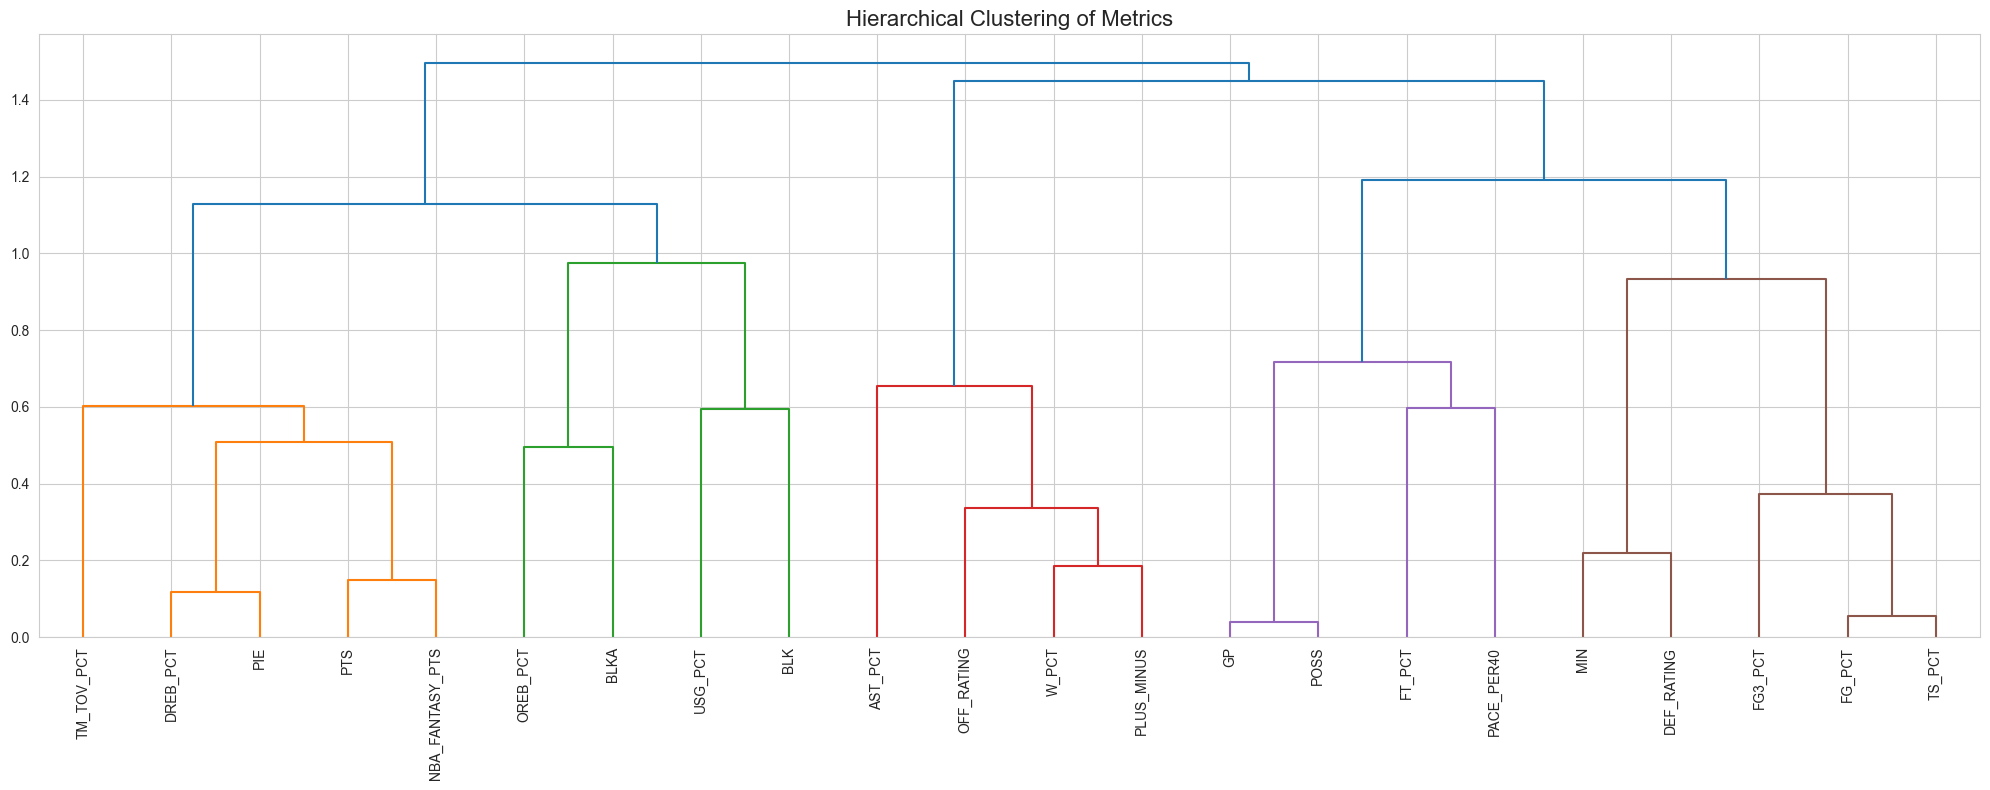

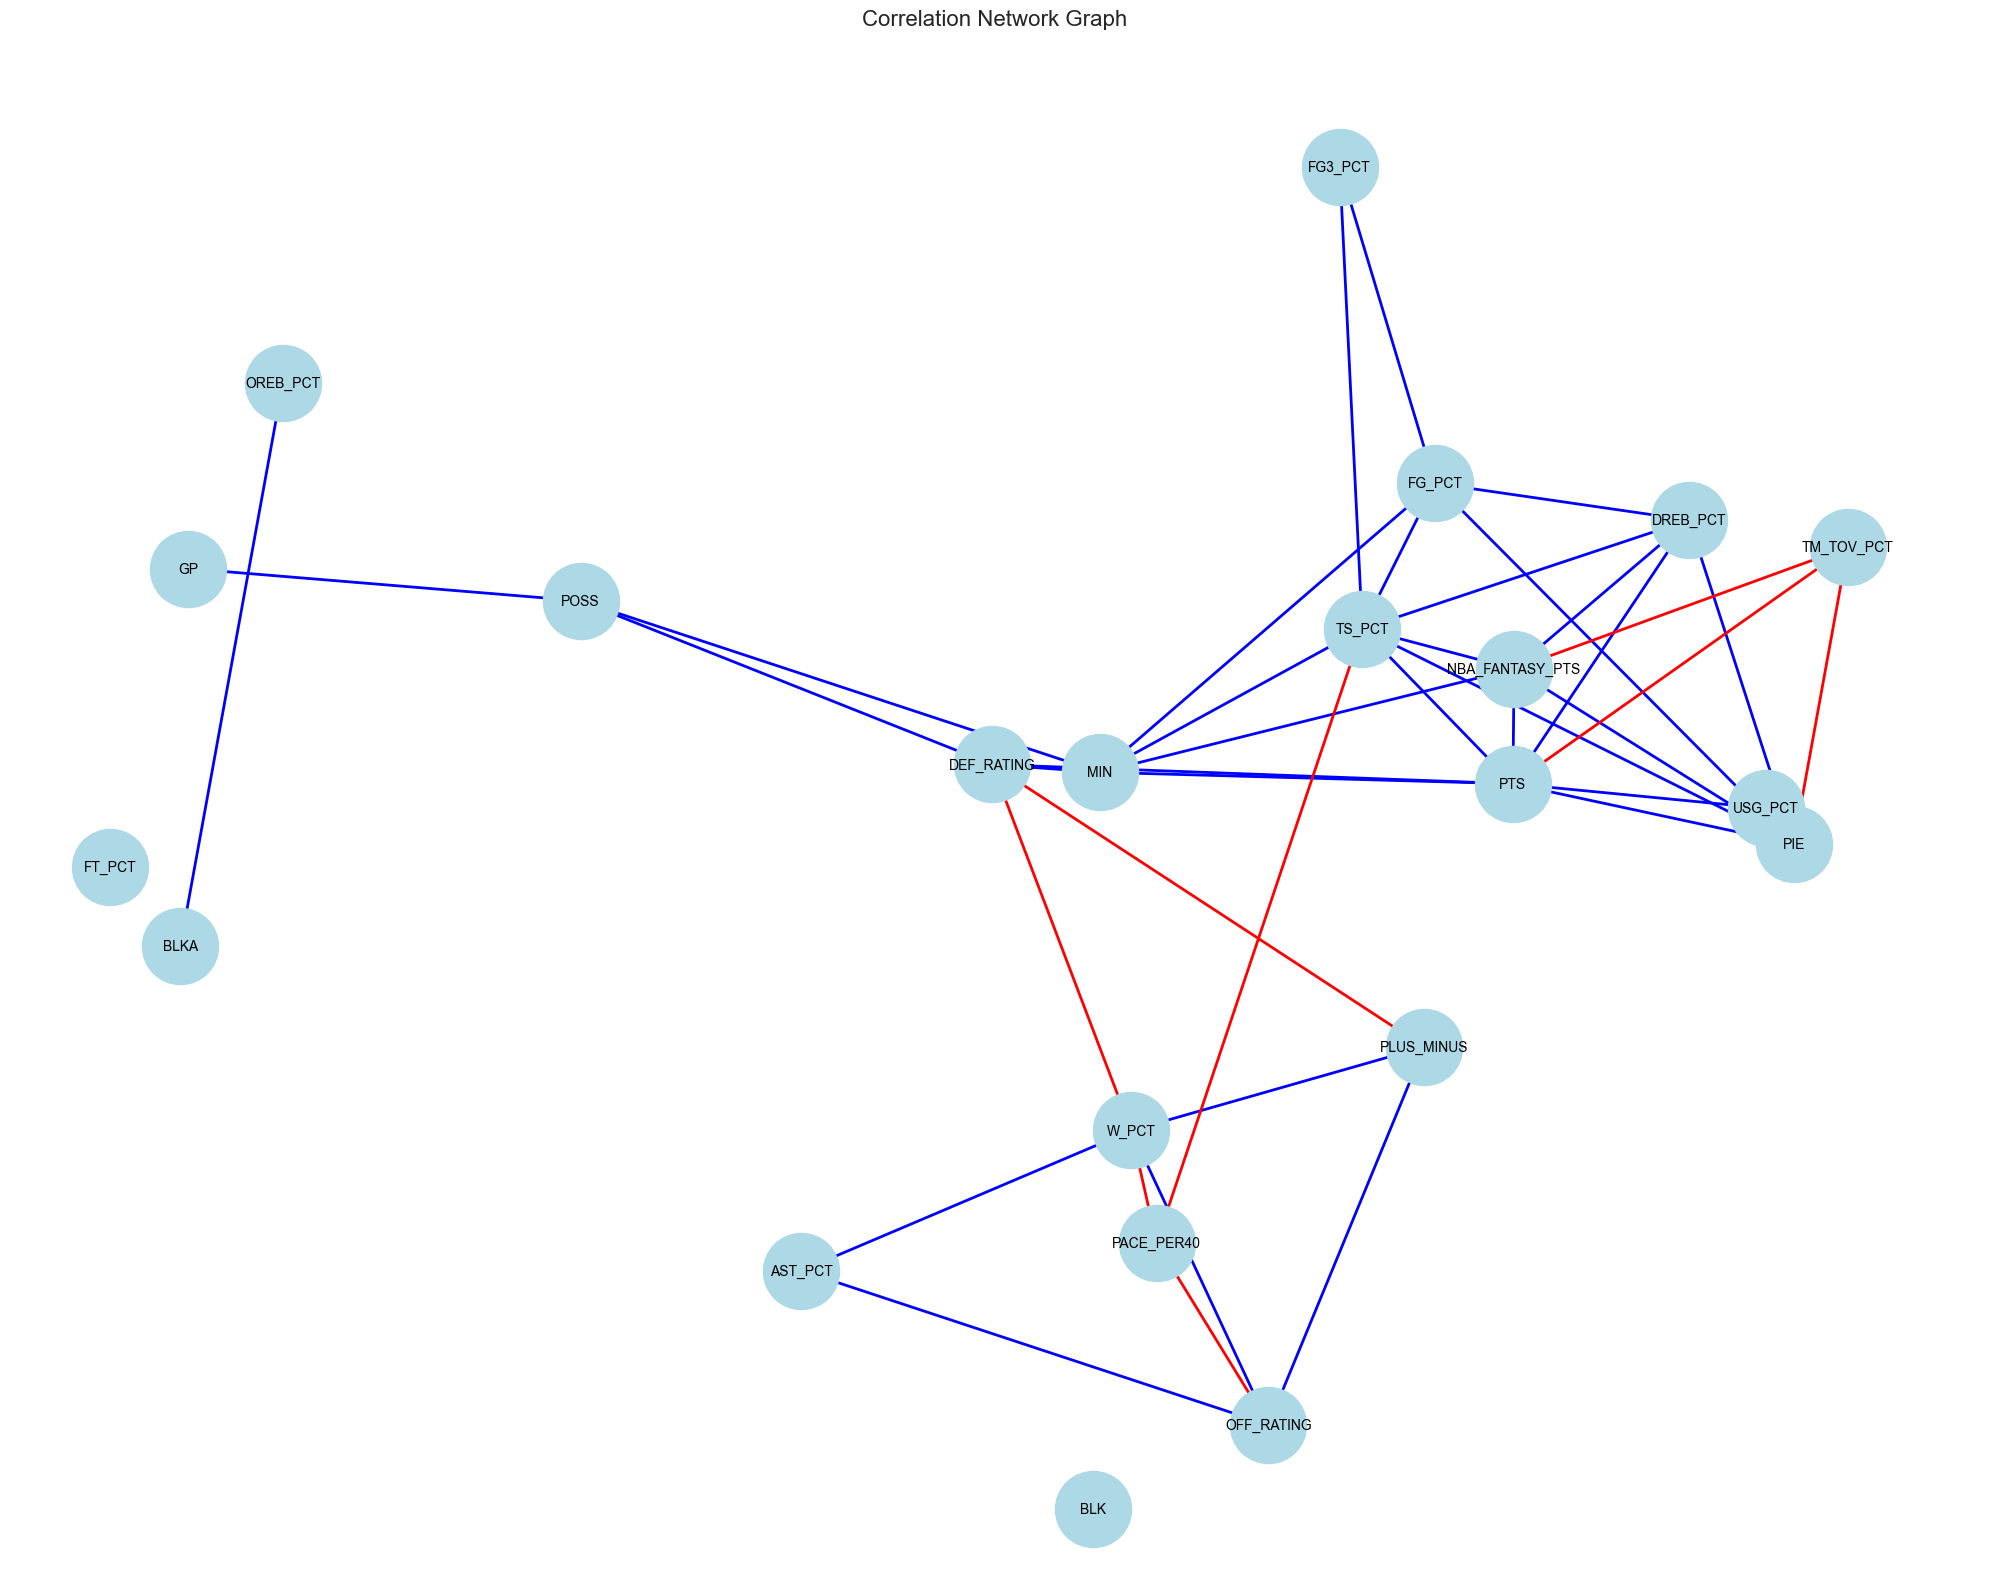

GP     W_PCT       MIN    FG_PCT   FG3_PCT    FT_PCT  \
GP               1.000000  0.245099  0.368286  0.269752  0.280145  0.421020   
W_PCT            0.245099  1.000000 -0.335353 -0.014366  0.212384  0.160727   
MIN              0.368286 -0.335353  1.000000  0.506774  0.296316  0.020091   
FG_PCT           0.269752 -0.014366  0.506774  1.000000  0.626642  0.121389   
FG3_PCT          0.280145  0.212384  0.296316  0.626642  1.000000 -0.040366   
FT_PCT           0.421020  0.160727  0.020091  0.121389 -0.040366  1.000000   
OFF_RATING       0.335052  0.725586  0.048235  0.227778  0.395874  0.153289   
DEF_RATING       0.356401 -0.554014  0.781525  0.364691  0.170892  0.121597   
AST_PCT          0.290125  0.598619 -0.005707  0.015083  0.398151 -0.032003   
USG_PCT         -0.292072  0.045004  0.040716 -0.228993 -0.309976  0.270259   
OREB_PCT         0.142601 -0.187828  0.161697  0.256258 -0.225174  0.358020   
DREB_PCT        -0.073229  0.301261  0.252956  0.612924  0.357639  0.092598   
TM_TOV_PCT       0.045012 -0.153826 -0.059128 -0.071367  0.154012 -0.230603   
BLK             -0.017573 -0.157540  0.150192 -0.273596  0.011851  0.184180   
BLKA             0.132572 -0.151471  0.080722 -0.401450 -0.417015  0.148954   
TS_PCT           0.298220  0.055612  0.526413  0.944367  0.732487  0.190934   
PACE_PER40      -0.495682 -0.558970 -0.072057 -0.429813 -0.497459 -0.402057   
PIE              0.064694  0.409396  0.216955  0.593181  0.433247  0.241087   
POSS             0.960239  0.062253  0.598103  0.331280  0.272728  0.365971   
PLUS_MINUS       0.023690  0.815075 -0.405192 -0.110093  0.084969  0.218745   
PTS             -0.002242 -0.173030  0.700990  0.429793  0.128565  0.195961   
NBA_FANTASY_PTS  0.165637  0.053364  0.644602  0.465197  0.376229  0.164425   

                 OFF_RATING  DEF_RATING   AST_PCT   USG_PCT  ...  TM_TOV_PCT  \
GP                 0.335052    0.356401  0.290125 -0.292072  ...    0.045012   
W_PCT              0.725586   -0.554014  0.598619  0.045004  ...   -0.153826   
MIN                0.048235    0.781525 -0.005707  0.040716  ...   -0.059128   
FG_PCT             0.227778    0.364691  0.015083 -0.228993  ...   -0.071367   
FG3_PCT            0.395874    0.170892  0.398151 -0.309976  ...    0.154012   
FT_PCT             0.153289    0.121597 -0.032003  0.270259  ...   -0.230603   
OFF_RATING         1.000000   -0.048124  0.554045  0.069094  ...   -0.262921   
DEF_RATING        -0.048124    1.000000  0.045874  0.122378  ...    0.069456   
AST_PCT            0.554045    0.045874  1.000000  0.127538  ...    0.048135   
USG_PCT            0.069094    0.122378  0.127538  1.000000  ...   -0.377447   
OREB_PCT          -0.205440    0.187869 -0.190656 -0.016078  ...   -0.376332   
DREB_PCT           0.418104    0.003683  0.295454  0.209226  ...   -0.434606   
TM_TOV_PCT        -0.262921    0.069456  0.048135 -0.377447  ...    1.000000   
BLK                0.024419    0.282779  0.171723  0.404304  ...   -0.225307   
BLKA              -0.028681    0.260843  0.128880  0.317316  ...   -0.424449   
TS_PCT             0.354168    0.415744  0.155227 -0.070247  ...   -0.073178   
PACE_PER40        -0.545779    0.085938 -0.275321  0.113236  ...   -0.063898   
PIE                0.399150   -0.074342  0.358256  0.253283  ...   -0.514945   
POSS               0.256596    0.549498  0.211897 -0.236593  ...    0.005987   
PLUS_MINUS         0.667507   -0.658173  0.247215  0.074785  ...   -0.294991   
PTS                0.129715    0.543501  0.039088  0.633691  ...   -0.500939   
NBA_FANTASY_PTS    0.322459    0.499839  0.439818  0.428549  ...   -0.500223   

                      BLK      BLKA    TS_PCT  PACE_PER40       PIE      POSS  \
GP              -0.017573  0.132572  0.298220   -0.495682  0.064694  0.960239   
W_PCT           -0.157540 -0.151471  0.055612   -0.558970  0.409396  0.062253   
MIN              0.150192  0.080722  0.526413   -0.072057  0.216955  0.598103   
FG_PCT          -0.273596 -0.401450  0.9

In [3]:
# Correlation analysis of by-year data

# For correlation, predictors that are related to each other should be removed.
corr_categories = ["GP", "W_PCT", "MIN", "FG_PCT", "FG3_PCT", "FT_PCT", "OFF_RATING", "DEF_RATING", "AST_PCT", "USG_PCT", "OREB_PCT", "DREB_PCT", "TM_TOV_PCT", "BLK", "BLKA", "TS_PCT", "PACE_PER40", "PIE", "POSS", "PLUS_MINUS", "PTS", "NBA_FANTASY_PTS"]

# Correlation heatmap

util.perform_correlation_analysis(full_dash, corr_categories)

yoy_changes = util.pct_change(full_dash, corr_categories).dropna()
util.perform_correlation_analysis(yoy_changes, corr_categories)

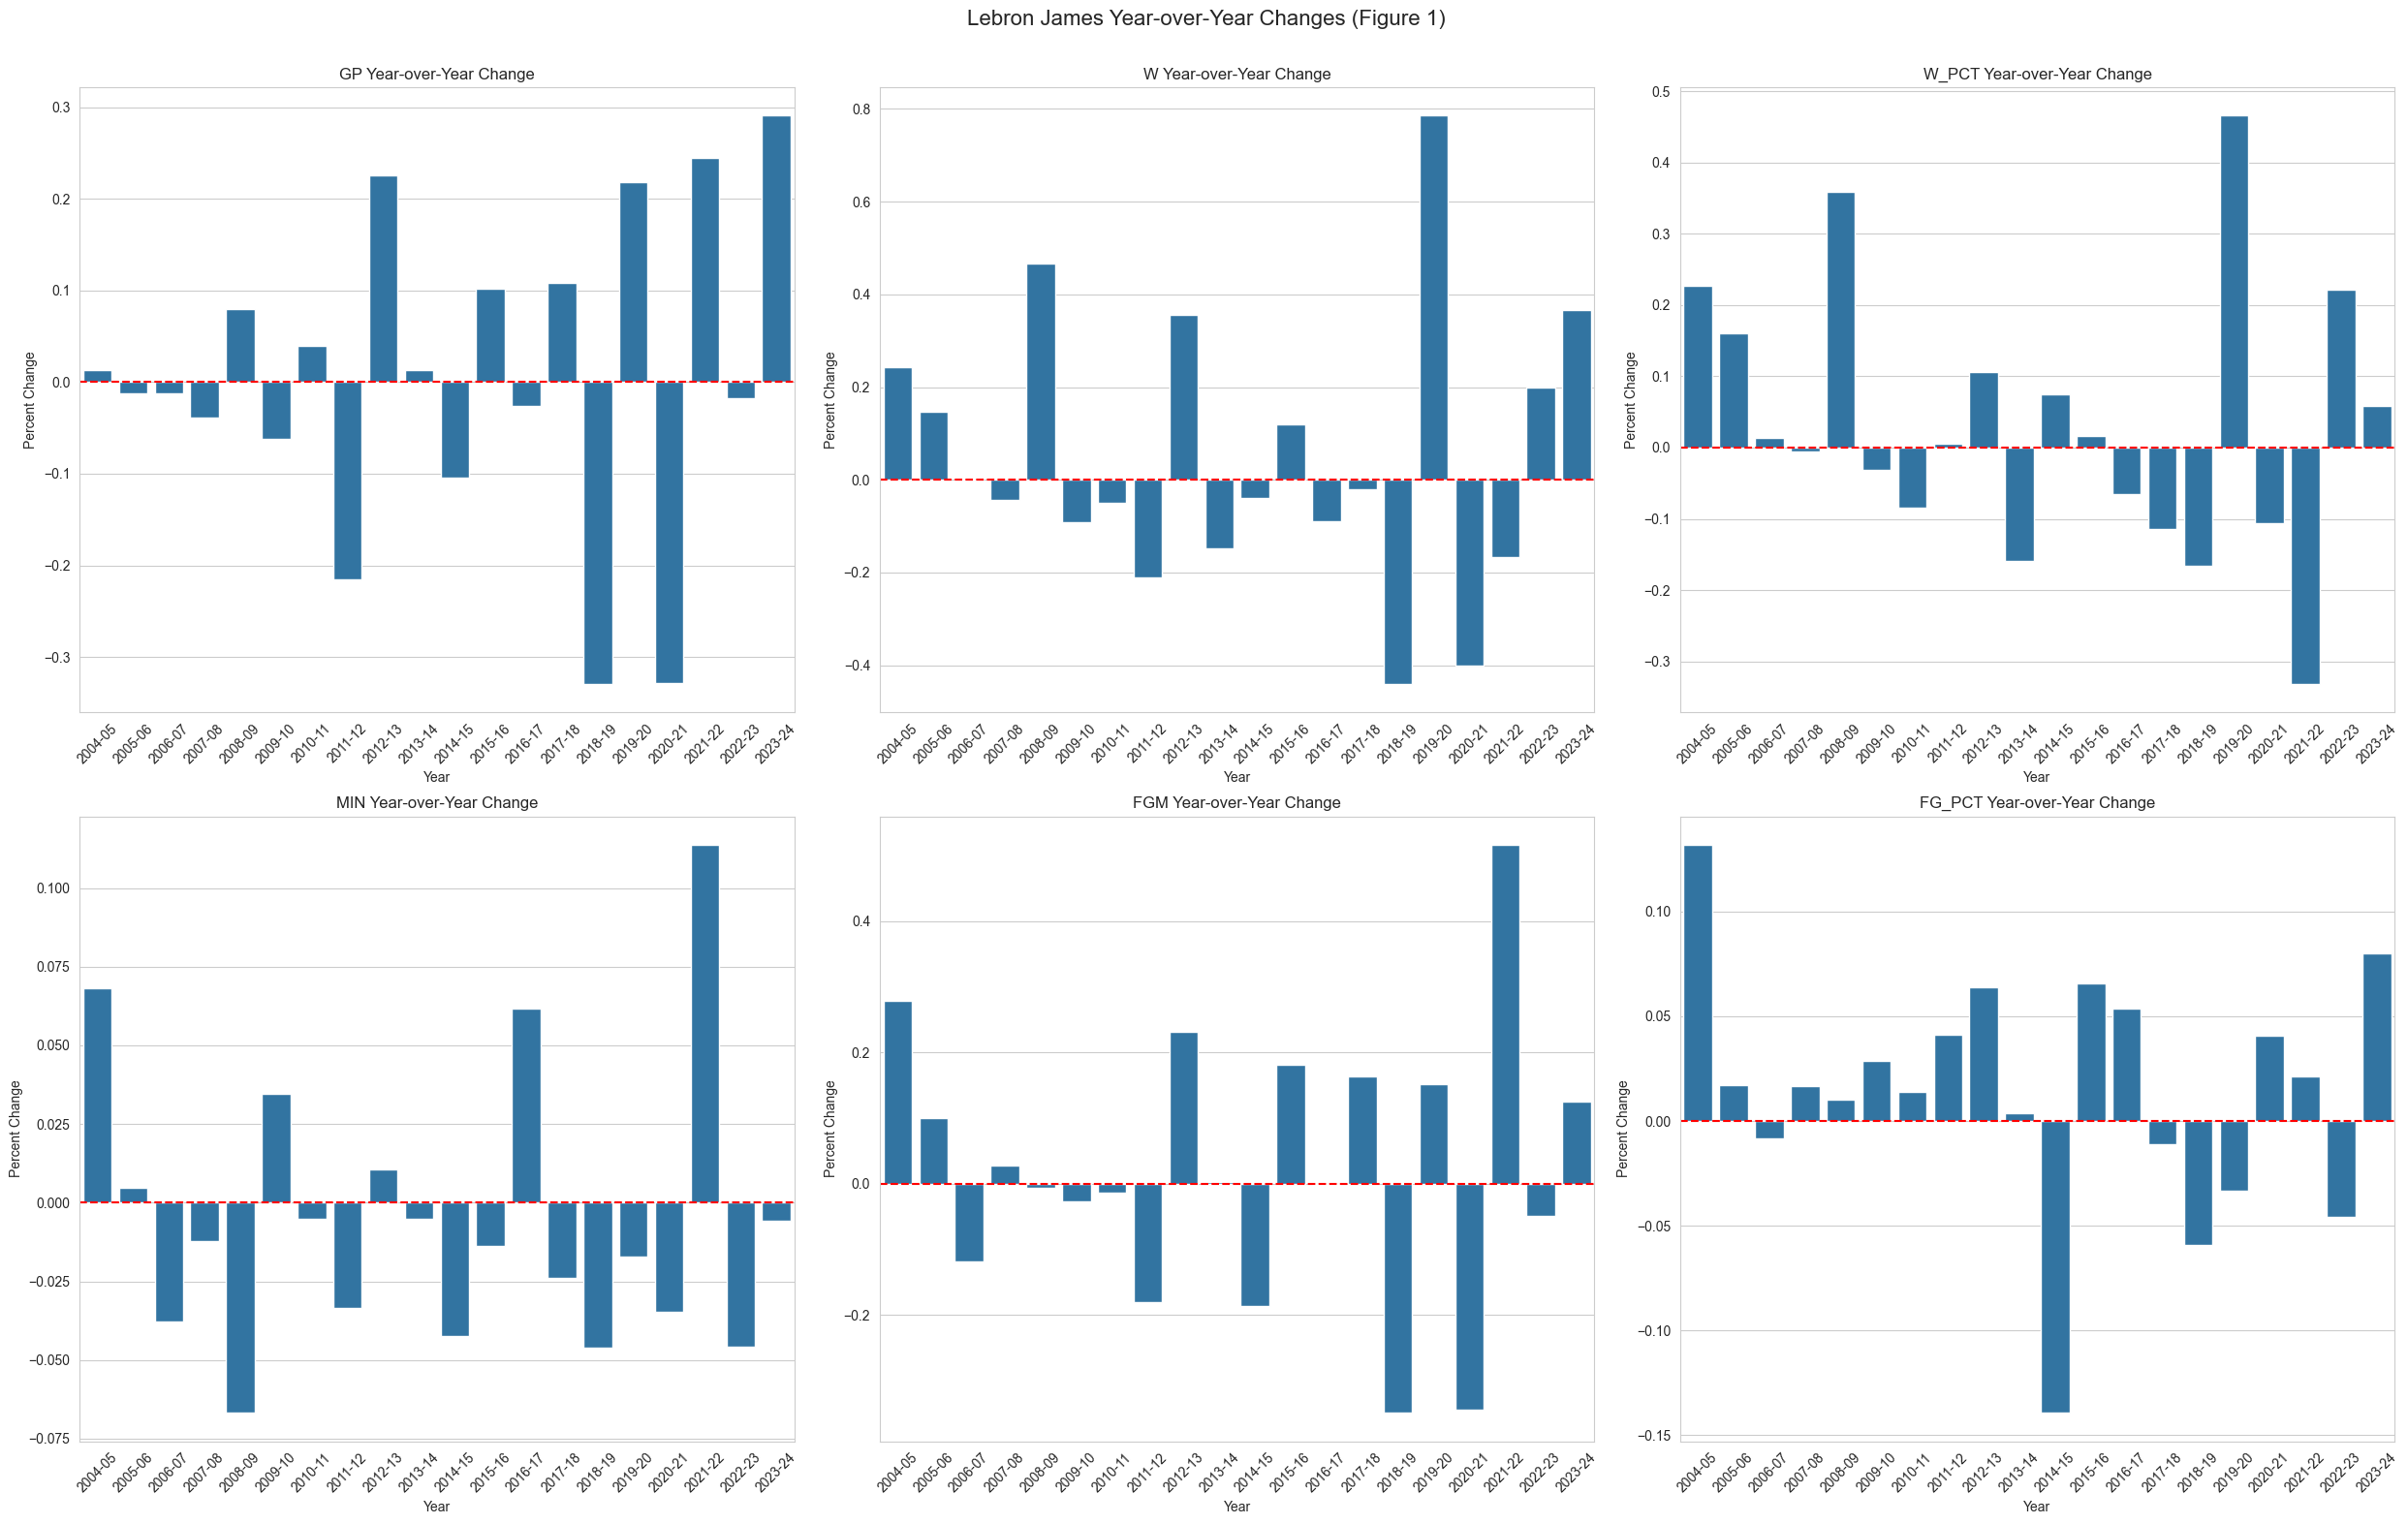

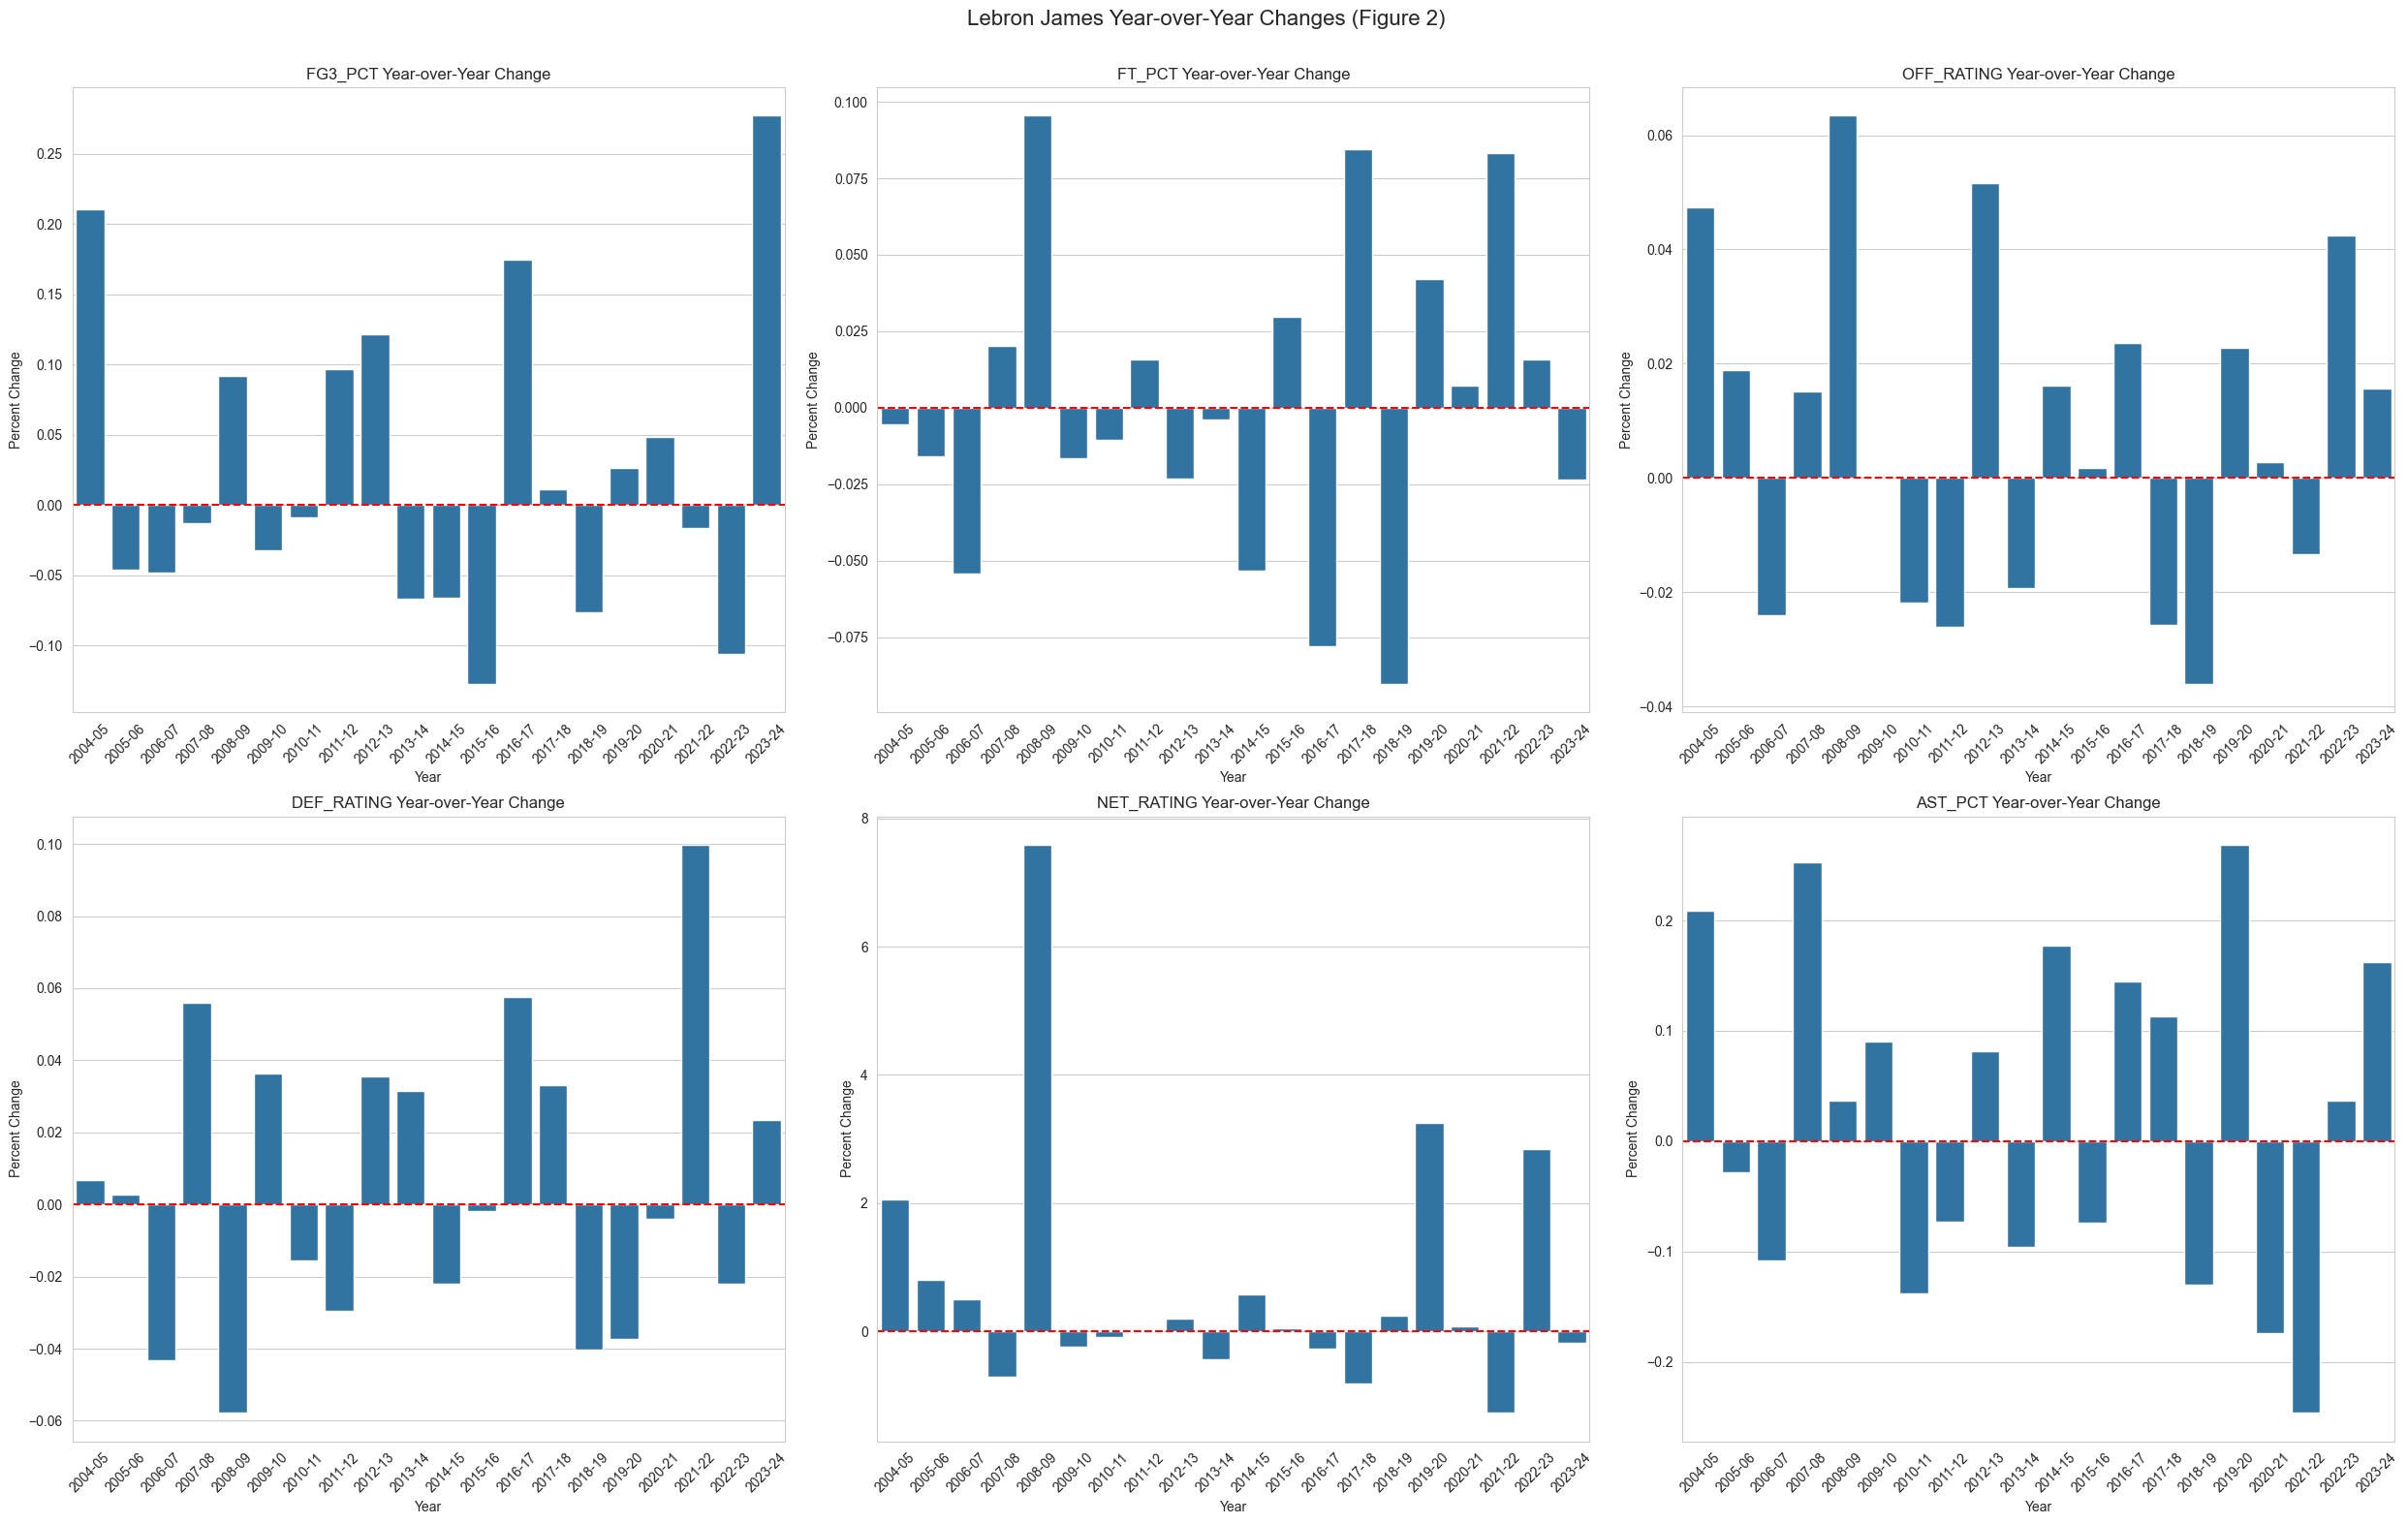

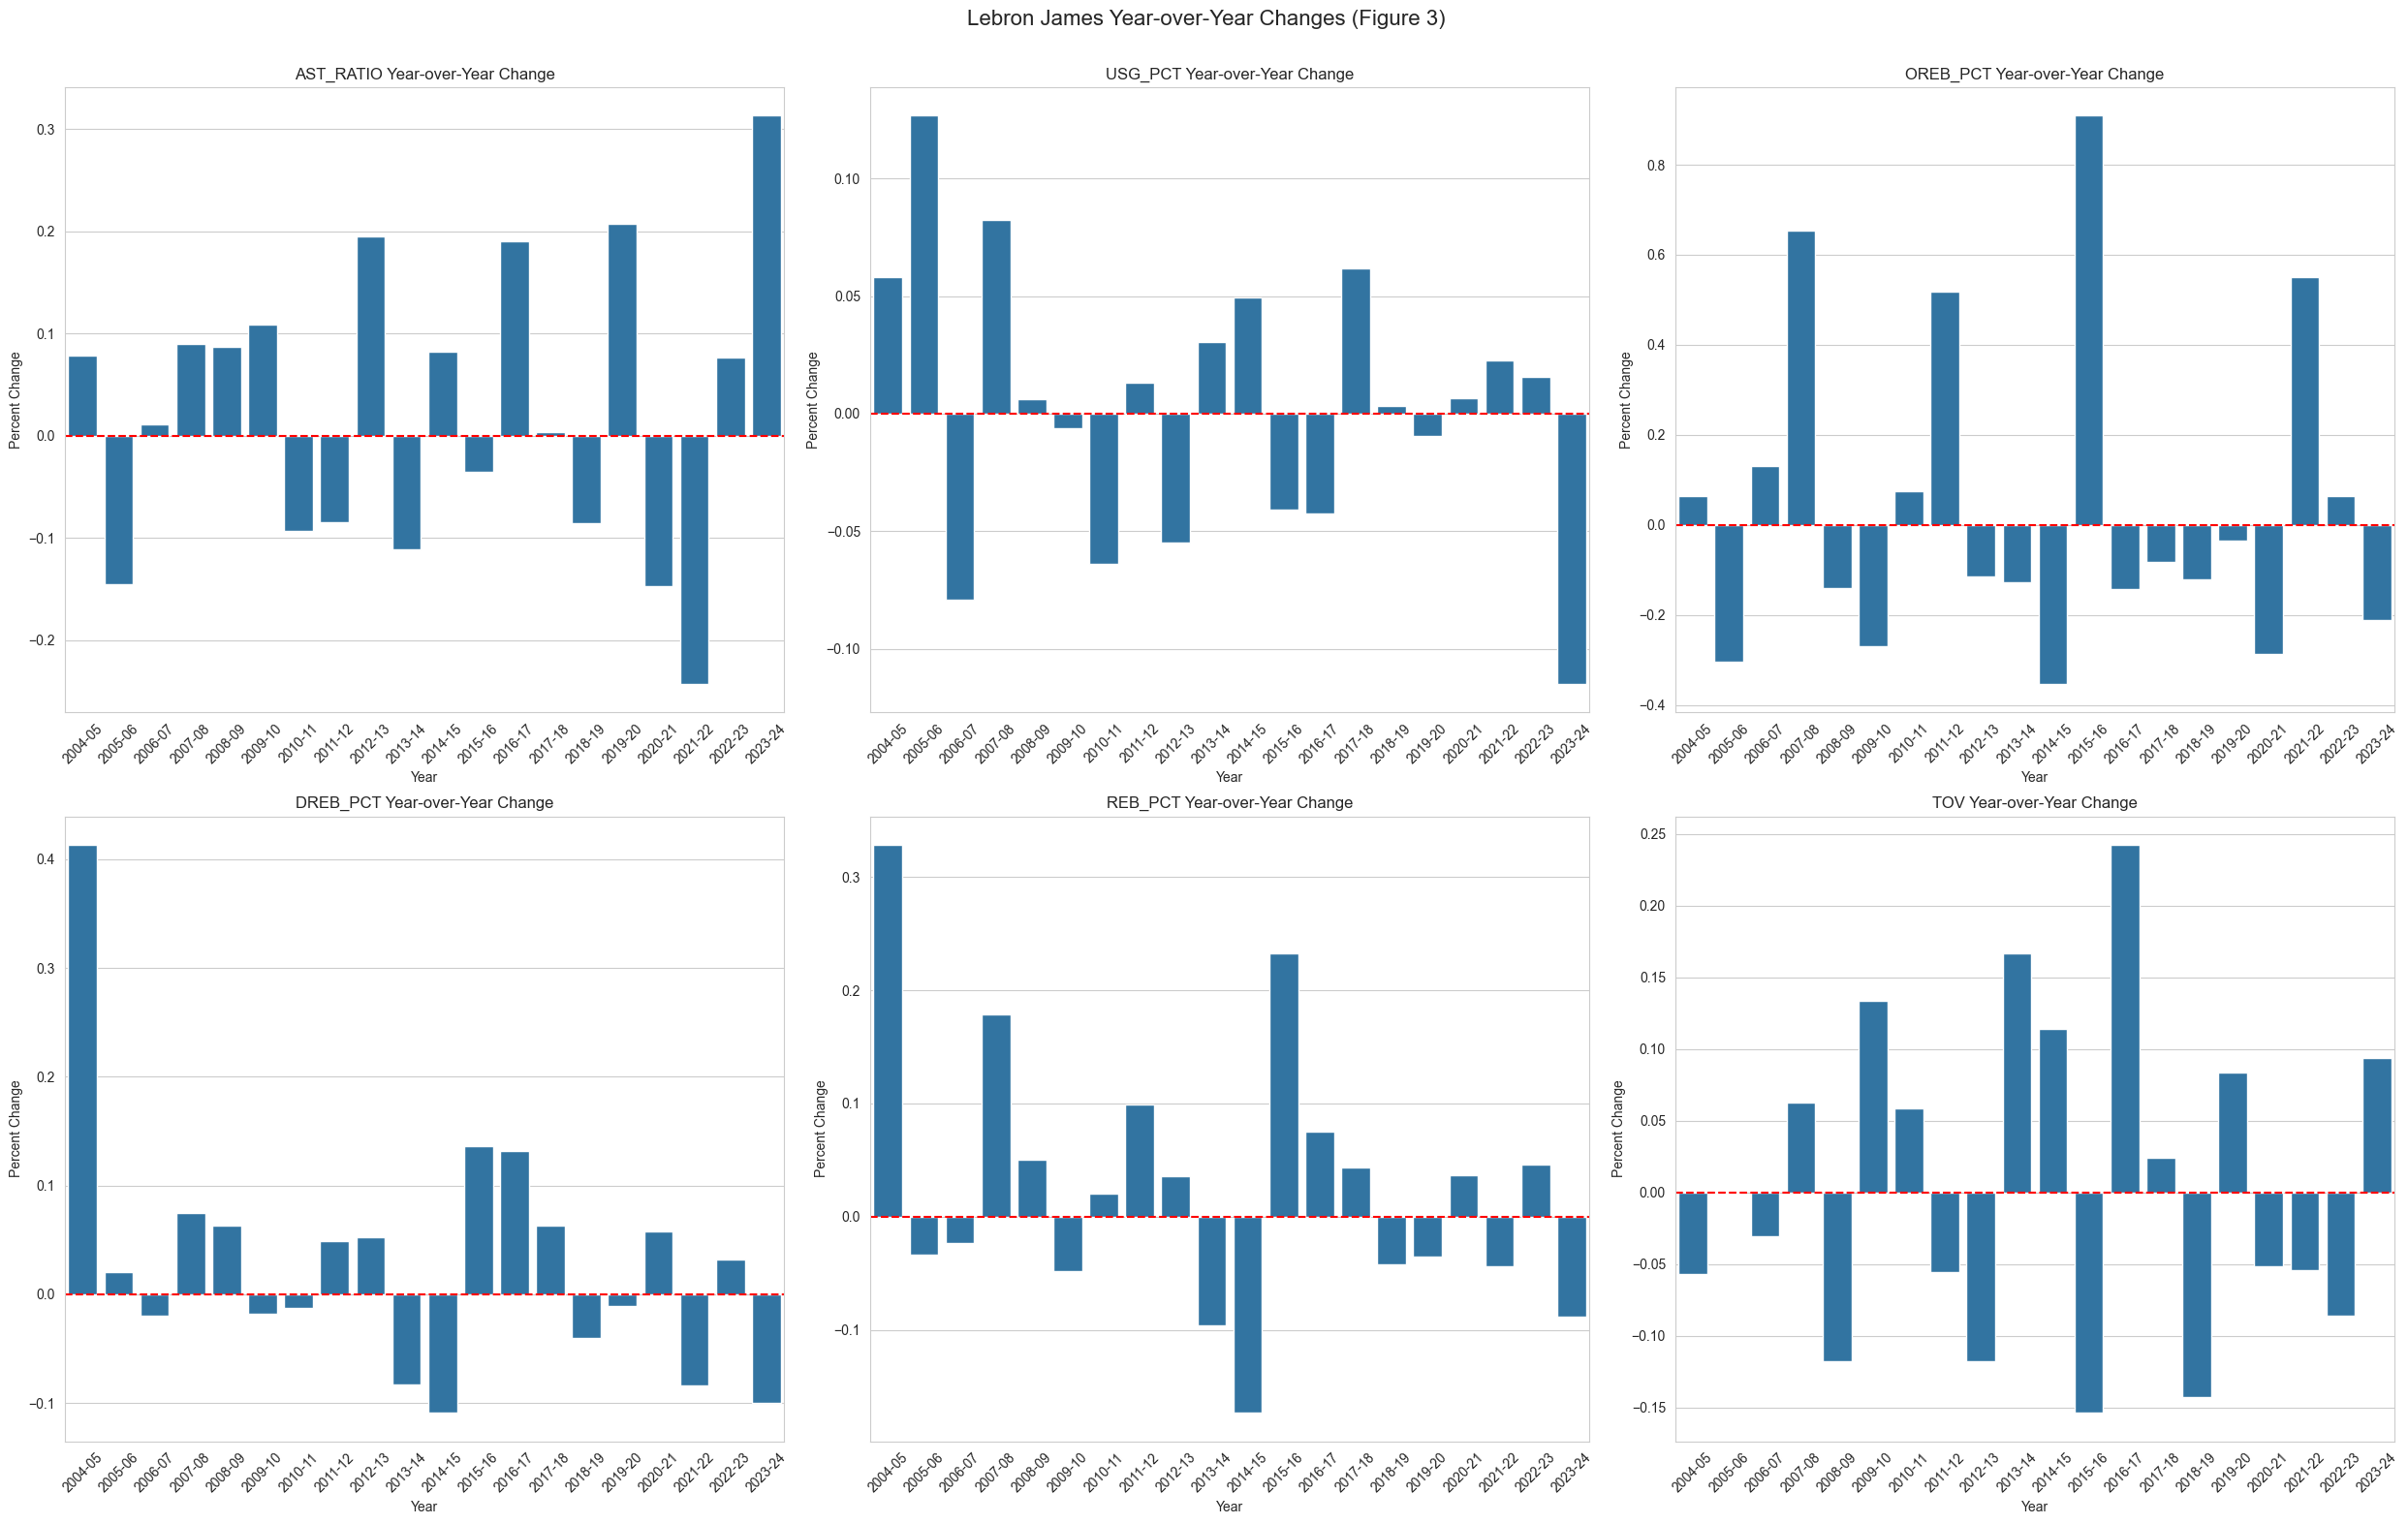

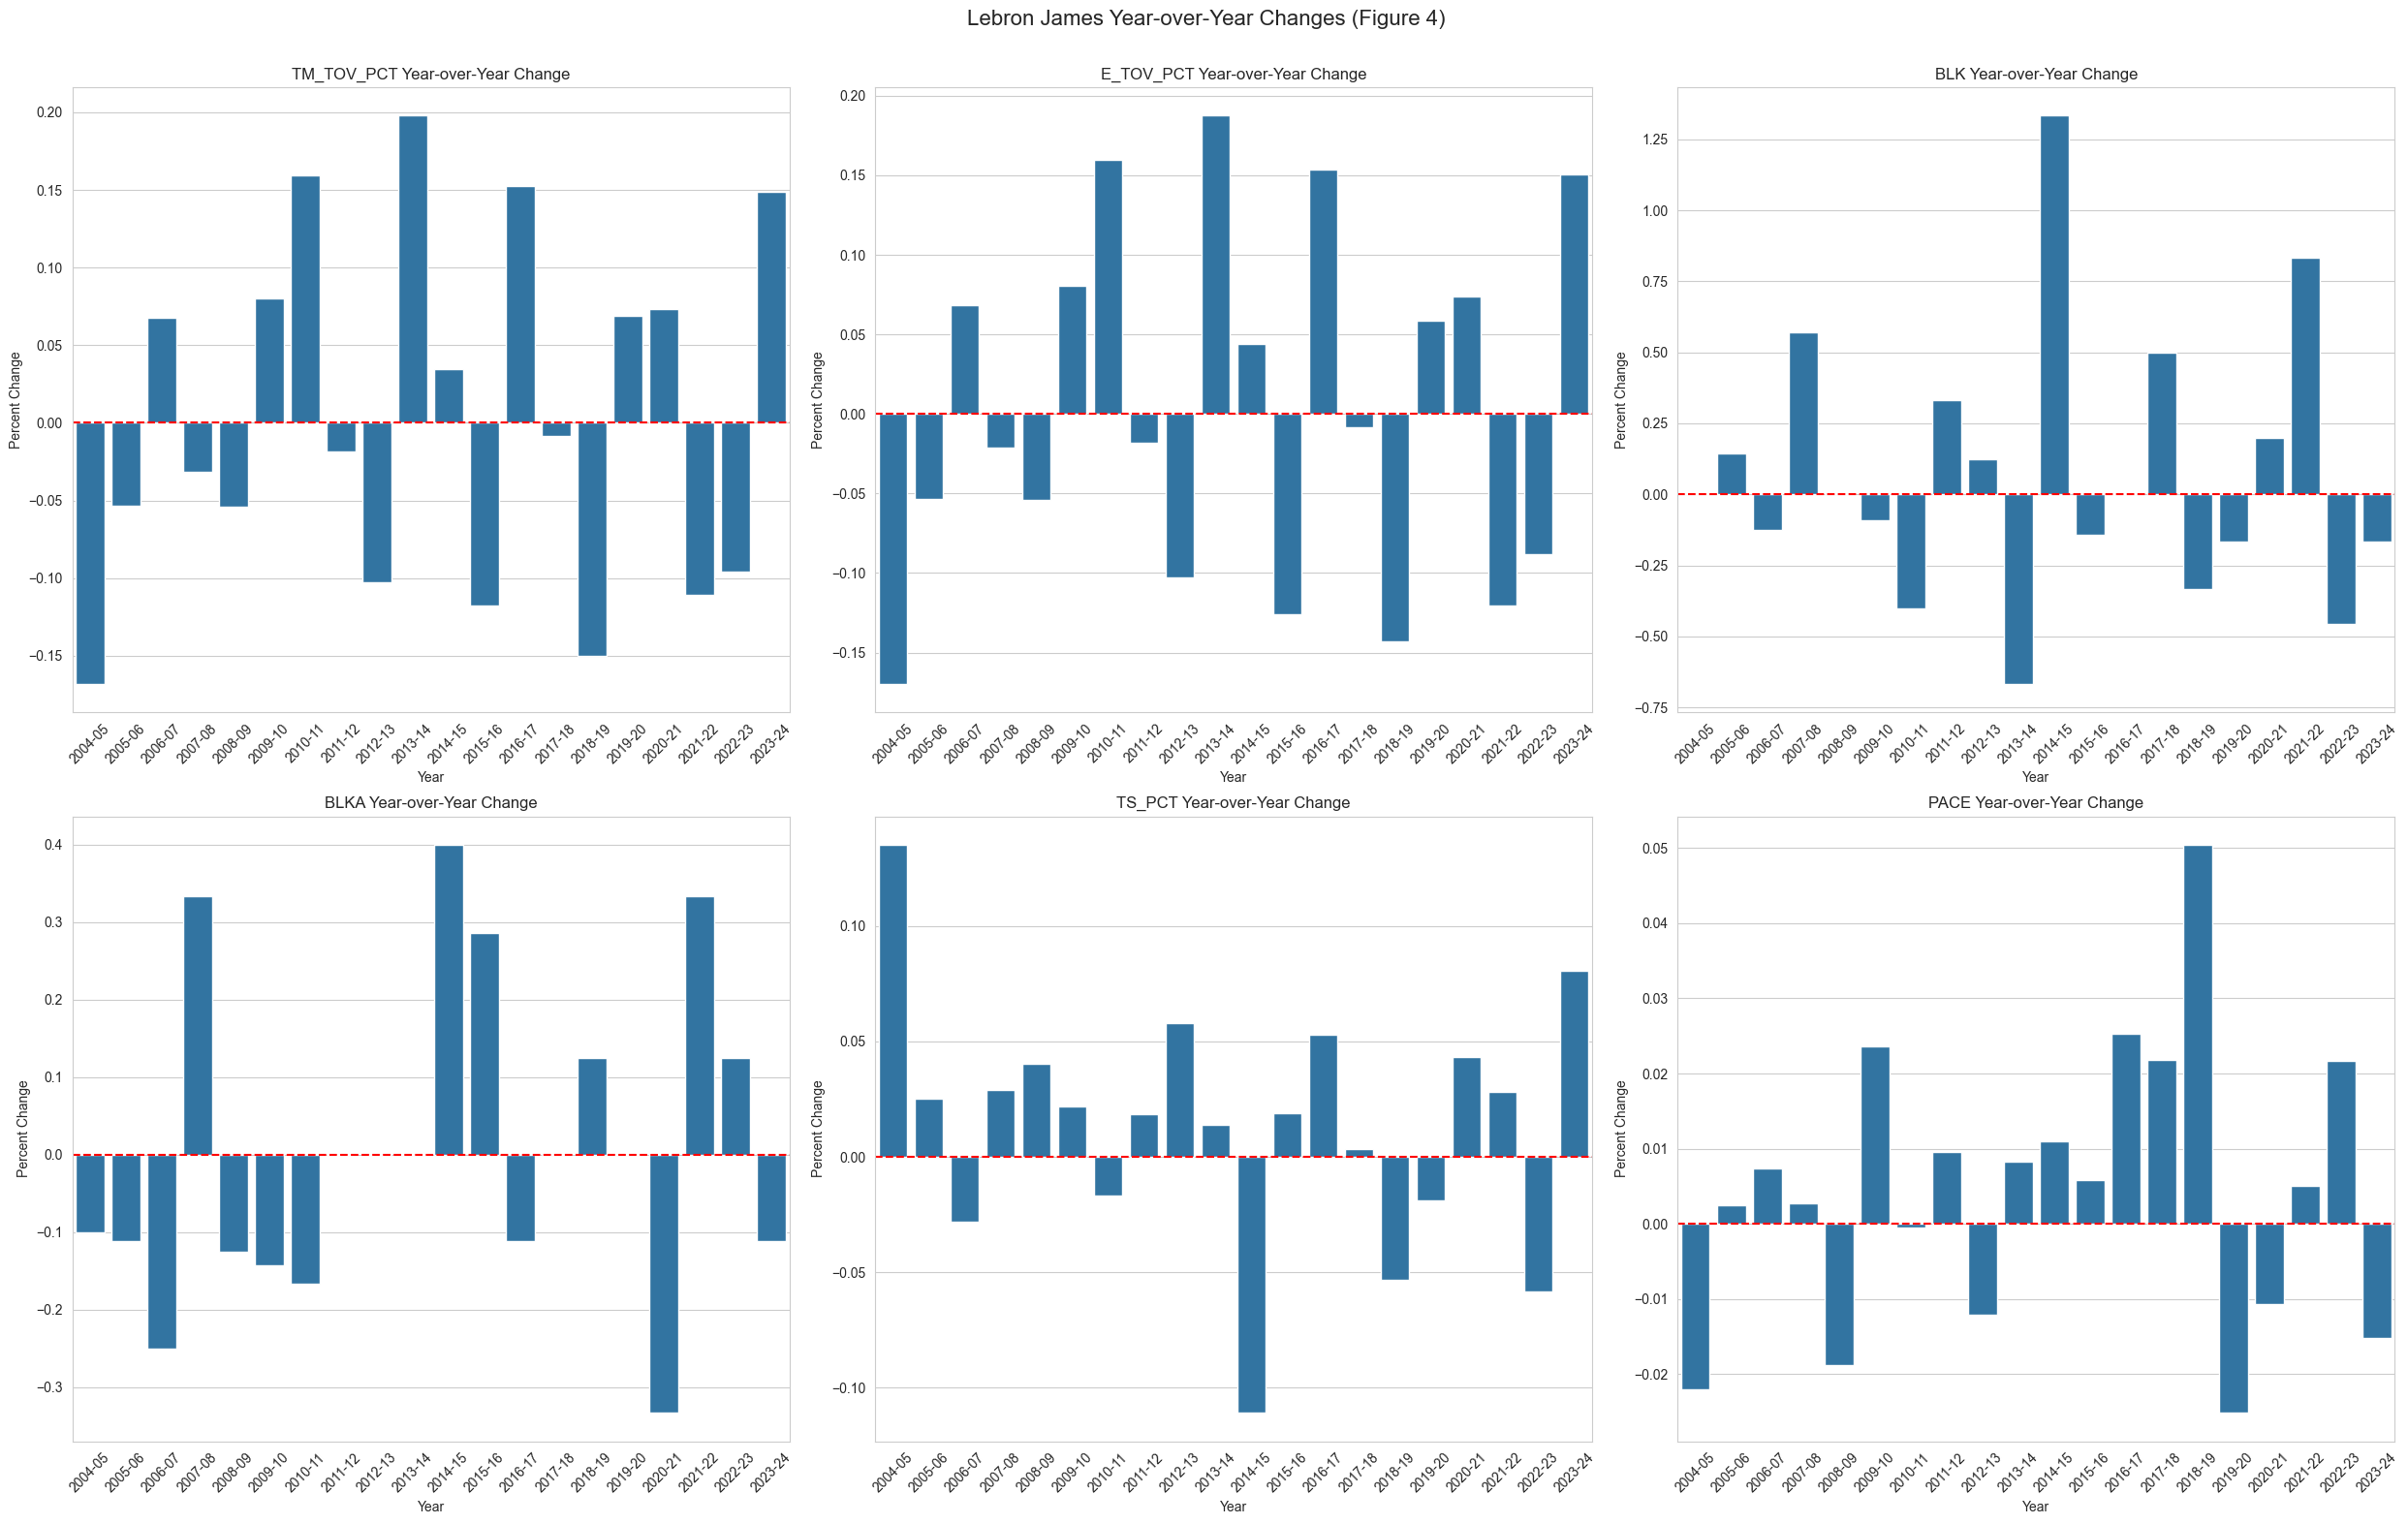

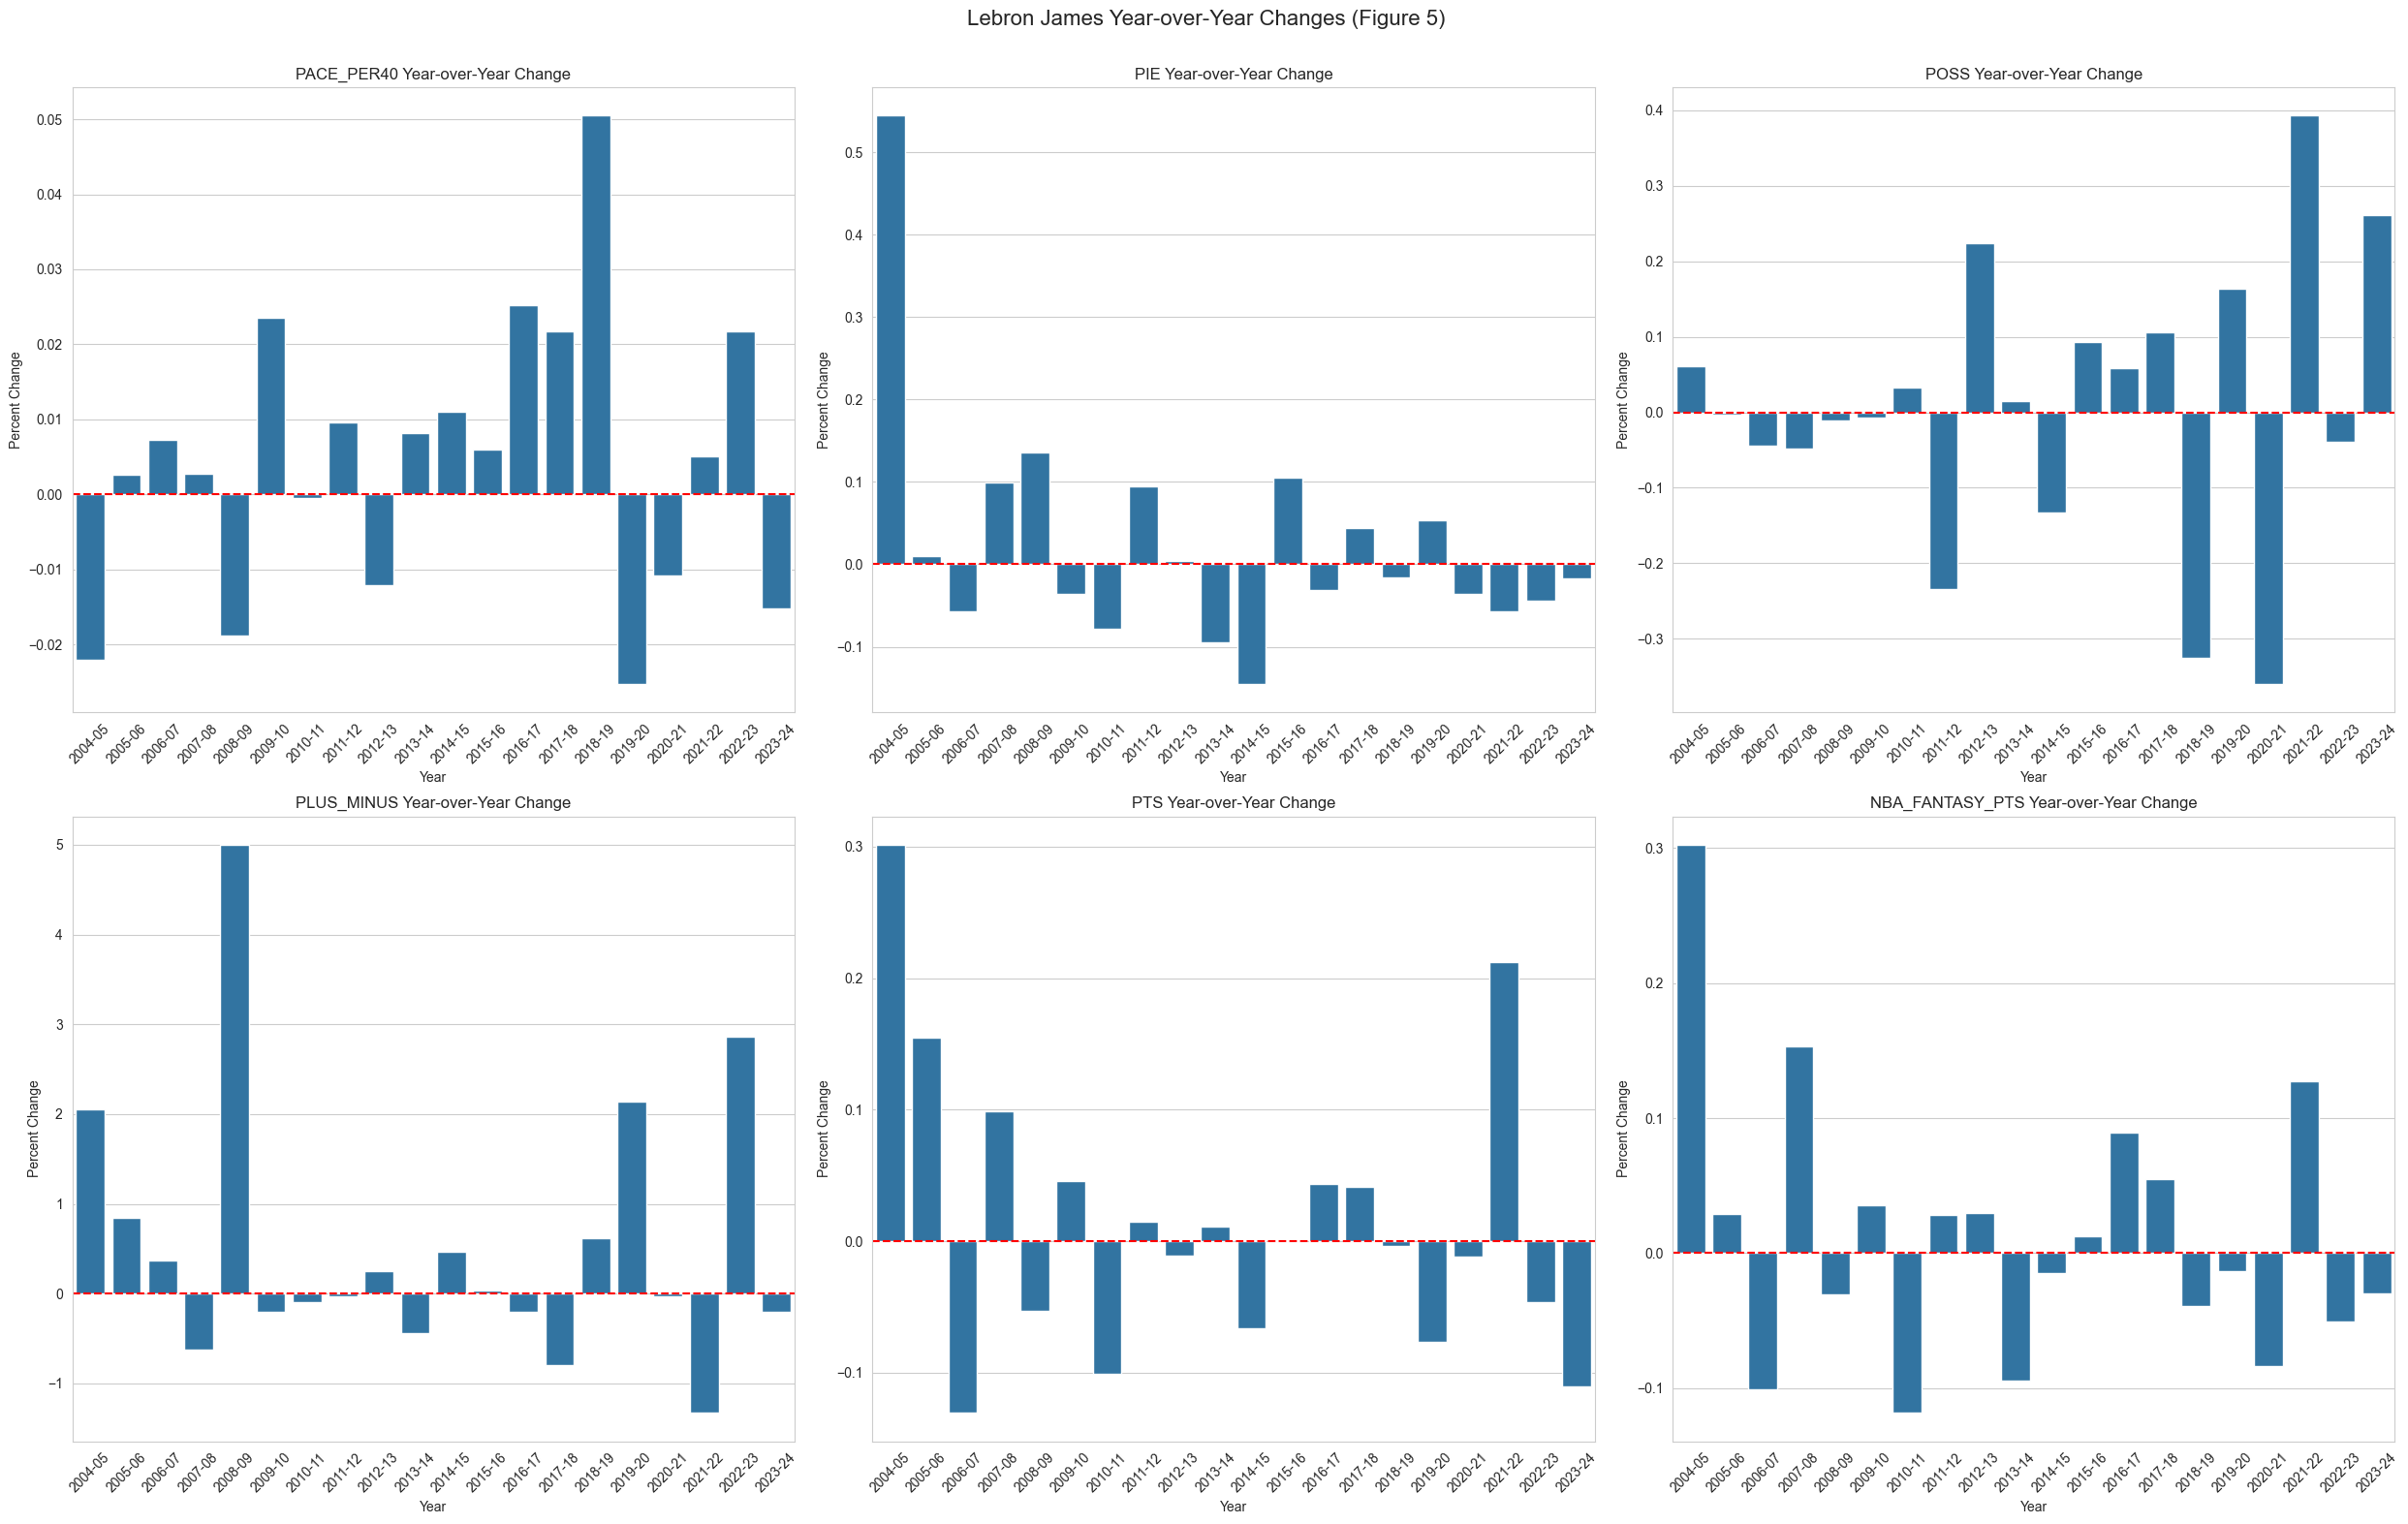

In [4]:
# Year-over-year change plot. Upper bar is improvement and lower bar is decline.
util.plot_metrics(name, full_categories, full_dash, yoy=True)

# Year-over-year analysis
# util.analyze_significant_changes(full_dash, full_categories)

In [5]:
full_dash = util.get_dashboard(util.get_player_id("Lebron James"), yearly=False, seasons=["2019-20", "2020-21", "2021-22"])[2]

full_categories = ["MIN", "FGA", "FGM", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FT_PCT", "OFF_RATING", "DEF_RATING", "AST_PCT", "USG_PCT", "OREB_PCT", "DREB_PCT", "TM_TOV_PCT", "BLK", "BLKA", "TS_PCT", "PACE_PER40", "PIE", "POSS", "PLUS_MINUS", "PTS", "NBA_FANTASY_PTS"]

#util.plot_metrics("Lebron James", full_categories, full_dash, rows=2, cols=2, yearly=False)
# util.plot_metrics("Lebron James", full_categories, full_dash, rows=2, cols=2, yoy=True, yearly=False)


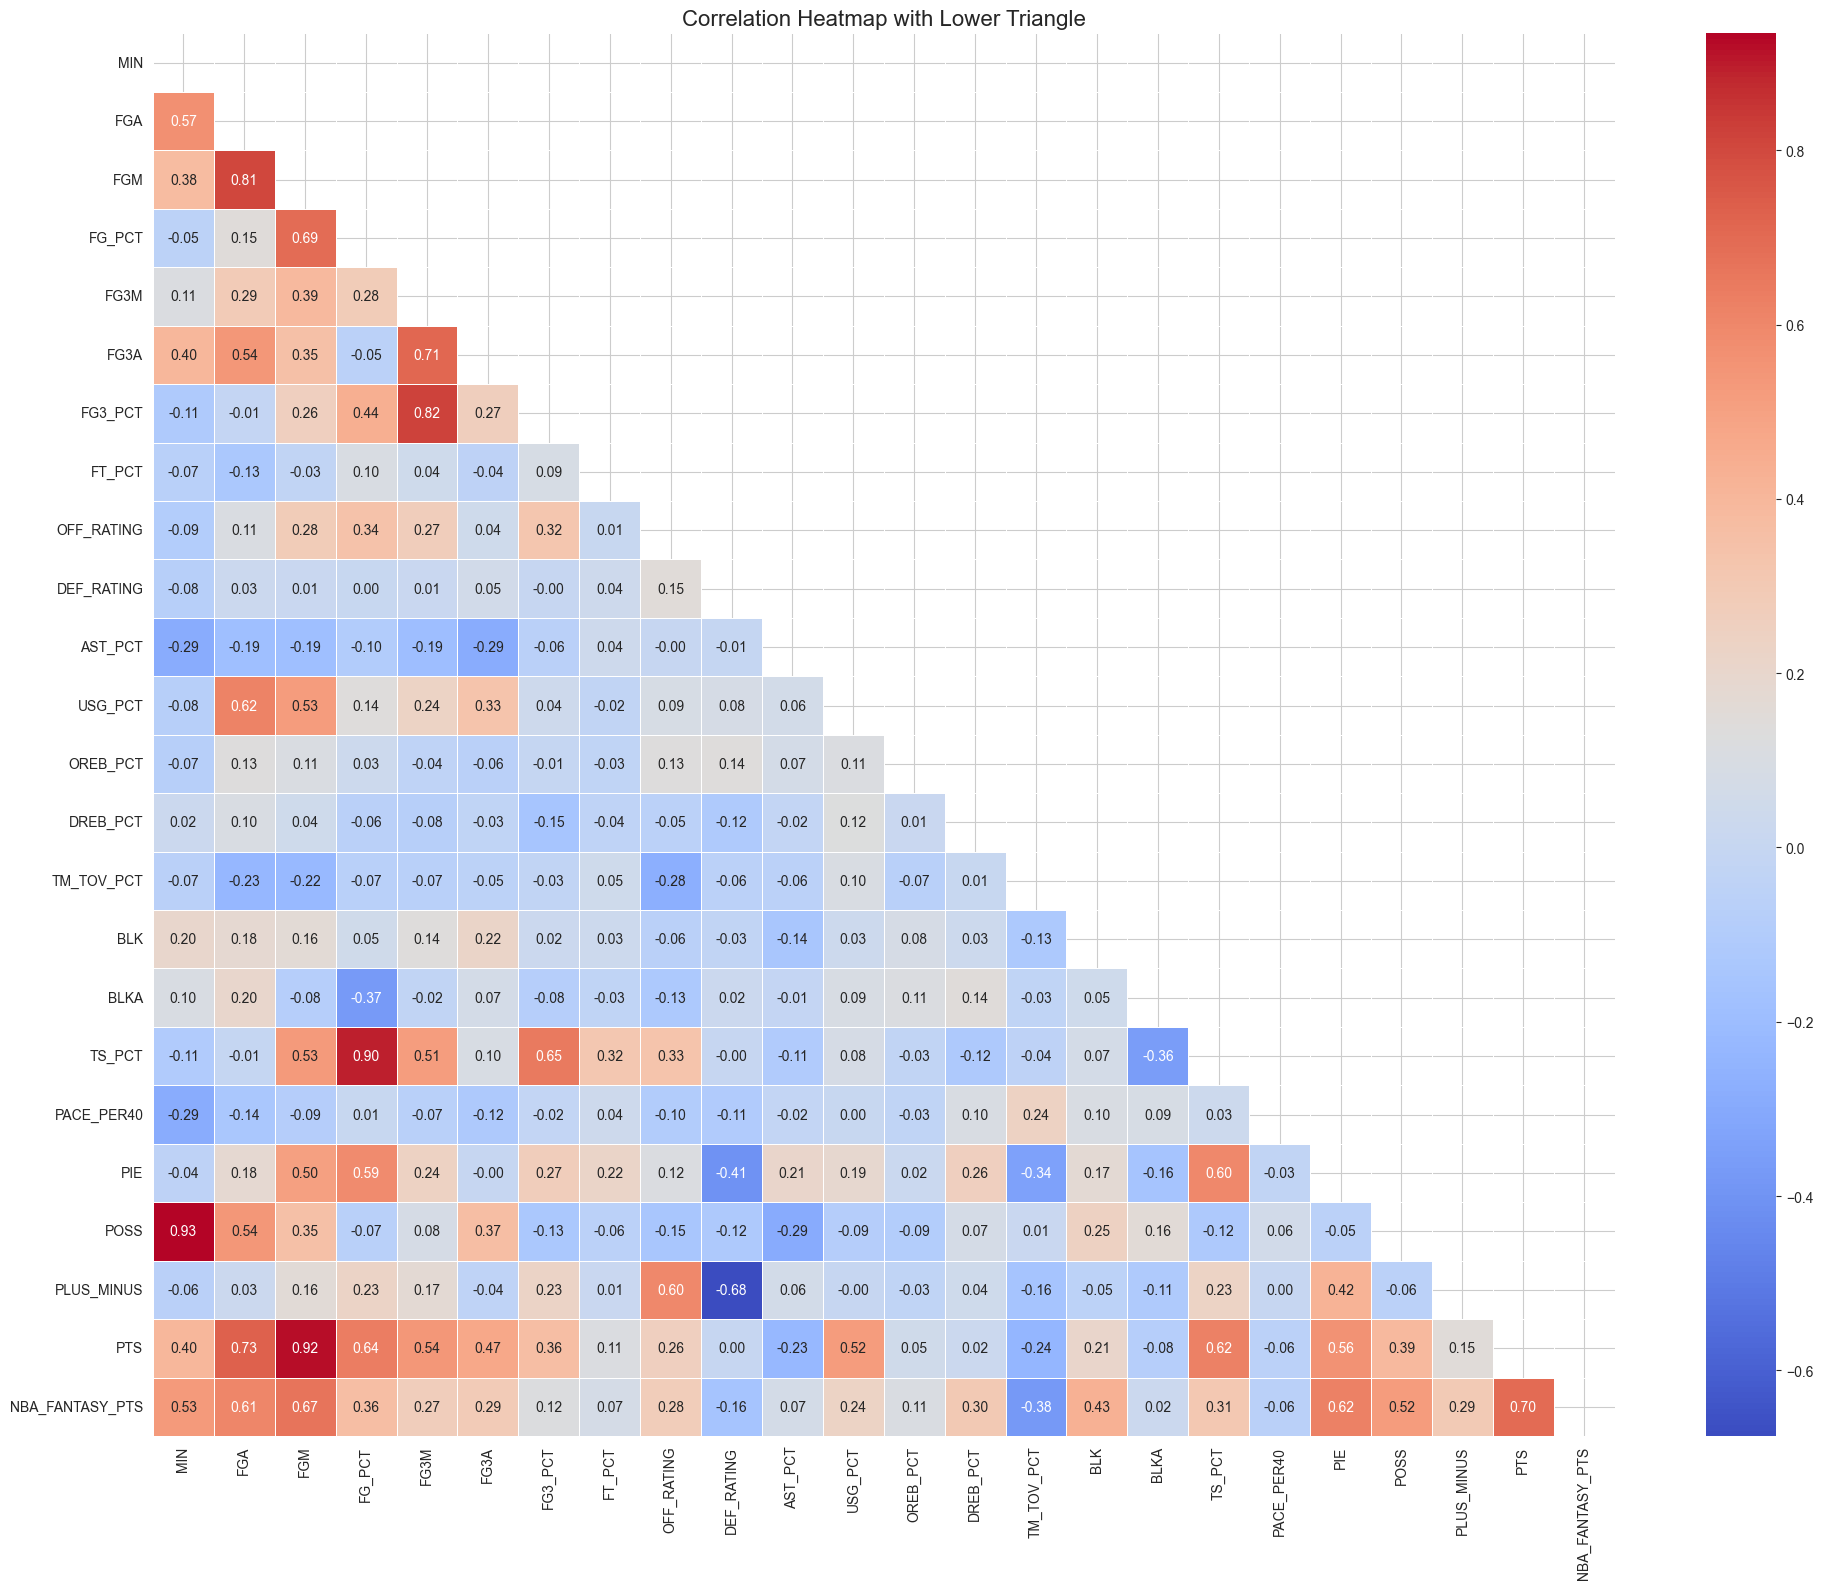

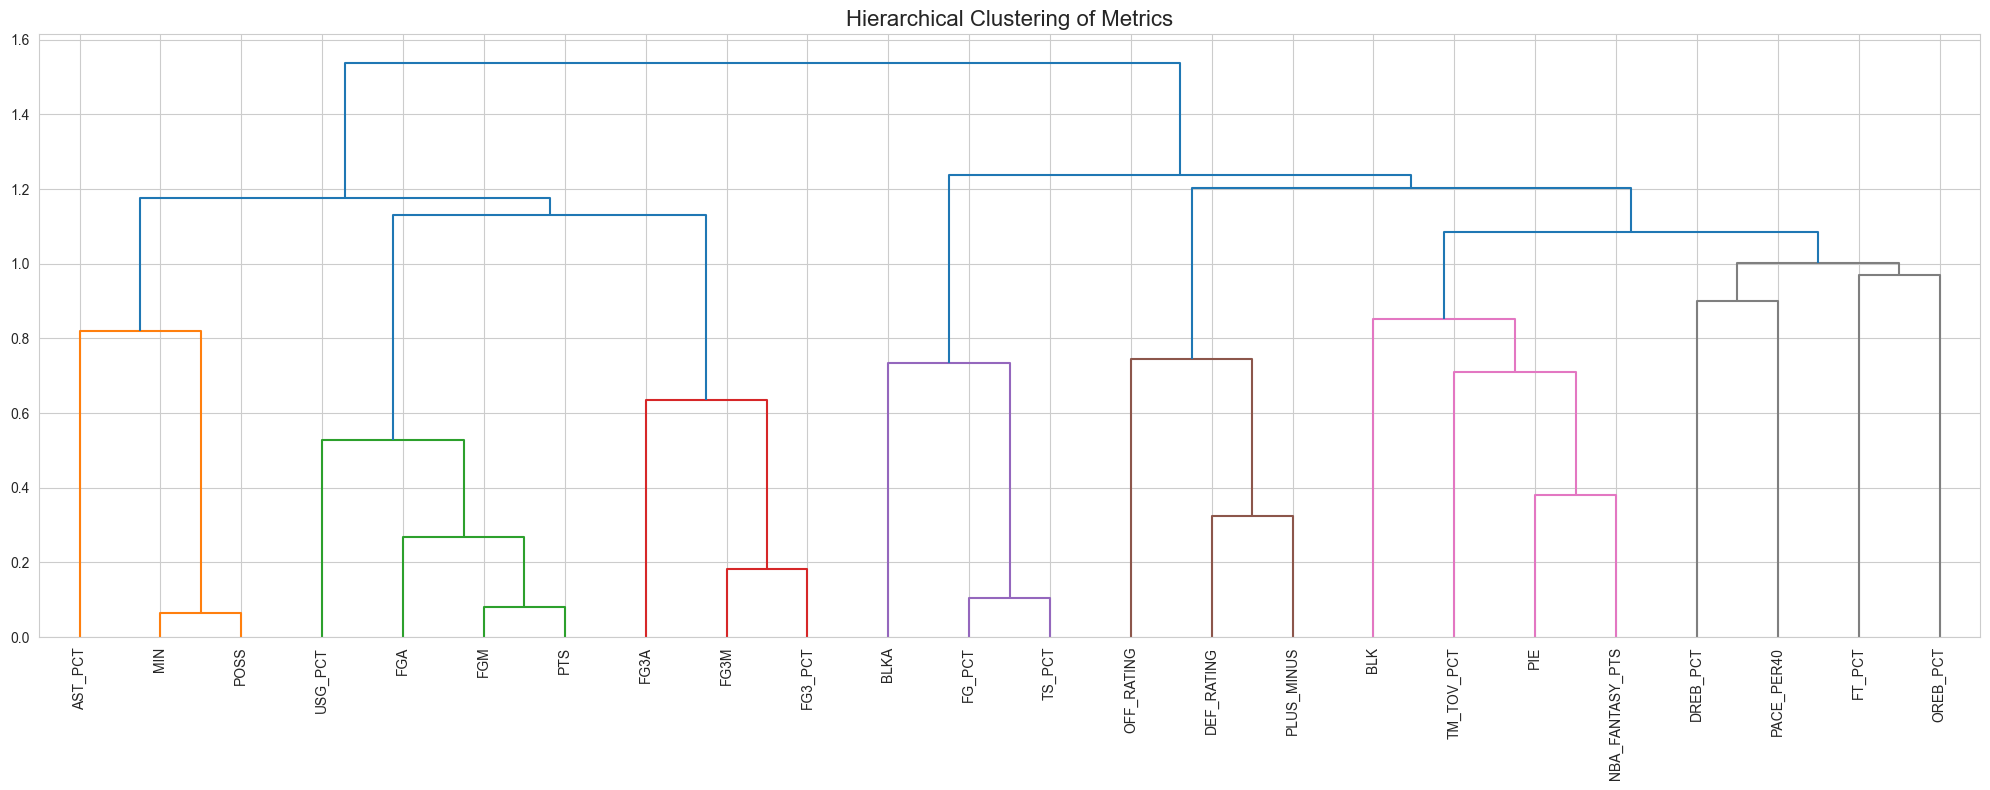

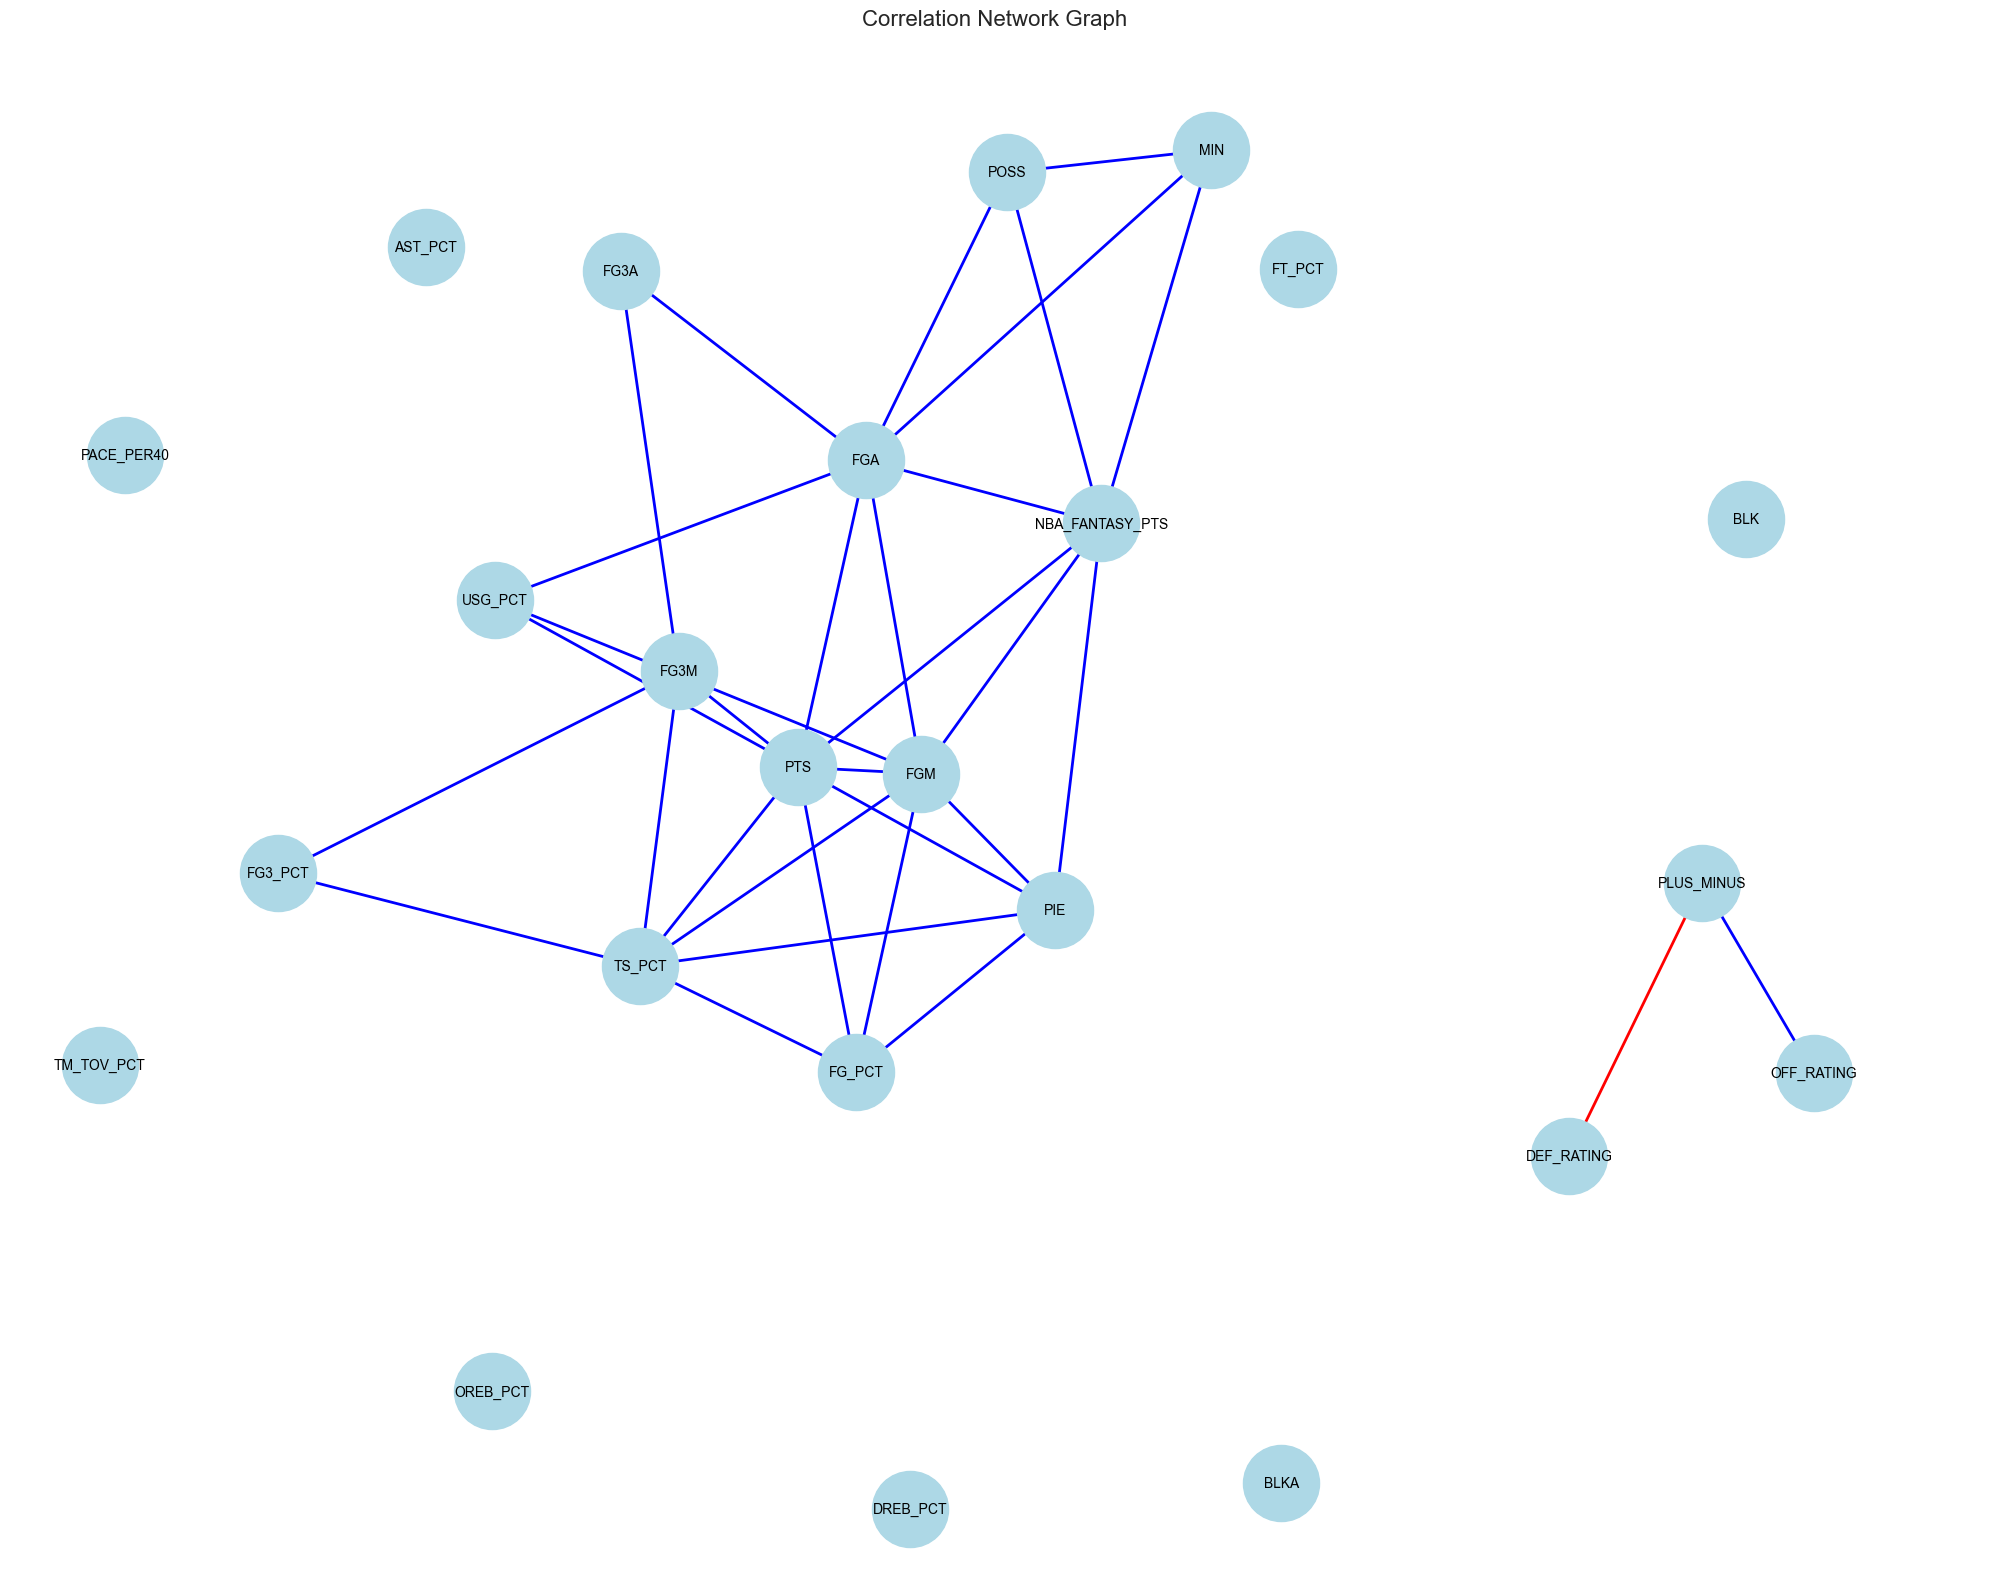

In [6]:
corr_categories = ["MIN", "FG_PCT", "FG3_PCT", "FT_PCT", "OFF_RATING", "DEF_RATING", "AST_PCT", "USG_PCT", "OREB_PCT", "DREB_PCT", "TM_TOV_PCT", "BLK", "BLKA", "TS_PCT", "PACE_PER40", "PIE", "POSS", "PLUS_MINUS", "PTS", "NBA_FANTASY_PTS"]

corr_matrix = util.perform_correlation_analysis(full_dash, full_categories, correlation_threshold=0.5)

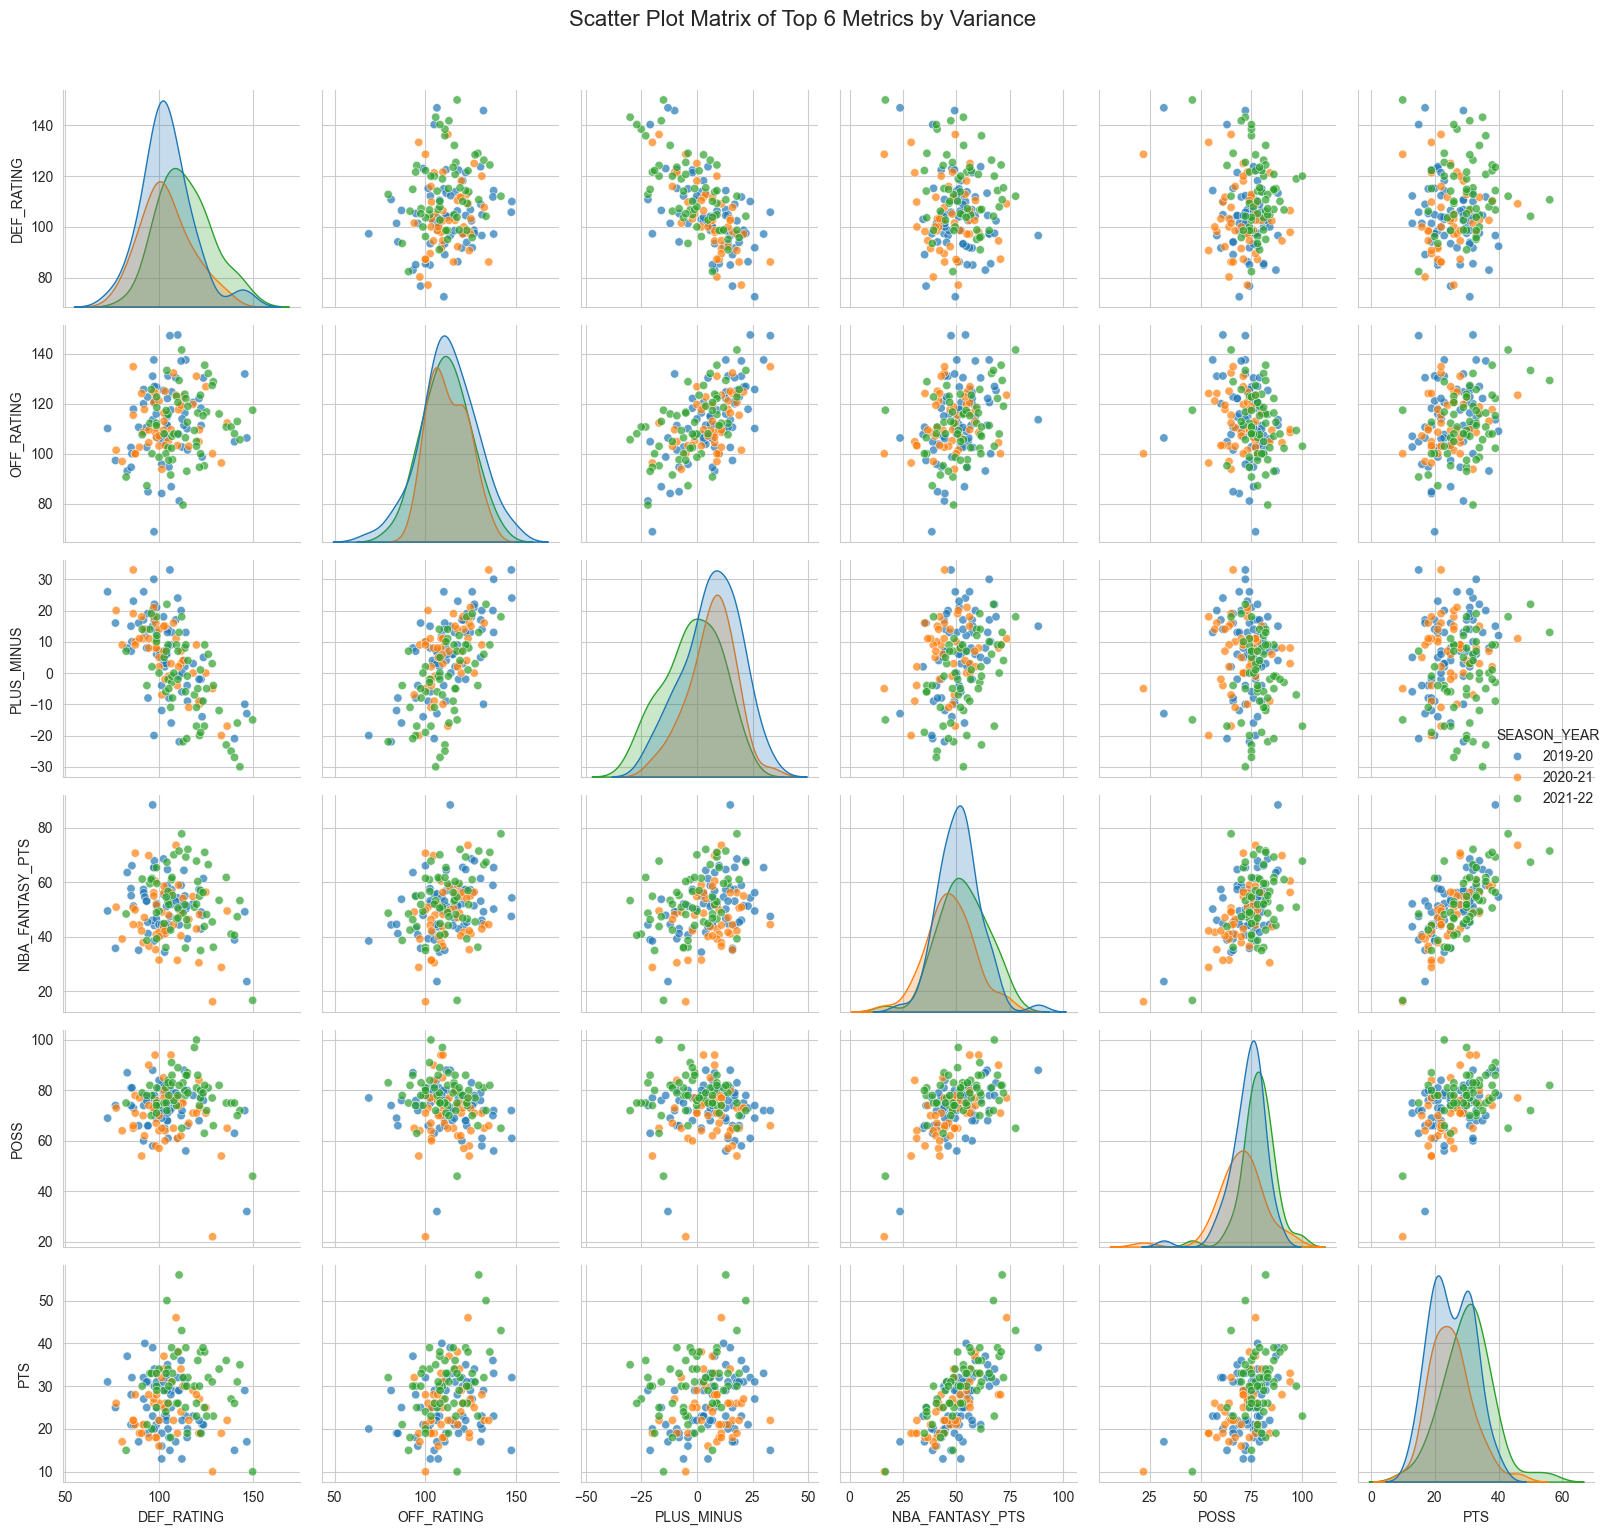

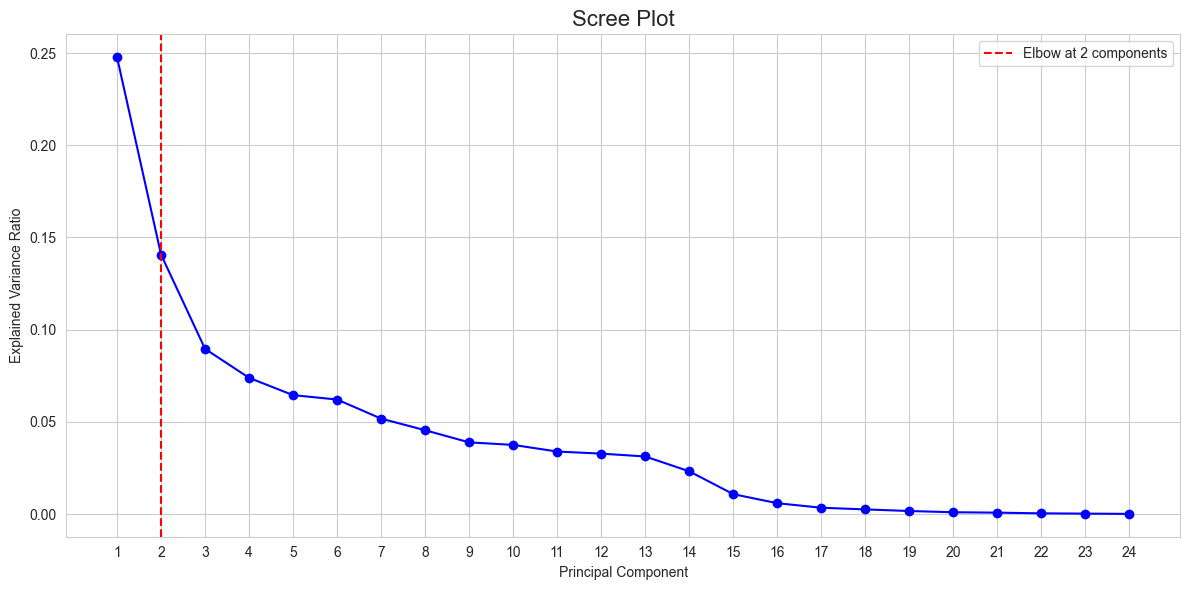

Number of components suggested by the elbow method: 2


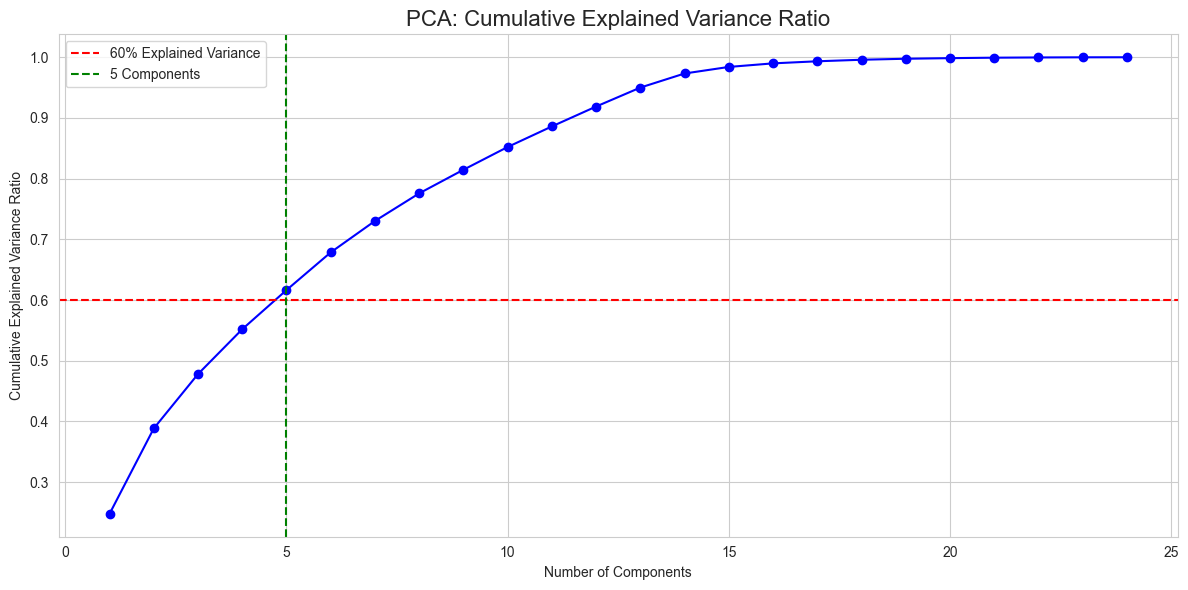


Top contributing features to PC1 (explains 24.78% of variance):
PTS                0.389946
FGM                0.370088
NBA_FANTASY_PTS    0.322173
FGA                0.287547
FG_PCT             0.267815
Name: PC1, dtype: float64

Top contributing features to PC2 (explains 14.07% of variance):
POSS      0.399615
MIN       0.395998
TS_PCT    0.340926
FGA       0.303758
FG_PCT    0.287668
Name: PC2, dtype: float64

Top contributing features to PC3 (explains 8.96% of variance):
DEF_RATING    0.424794
PLUS_MINUS    0.351362
PIE           0.338760
FG3M          0.335329
FG3A          0.292357
Name: PC3, dtype: float64

Top contributing features to PC4 (explains 7.39% of variance):
USG_PCT       0.441984
OREB_PCT      0.374553
DEF_RATING    0.365399
POSS          0.298080
AST_PCT       0.286938
Name: PC4, dtype: float64

Top contributing features to PC5 (explains 6.45% of variance):
OFF_RATING    0.443946
PACE_PER40    0.384707
PLUS_MINUS    0.368752
TM_TOV_PCT    0.358236
FT_PCT        0.2

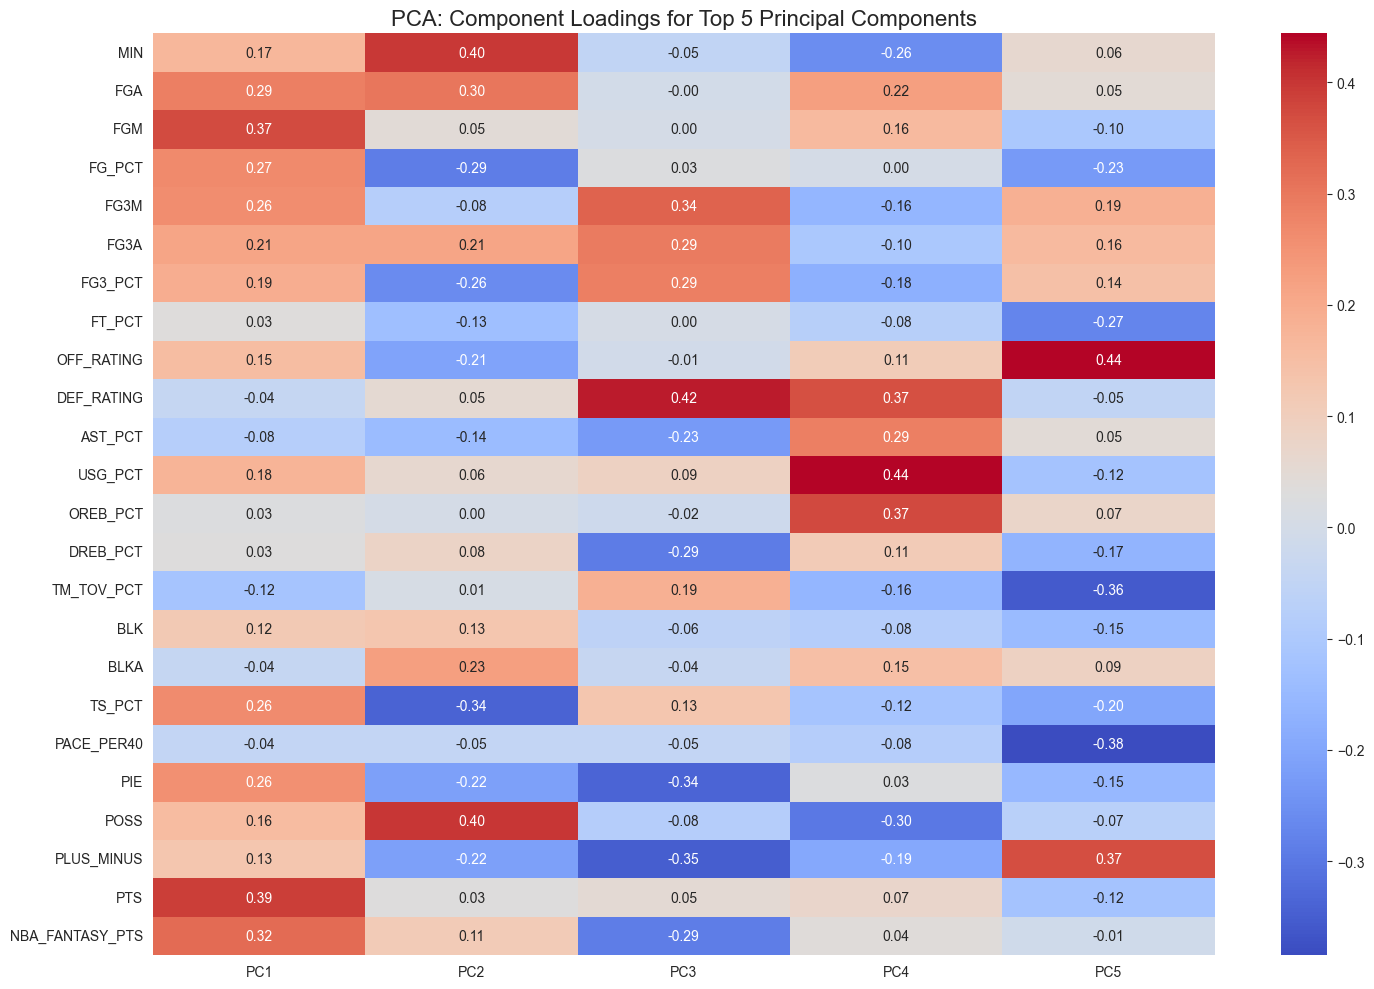

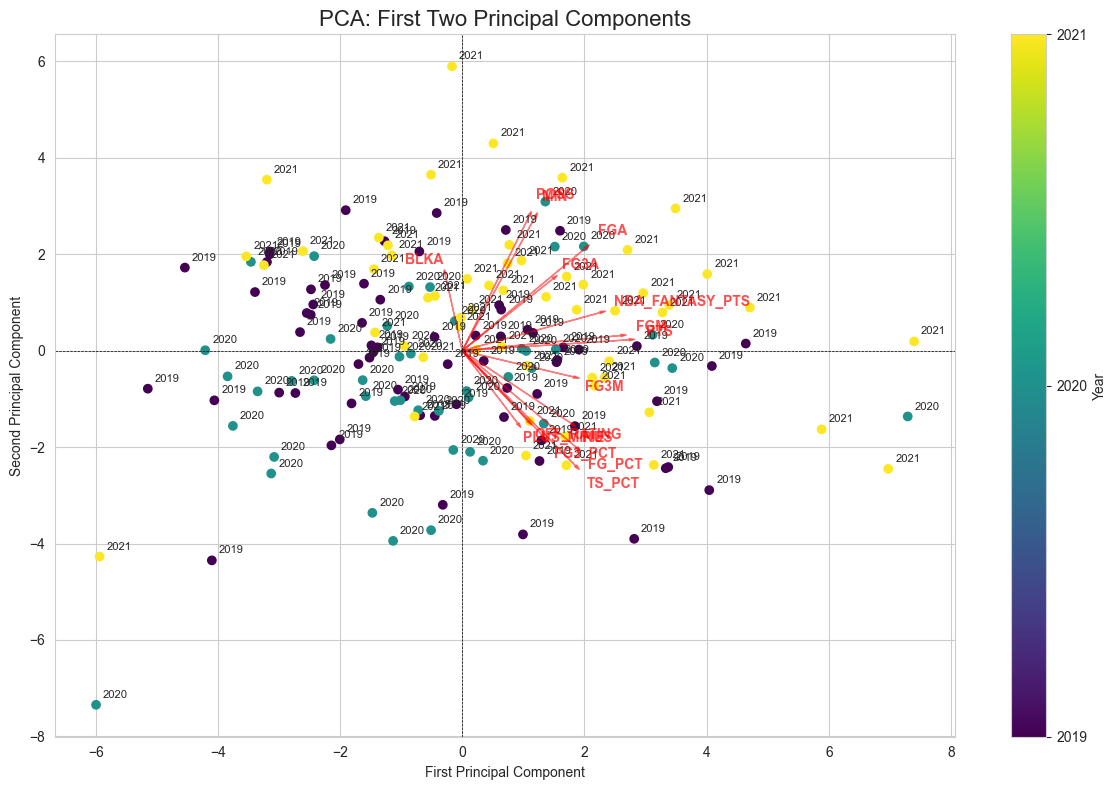

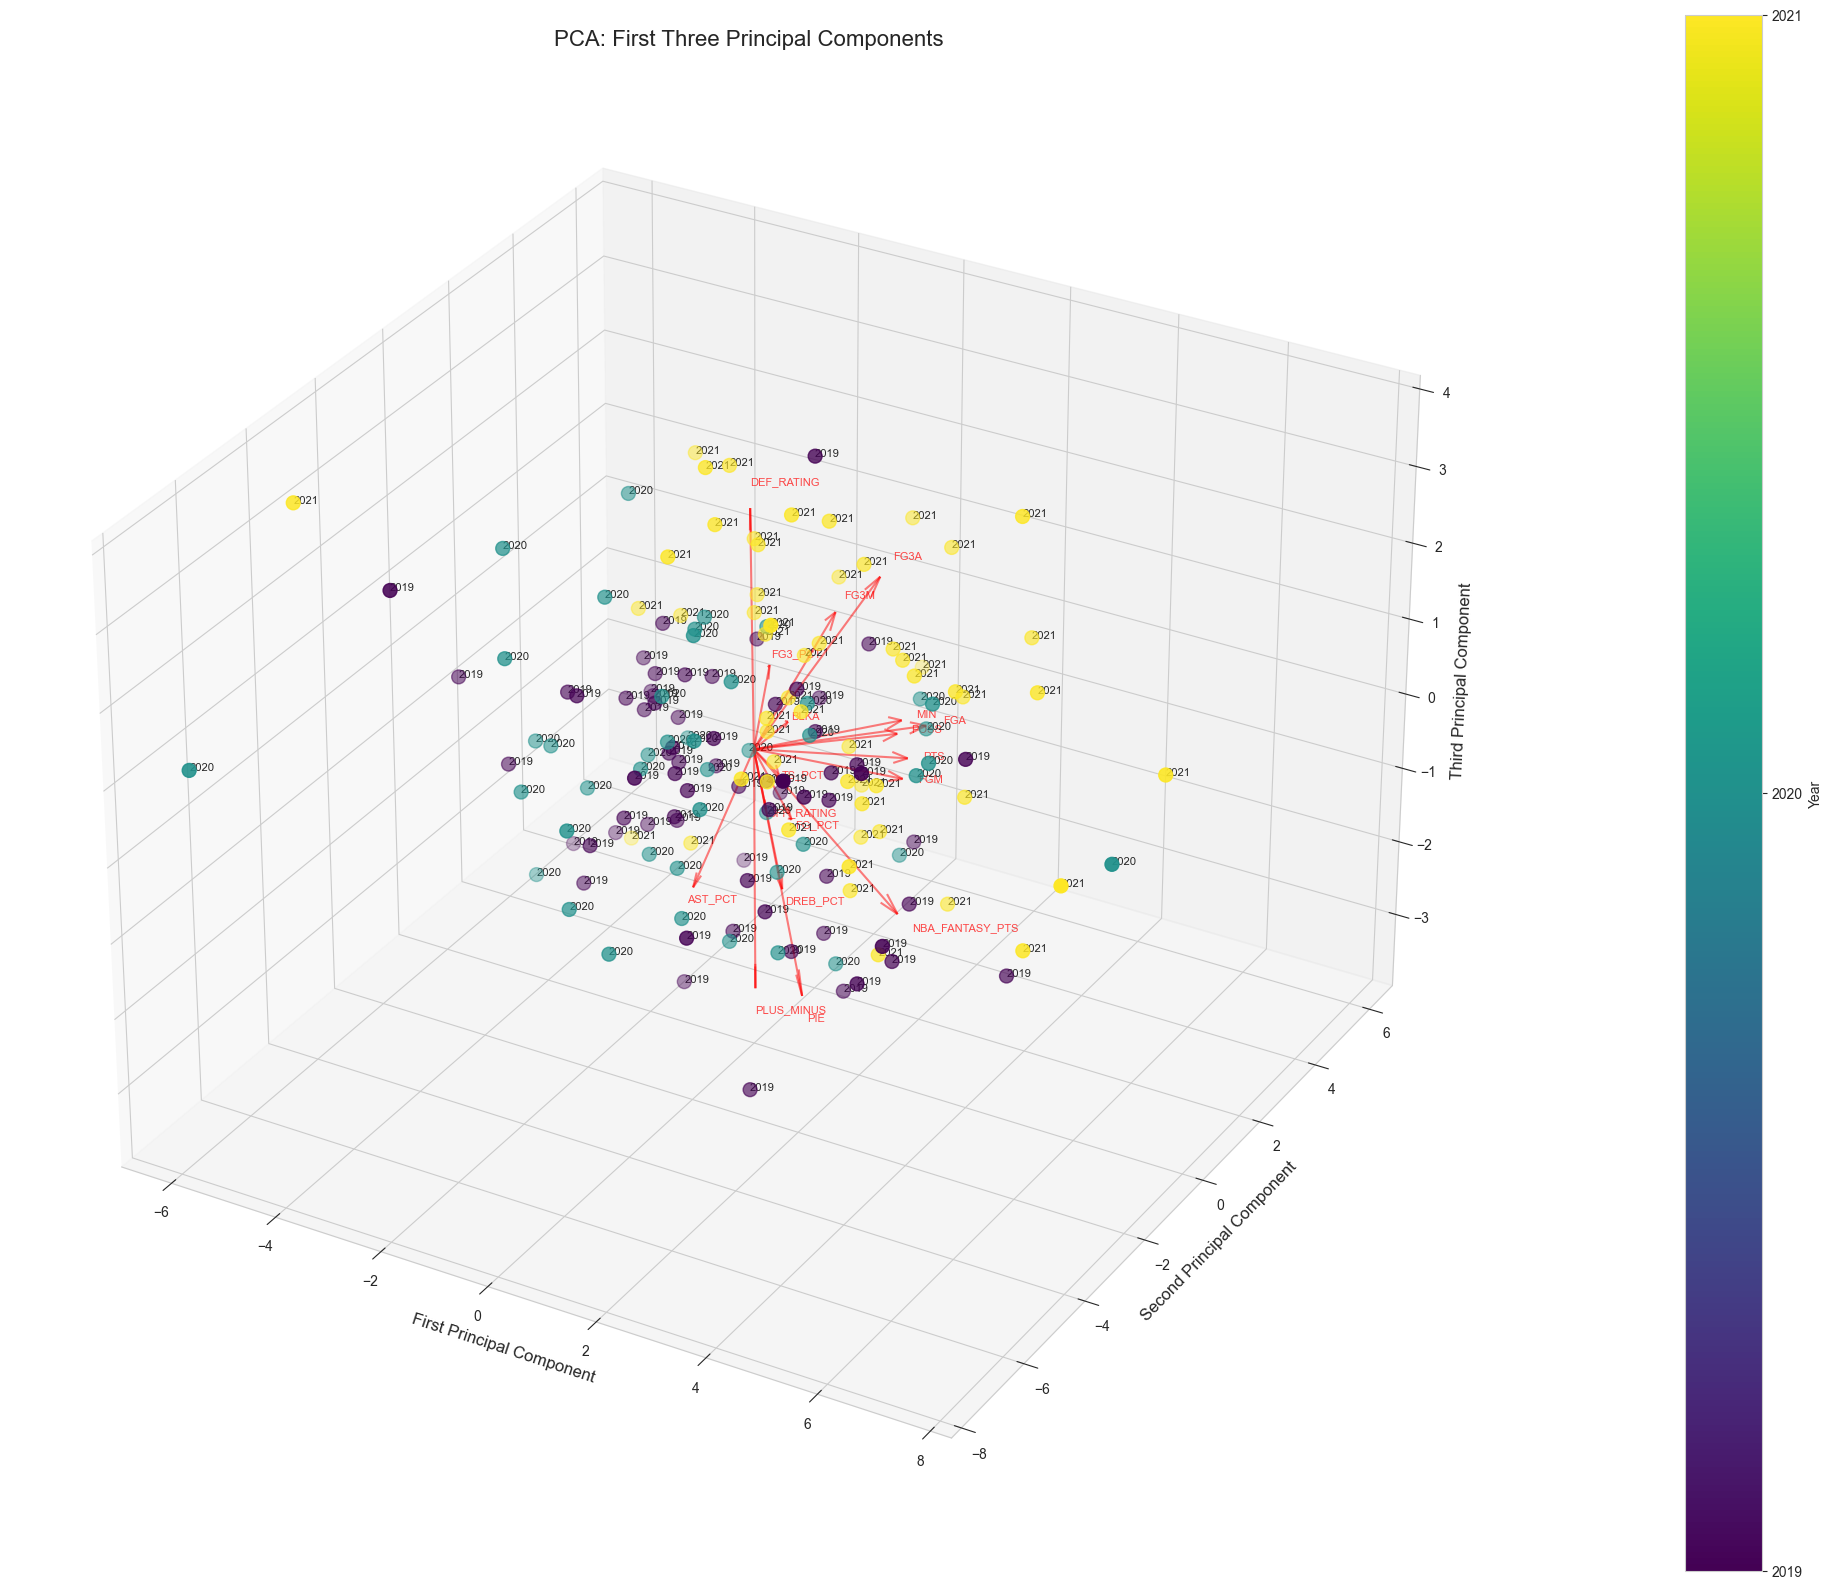


Feature contributions to first two principal components:
                      PC1       PC2
PTS              0.389946  0.032446
FGM              0.370088  0.045053
NBA_FANTASY_PTS  0.322173  0.112995
FGA              0.287547  0.303758
FG_PCT           0.267815  0.287668
TS_PCT           0.264920  0.340926
FG3M             0.260443  0.077783
PIE              0.255075  0.215595
FG3A             0.212131  0.213273
FG3_PCT          0.193897  0.259805
USG_PCT          0.175619  0.059293
MIN              0.170178  0.395998
POSS             0.156655  0.399615
OFF_RATING       0.153816  0.208368
PLUS_MINUS       0.129692  0.215272
TM_TOV_PCT       0.118166  0.008361
BLK              0.118055  0.127225
AST_PCT          0.079872  0.144051
PACE_PER40       0.044856  0.047877
DEF_RATING       0.040222  0.052876
BLKA             0.040049  0.226326
FT_PCT           0.034987  0.133747
DREB_PCT         0.029796  0.079950
OREB_PCT         0.025591  0.001458


In [11]:
# Principal Component Analysis

eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
top_metrics = full_dash[full_categories].var().nlargest(6).index
sns.pairplot(full_dash[list(top_metrics) + ["SEASON_YEAR"]], height=2.5, hue="SEASON_YEAR", plot_kws={"alpha":0.7})
plt.suptitle('Scatter Plot Matrix of Top 6 Metrics by Variance', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_dash[full_categories])

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find number of components needed to explain at least 60% of variance
n_components_60 = np.argmax(cumulative_variance_ratio >= 0.60) + 1

# Create scree plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot', fontsize=16)
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure all components are labeled on x-axis

# Add elbow line
def find_elbow(y):
    diff = np.diff(y, 2)
    return np.argmax(diff) + 2  # +2 because of double diff and 1-indexing

elbow = find_elbow(pca.explained_variance_ratio_)
plt.axvline(x=elbow, color='r', linestyle='--', label=f'Elbow at {elbow} components')

plt.legend()
plt.tight_layout()
plt.show()
print(f"Number of components suggested by the elbow method: {elbow}")

# Plot cumulative explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.axhline(y=0.60, color='r', linestyle='--', label='60% Explained Variance')
plt.axvline(x=n_components_60, color='g', linestyle='--',
            label=f'{n_components_60} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

# Create DataFrame of component loadings
component_df = pd.DataFrame(
    pca.components_.T[:, :n_components_60],
    columns=[f'PC{i+1}' for i in range(n_components_60)],
    index=full_categories
)

# Print the loadings for each principal component
for i in range(n_components_60):
    print(f"\nTop contributing features to PC{i+1} (explains {pca.explained_variance_ratio_[i]*100:.2f}% of variance):")
    print(component_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(5))

# Heatmap of component loadings
plt.figure(figsize=(15, 10))
sns.heatmap(component_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'PCA: Component Loadings for Top {n_components_60} Principal Components', fontsize=16)
plt.tight_layout()
plt.show()

full_dash['Year'] = full_dash['SEASON_YEAR'].apply(lambda x: int(x.split('-')[0]))

years = full_dash['Year'].unique()
year_to_color = {year: i for i, year in enumerate(sorted(years))}
colors = [year_to_color[year] for year in full_dash['Year']]

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components', fontsize=16)

cbar = plt.colorbar(scatter, label='Year')
cbar.set_ticks(range(len(years)))
cbar.set_ticklabels(sorted(years))

for i, txt in enumerate(full_dash['Year']):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]), fontsize=8,
                 xytext=(5, 5), textcoords='offset points')

# Add scaled loading lines
loading_scale = 7  # Adjust this to change the length of loading lines
loading_threshold = 0.2  # Adjust this to filter out less significant loadings

for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    if np.abs(x) > loading_threshold or np.abs(y) > loading_threshold:
        plt.arrow(0, 0, x * loading_scale, y * loading_scale, color='r', alpha=0.5, head_width=0.05, head_length=0.1)

        # Adjust text position based on the quadrant
        if x > 0 and y > 0:
            ha, va = 'left', 'bottom'
        elif x > 0 > y:
            ha, va = 'left', 'top'
        elif x < 0 < y:
            ha, va = 'right', 'bottom'
        else:
            ha, va = 'right', 'top'

        plt.text(x * loading_scale * 1.1, y * loading_scale * 1.1, full_categories[i],
                 color='r', ha=ha, va=va, alpha=0.7, fontweight='bold')

plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Create the 3D scatter plot
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                     c=colors, cmap='viridis', s=100)

ax.set_xlabel('First Principal Component', fontsize=12)
ax.set_ylabel('Second Principal Component', fontsize=12)
ax.set_zlabel('Third Principal Component', fontsize=12)
ax.set_title('PCA: First Three Principal Components', fontsize=16)

# Create a custom colorbar
cbar = fig.colorbar(scatter, label='Year', pad=0.1)
cbar.set_ticks(range(len(years)))
cbar.set_ticklabels(sorted(years))

# Add loading vectors
loading_scale = 7  # Adjust this to change the length of loading lines
loading_threshold = 0.2  # Adjust this to filter out less significant loadings

for i, (x, y, z) in enumerate(zip(pca.components_[0], pca.components_[1], pca.components_[2])):
    if np.abs(x) > loading_threshold or np.abs(y) > loading_threshold or np.abs(z) > loading_threshold:
        ax.quiver(0, 0, 0, x * loading_scale, y * loading_scale, z * loading_scale,
                  color='r', alpha=0.5, arrow_length_ratio=0.1)
        ax.text(x * loading_scale * 1.1, y * loading_scale * 1.1, z * loading_scale * 1.1,
                full_categories[i], color='r', fontsize=8, alpha=0.7)

for i, txt in enumerate(full_dash['Year']):
    ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], txt, fontsize=8)

plt.tight_layout()
plt.show()


# Print feature contributions to the first two principal components
component_df = pd.DataFrame(pca.components_.T[:,:2], columns=['PC1', 'PC2'], index=full_categories)
print("\nFeature contributions to first two principal components:")
print(component_df.abs().sort_values(by='PC1', ascending=False))

In [8]:
Luka = util.get_dashboard(util.get_player_id("Luka Doncic"), yearly=False, seasons=["2020-21", "2021-22", "2022-23"])
Luka[2]

SEASON_YEAR  PLAYER_ID  PLAYER_NAME NICKNAME     TEAM_ID  \
0       2020-21    1629029  Luka Dončić     Luka  1610612742   
1       2020-21    1629029  Luka Dončić     Luka  1610612742   
2       2020-21    1629029  Luka Dončić     Luka  1610612742   
3       2020-21    1629029  Luka Dončić     Luka  1610612742   
4       2020-21    1629029  Luka Dončić     Luka  1610612742   
..          ...        ...          ...      ...         ...   
192     2022-23    1629029  Luka Dončić     Luka  1610612742   
193     2022-23    1629029  Luka Dončić     Luka  1610612742   
194     2022-23    1629029  Luka Dončić     Luka  1610612742   
195     2022-23    1629029  Luka Dončić     Luka  1610612742   
196     2022-23    1629029  Luka Dončić     Luka  1610612742   

    TEAM_ABBREVIATION         TEAM_NAME     GAME_ID            GAME_DATE  \
0                 DAL  Dallas Mavericks  0022000004  2020-12-23T00:00:00   
1                 DAL  Dallas Mavericks  0022000008  2020-12-25T00:00:00   
2                 DAL  Dallas Mavericks  0022000031  2020-12-27T00:00:00   
3                 DAL  Dallas Mavericks  0022000059  2020-12-30T00:00:00   
4                 DAL  Dallas Mavericks  0022000071  2021-01-01T00:00:00   
..                ...               ...         ...                  ...   
192               DAL  Dallas Mavericks  0022201139  2023-03-29T00:00:00   
193               DAL  Dallas Mavericks  0022201161  2023-04-01T00:00:00   
194               DAL  Dallas Mavericks  0022201167  2023-04-02T00:00:00   
195               DAL  Dallas Mavericks  0022201195  2023-04-05T00:00:00   
196               DAL  Dallas Mavericks  0022201210  2023-04-07T00:00:00   

         MATCHUP  ... BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  \
0      DAL @ PHX  ...       26         66       22         6        18   
1      DAL @ LAL  ...        8         34        1        10        32   
2      DAL @ LAC  ...       26          1        1        10        46   
3    DAL vs. CHA  ...       26          1       37        44        65   
4    DAL vs. MIA  ...        8         34       22         6        32   
..           ...  ...      ...        ...      ...       ...       ...   
192    DAL @ PHI  ...        8         57       32        63        54   
193    DAL @ MIA  ...       26          1       55        54         7   
194    DAL @ ATL  ...        8          1       13        58        58   
195  DAL vs. SAC  ...       26          1       32        28        45   
196  DAL vs. CHI  ...       26          1        8        58        65   

     PLUS_MINUS_RANK  NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  \
0                 53                    33        27        12   
1                 56                    49        27        12   
2                  1                    36        27        12   
3                 64                    65        27        12   
4                 17                    25         1        12   
..               ...                   ...       ...       ...   
192               50                    49         1        11   
193               48                    12         1        11   
194               39                    61        37        11   
195               14                    44         1        11   
196               29                    65        37        11   

     WNBA_FANTASY_PTS_RANK  
0                       40  
1                       50  
2                       47  
3                       65  
4                       25  
..                     ...  
192                     47  
193                     13  
194                     60  
195                     44  
196                     65  

[197 rows x 125 columns]